In [1]:
import retro
import time
import numpy as np
from gym import Env
from gym.spaces import MultiBinary, Box, Dict
import cv2
from matplotlib import pyplot as plt
import os
import optuna
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_checker import check_env

In [2]:
!python -m retro.import ./custom_integrations

Importing StreetFighterIISpecialChampionEdition-Genesis
Imported 1 games


In [3]:
class SF2(Env):
    def __init__(self, Render):
        super().__init__()
        self.observation_space = Box(low=0,high=255,shape=(128,128,1), dtype=np.uint8)
        self.action_space = MultiBinary(6)
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', use_restricted_actions=retro.Actions.FILTERED)
        self.Render = Render
    def step(self, action):
        obs, reward, done, info = self.doMove(action, self.Render)
        obs = self.preprocess(obs)
        damageTaken = (self.oldSelfHealth - info['health']) * 0.1
        damageDealt = self.oldOppHealth - info['enemy_health']
        if info['health'] == 176:
               damageTaken = 0
        if info['enemy_health'] == 176:
               damageDealt = 0
        reward = damageDealt - damageTaken
        if info['enemy_health'] < 0 or info['health'] < 0:
               while info['enemy_health'] != 176 or info['health']!=176:
                        testObs, testReward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                        if done:
                              return obs,reward,done,info
                        if self.Render:
                            self.render()
                            time.sleep(0.01)
        self.oldSelfHealth = info['health']
        self.oldOppHealth = info['enemy_health']
        return obs, reward, done, info
    def render(self, *args, **kwargs):
        self.game.render()
    def reset(self):
        obs = self.game.reset()
        obs = self.preprocess(obs)
        self.oldSelfHealth = 176
        self.oldOppHealth = 176
        return obs
    def preprocess(self, observation):
        cropped = observation[30:180, 10:240]
        gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (128,128), interpolation=cv2.INTER_CUBIC)
        channels = np.reshape(resize, (128,128,1))
        return channels
    def close(self):
        self.game.close()
    def doMove(self, action, render):
        if render:
            self.render()
            time.sleep(0.01)
        if np.all(action[1:6] == [0,0,0,0,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,0,0,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,0,1,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,0,1,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,0,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,0,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,1,0]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,0,1,1,1]):
            obs,reward,done,info = self.game.step([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(3):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(11):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(22):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(34):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,0,1,1]):
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(19):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,0,0]):
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(30):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(31):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(11):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [0,1,1,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(14):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(37):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,0,1]):
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(11):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,1,0]):
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(18):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action[1:6] == [1,0,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(34):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(50):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(44):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(44):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,0,1,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(55):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,0,1,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(55):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(66):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,0,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(66):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(35):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,0,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(35):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(47):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,1,0]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(47):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [0,1,1,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(59):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        if np.all(action == [1,1,1,0,1,1]):
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])
            if done:
                      return obs,reward,done,info
            if render:
                    self.render()
                    time.sleep(0.01)
            for x in range(59):
                obs, reward, done, info = self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                if done:
                      return obs,reward,done,info
                if render:
                    self.render()
                    time.sleep(0.01)
            return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        return self.game.step([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
env = SF2(False)

In [12]:
env.close()

NameError: name 'env' is not defined

In [6]:
obs = env.reset()
done = False
for game in range(1):
    while not done:
        if done:
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        print(reward)


c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


0
0
0
0
0
0
0
0
0
0
0
0
0
0
-4.4
0.0
-7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-8.4
0.0
0.0
0.0
0.0
-5.0
0.0
0.0
0.0
0.0
-6.6000000000000005
0.0
0.0
-4.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
36
0
0
0
0
0
0
0
0
-6.2
0.0
40.0
0.0
0.0
0.0
29.0
0.0
0.0
0.0
-8.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-5.6000000000000005
29.0
0.0
-6.2
0.0
0.0
0.0
-4.800000000000001
0.0
-5.6000000000000005


In [117]:
obs = env.reset()

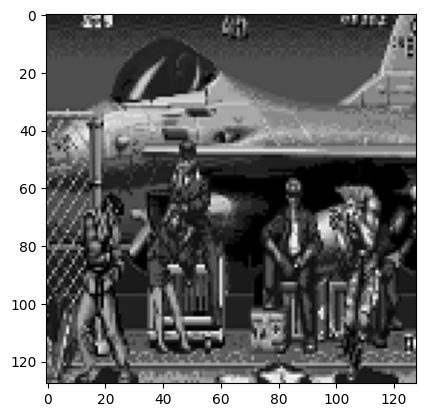

In [185]:
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))

In [4]:
LOG_DIR = './envLogs/'
OPT_DIR = './envOpt/'

In [5]:
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }

In [191]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [6]:
def optimize_agent(trial):
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = SF2(False)
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        #model.learn(total_timesteps=30000)
        model.learn(total_timesteps=100000, progress_bar=True)
        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()
        
        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

In [7]:
env.close()

NameError: name 'env' is not defined

In [193]:
# Creating the experiment 
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=25, n_jobs=1)

[I 2024-04-19 19:12:55,196] A new study created in memory with name: no-name-88dde723-2ea6-46f7-8f2b-6b24375c986c


c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  after removing the cwd from sys.path.
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  """
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  
c:\Users\TheHeatbringer\Anaconda3\envs\RLProject\lib\site-packages\ipykernel_l

RuntimeError: Cannot create multiple emulator instances per process, make sure to call env.close() on each environment before creating a new one

In [8]:
study.best_params

NameError: name 'study' is not defined

In [ ]:
study.best_trial

In [8]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_8_best_model.zip'))

In [8]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [9]:
CHECKPOINT_DIR = './envTrain/'

In [11]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [10]:
# Create environment 
env = SF2(False)
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [13]:
model_params = {'n_steps': 5661, 'gamma': 0.98110494993715, 'learning_rate': 1.6360722485511653e-05, 'clip_range': 0.3429219733482959, 'gae_lambda': 0.9819738712526442}

model_params['n_steps'] = 5696  # set n_steps to 7488 or a factor of 64
# model_params['learning_rate'] = 5e-7
model_params

{'n_steps': 5696,
 'gamma': 0.98110494993715,
 'learning_rate': 1.6360722485511653e-05,
 'clip_range': 0.3429219733482959,
 'gae_lambda': 0.9819738712526442}

In [14]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [15]:
model.load(os.path.join(OPT_DIR, 'trial_8_best_model.zip'))

In [16]:

# Kick off training 
#model.learn(total_timesteps=100000, callback=callback)
model.learn(total_timesteps=5000000, callback=callback, progress_bar=True) 

Logging to ./logs/PPO_30


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 195      |
|    ep_rew_mean     | -172     |
| time/              |          |
|    fps             | 55       |
|    iterations      | 1        |
|    time_elapsed    | 101      |
|    total_timesteps | 5696     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 207         |
|    ep_rew_mean          | -157        |
| time/                   |             |
|    fps                  | 52          |
|    iterations           | 2           |
|    time_elapsed         | 215         |
|    total_timesteps      | 11392       |
| train/                  |             |
|    approx_kl            | 0.017201787 |
|    clip_fraction        | 0.0217      |
|    clip_range           | 0.343       |
|    entropy_loss         | -4.14       |
|    explained_variance   | 0.000148    |
|    learning_rate        | 1.64e-05    |
|    loss                 | 481         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00139    |
|    value_loss           | 1.19e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 216         |
|    ep_rew_mean          | -153        |
| time/                   |             |
|    fps                  | 52          |
|    iterations           | 3           |
|    time_elapsed         | 324         |
|    total_timesteps      | 17088       |
| train/                  |             |
|    approx_kl            | 0.033712316 |
|    clip_fraction        | 0.0784      |
|    clip_range           | 0.343       |
|    entropy_loss         | -4.09       |
|    explained_variance   | -0.0148     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 732         |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0092     |
|    value_loss           | 1.01e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 216         |
|    ep_rew_mean          | -154        |
| time/                   |             |
|    fps                  | 51          |
|    iterations           | 4           |
|    time_elapsed         | 440         |
|    total_timesteps      | 22784       |
| train/                  |             |
|    approx_kl            | 0.019443067 |
|    clip_fraction        | 0.0357      |
|    clip_range           | 0.343       |
|    entropy_loss         | -4.09       |
|    explained_variance   | -0.009      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 679         |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00401    |
|    value_loss           | 1.17e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 222         |
|    ep_rew_mean          | -156        |
| time/                   |             |
|    fps                  | 51          |
|    iterations           | 5           |
|    time_elapsed         | 549         |
|    total_timesteps      | 28480       |
| train/                  |             |
|    approx_kl            | 0.012618634 |
|    clip_fraction        | 0.0336      |
|    clip_range           | 0.343       |
|    entropy_loss         | -4.05       |
|    explained_variance   | 0.0102      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 714         |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00132    |
|    value_loss           | 1.26e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 221         |
|    ep_rew_mean          | -172        |
| time/                   |             |
|    fps                  | 51          |
|    iterations           | 6           |
|    time_elapsed         | 661         |
|    total_timesteps      | 34176       |
| train/                  |             |
|    approx_kl            | 0.013692694 |
|    clip_fraction        | 0.0328      |
|    clip_range           | 0.343       |
|    entropy_loss         | -4.06       |
|    explained_variance   | 0.0149      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 493         |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00276    |
|    value_loss           | 1.03e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 223         |
|    ep_rew_mean          | -179        |
| time/                   |             |
|    fps                  | 51          |
|    iterations           | 7           |
|    time_elapsed         | 770         |
|    total_timesteps      | 39872       |
| train/                  |             |
|    approx_kl            | 0.016347773 |
|    clip_fraction        | 0.0484      |
|    clip_range           | 0.343       |
|    entropy_loss         | -4.05       |
|    explained_variance   | 0.0882      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 421         |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.00379    |
|    value_loss           | 1.02e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 227         |
|    ep_rew_mean          | -177        |
| time/                   |             |
|    fps                  | 51          |
|    iterations           | 8           |
|    time_elapsed         | 887         |
|    total_timesteps      | 45568       |
| train/                  |             |
|    approx_kl            | 0.020000622 |
|    clip_fraction        | 0.0551      |
|    clip_range           | 0.343       |
|    entropy_loss         | -4.03       |
|    explained_variance   | 0.0448      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 386         |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00275    |
|    value_loss           | 862         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 220        |
|    ep_rew_mean          | -169       |
| time/                   |            |
|    fps                  | 50         |
|    iterations           | 9          |
|    time_elapsed         | 1005       |
|    total_timesteps      | 51264      |
| train/                  |            |
|    approx_kl            | 0.01315468 |
|    clip_fraction        | 0.0276     |
|    clip_range           | 0.343      |
|    entropy_loss         | -3.98      |
|    explained_variance   | 0.0668     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 743        |
|    n_updates            | 80         |
|    policy_gradient_loss | -0.000301  |
|    value_loss           | 1.15e+03   |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 220         |
|    ep_rew_mean          | -160        |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 10          |
|    time_elapsed         | 1125        |
|    total_timesteps      | 56960       |
| train/                  |             |
|    approx_kl            | 0.017031513 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.98       |
|    explained_variance   | 0.024       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 310         |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00277    |
|    value_loss           | 1.08e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 232         |
|    ep_rew_mean          | -158        |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 11          |
|    time_elapsed         | 1242        |
|    total_timesteps      | 62656       |
| train/                  |             |
|    approx_kl            | 0.020381289 |
|    clip_fraction        | 0.0584      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.94       |
|    explained_variance   | 0.0384      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 712         |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00639    |
|    value_loss           | 1.33e+03    |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 237       |
|    ep_rew_mean          | -155      |
| time/                   |           |
|    fps                  | 50        |
|    iterations           | 12        |
|    time_elapsed         | 1360      |
|    total_timesteps      | 68352     |
| train/                  |           |
|    approx_kl            | 0.0101185 |
|    clip_fraction        | 0.0236    |
|    clip_range           | 0.343     |
|    entropy_loss         | -3.86     |
|    explained_variance   | 0.0417    |
|    learning_rate        | 1.64e-05  |
|    loss                 | 669       |
|    n_updates            | 110       |
|    policy_gradient_loss | -0.000505 |
|    value_loss           | 1.07e+03  |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 244         |
|    ep_rew_mean          | -157        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 13          |
|    time_elapsed         | 1488        |
|    total_timesteps      | 74048       |
| train/                  |             |
|    approx_kl            | 0.012608903 |
|    clip_fraction        | 0.036       |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.81       |
|    explained_variance   | 0.0602      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 628         |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00238    |
|    value_loss           | 1.21e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 256         |
|    ep_rew_mean          | -150        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 14          |
|    time_elapsed         | 1606        |
|    total_timesteps      | 79744       |
| train/                  |             |
|    approx_kl            | 0.021416333 |
|    clip_fraction        | 0.0694      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.66       |
|    explained_variance   | 0.14        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 902         |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.00702    |
|    value_loss           | 1.49e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 250         |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 15          |
|    time_elapsed         | 1726        |
|    total_timesteps      | 85440       |
| train/                  |             |
|    approx_kl            | 0.013576829 |
|    clip_fraction        | 0.0313      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.69       |
|    explained_variance   | 0.0304      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 399         |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.00174    |
|    value_loss           | 1.15e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 250         |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 16          |
|    time_elapsed         | 1845        |
|    total_timesteps      | 91136       |
| train/                  |             |
|    approx_kl            | 0.014236716 |
|    clip_fraction        | 0.041       |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.61       |
|    explained_variance   | 0.0674      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 538         |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.00383    |
|    value_loss           | 1.09e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 247         |
|    ep_rew_mean          | -133        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 17          |
|    time_elapsed         | 1962        |
|    total_timesteps      | 96832       |
| train/                  |             |
|    approx_kl            | 0.021162776 |
|    clip_fraction        | 0.0669      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.49       |
|    explained_variance   | 0.0932      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 473         |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.00715    |
|    value_loss           | 1.27e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 254         |
|    ep_rew_mean          | -138        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 18          |
|    time_elapsed         | 2075        |
|    total_timesteps      | 102528      |
| train/                  |             |
|    approx_kl            | 0.015478299 |
|    clip_fraction        | 0.036       |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.47       |
|    explained_variance   | -0.0162     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 532         |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.00207    |
|    value_loss           | 1.13e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 254         |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 19          |
|    time_elapsed         | 2191        |
|    total_timesteps      | 108224      |
| train/                  |             |
|    approx_kl            | 0.014277159 |
|    clip_fraction        | 0.0192      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.26       |
|    explained_variance   | 0.0852      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 491         |
|    n_updates            | 180         |
|    policy_gradient_loss | 0.000237    |
|    value_loss           | 960         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 262        |
|    ep_rew_mean          | -135       |
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 20         |
|    time_elapsed         | 2303       |
|    total_timesteps      | 113920     |
| train/                  |            |
|    approx_kl            | 0.01814773 |
|    clip_fraction        | 0.0429     |
|    clip_range           | 0.343      |
|    entropy_loss         | -3.22      |
|    explained_variance   | 0.0562     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 682        |
|    n_updates            | 190        |
|    policy_gradient_loss | -0.00305   |
|    value_loss           | 1.18e+03   |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 276        |
|    ep_rew_mean          | -131       |
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 21         |
|    time_elapsed         | 2418       |
|    total_timesteps      | 119616     |
| train/                  |            |
|    approx_kl            | 0.02238644 |
|    clip_fraction        | 0.0462     |
|    clip_range           | 0.343      |
|    entropy_loss         | -3.17      |
|    explained_variance   | 0.042      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 447        |
|    n_updates            | 200        |
|    policy_gradient_loss | -0.0044    |
|    value_loss           | 1.04e+03   |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 290         |
|    ep_rew_mean          | -129        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 22          |
|    time_elapsed         | 2526        |
|    total_timesteps      | 125312      |
| train/                  |             |
|    approx_kl            | 0.017614981 |
|    clip_fraction        | 0.0518      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.09       |
|    explained_variance   | 0.119       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 550         |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.00499    |
|    value_loss           | 1.08e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 306         |
|    ep_rew_mean          | -128        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 23          |
|    time_elapsed         | 2633        |
|    total_timesteps      | 131008      |
| train/                  |             |
|    approx_kl            | 0.013417082 |
|    clip_fraction        | 0.0213      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.02       |
|    explained_variance   | 0.135       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 533         |
|    n_updates            | 220         |
|    policy_gradient_loss | 0.000102    |
|    value_loss           | 1e+03       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 313         |
|    ep_rew_mean          | -117        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 24          |
|    time_elapsed         | 2741        |
|    total_timesteps      | 136704      |
| train/                  |             |
|    approx_kl            | 0.017219275 |
|    clip_fraction        | 0.0372      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3          |
|    explained_variance   | 0.115       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 534         |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.00253    |
|    value_loss           | 1.03e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 326         |
|    ep_rew_mean          | -113        |
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 25          |
|    time_elapsed         | 2849        |
|    total_timesteps      | 142400      |
| train/                  |             |
|    approx_kl            | 0.014119273 |
|    clip_fraction        | 0.0356      |
|    clip_range           | 0.343       |
|    entropy_loss         | -3.01       |
|    explained_variance   | 0.0486      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 817         |
|    n_updates            | 240         |
|    policy_gradient_loss | -5.03e-05   |
|    value_loss           | 1.24e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 329         |
|    ep_rew_mean          | -121        |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 26          |
|    time_elapsed         | 2954        |
|    total_timesteps      | 148096      |
| train/                  |             |
|    approx_kl            | 0.019284932 |
|    clip_fraction        | 0.0608      |
|    clip_range           | 0.343       |
|    entropy_loss         | -2.86       |
|    explained_variance   | 0.0885      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 405         |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.00166    |
|    value_loss           | 986         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 346         |
|    ep_rew_mean          | -118        |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 27          |
|    time_elapsed         | 3047        |
|    total_timesteps      | 153792      |
| train/                  |             |
|    approx_kl            | 0.014492778 |
|    clip_fraction        | 0.0371      |
|    clip_range           | 0.343       |
|    entropy_loss         | -2.91       |
|    explained_variance   | 0.00358     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 431         |
|    n_updates            | 260         |
|    policy_gradient_loss | 0.000401    |
|    value_loss           | 1.08e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 365         |
|    ep_rew_mean          | -120        |
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 28          |
|    time_elapsed         | 3132        |
|    total_timesteps      | 159488      |
| train/                  |             |
|    approx_kl            | 0.017081311 |
|    clip_fraction        | 0.0502      |
|    clip_range           | 0.343       |
|    entropy_loss         | -2.74       |
|    explained_variance   | 0.0935      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 358         |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.00258    |
|    value_loss           | 812         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 395        |
|    ep_rew_mean          | -125       |
| time/                   |            |
|    fps                  | 51         |
|    iterations           | 29         |
|    time_elapsed         | 3210       |
|    total_timesteps      | 165184     |
| train/                  |            |
|    approx_kl            | 0.01524582 |
|    clip_fraction        | 0.0337     |
|    clip_range           | 0.343      |
|    entropy_loss         | -2.51      |
|    explained_variance   | 0.136      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 373        |
|    n_updates            | 280        |
|    policy_gradient_loss | -0.00207   |
|    value_loss           | 689        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 416         |
|    ep_rew_mean          | -121        |
| time/                   |             |
|    fps                  | 52          |
|    iterations           | 30          |
|    time_elapsed         | 3284        |
|    total_timesteps      | 170880      |
| train/                  |             |
|    approx_kl            | 0.017107489 |
|    clip_fraction        | 0.0504      |
|    clip_range           | 0.343       |
|    entropy_loss         | -2.18       |
|    explained_variance   | 0.112       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 273         |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.00267    |
|    value_loss           | 552         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 456         |
|    ep_rew_mean          | -119        |
| time/                   |             |
|    fps                  | 52          |
|    iterations           | 31          |
|    time_elapsed         | 3356        |
|    total_timesteps      | 176576      |
| train/                  |             |
|    approx_kl            | 0.017377742 |
|    clip_fraction        | 0.0503      |
|    clip_range           | 0.343       |
|    entropy_loss         | -2.1        |
|    explained_variance   | 0.139       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 221         |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0029     |
|    value_loss           | 496         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489         |
|    ep_rew_mean          | -124        |
| time/                   |             |
|    fps                  | 53          |
|    iterations           | 32          |
|    time_elapsed         | 3421        |
|    total_timesteps      | 182272      |
| train/                  |             |
|    approx_kl            | 0.011704928 |
|    clip_fraction        | 0.0349      |
|    clip_range           | 0.343       |
|    entropy_loss         | -2.11       |
|    explained_variance   | 0.124       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 156         |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.00219    |
|    value_loss           | 485         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 528          |
|    ep_rew_mean          | -128         |
| time/                   |              |
|    fps                  | 53           |
|    iterations           | 33           |
|    time_elapsed         | 3483         |
|    total_timesteps      | 187968       |
| train/                  |              |
|    approx_kl            | 0.0128198275 |
|    clip_fraction        | 0.0471       |
|    clip_range           | 0.343        |
|    entropy_loss         | -1.78        |
|    explained_variance   | 0.198        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 96.9         |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 343          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 561         |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 34          |
|    time_elapsed         | 3543        |
|    total_timesteps      | 193664      |
| train/                  |             |
|    approx_kl            | 0.023038952 |
|    clip_fraction        | 0.0889      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.7        |
|    explained_variance   | -0.0294     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 196         |
|    n_updates            | 330         |
|    policy_gradient_loss | 0.00472     |
|    value_loss           | 363         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 603         |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 35          |
|    time_elapsed         | 3599        |
|    total_timesteps      | 199360      |
| train/                  |             |
|    approx_kl            | 0.012124168 |
|    clip_fraction        | 0.0447      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.68       |
|    explained_variance   | 0.0624      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 83.3        |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.00242    |
|    value_loss           | 290         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 629         |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 36          |
|    time_elapsed         | 3654        |
|    total_timesteps      | 205056      |
| train/                  |             |
|    approx_kl            | 0.021680502 |
|    clip_fraction        | 0.057       |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.51       |
|    explained_variance   | 0.022       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 197         |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.00343    |
|    value_loss           | 324         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 672         |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 37          |
|    time_elapsed         | 3709        |
|    total_timesteps      | 210752      |
| train/                  |             |
|    approx_kl            | 0.009904674 |
|    clip_fraction        | 0.0573      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.54       |
|    explained_variance   | 0.0808      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 126         |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.00358    |
|    value_loss           | 291         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 724         |
|    ep_rew_mean          | -136        |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 38          |
|    time_elapsed         | 3758        |
|    total_timesteps      | 216448      |
| train/                  |             |
|    approx_kl            | 0.010572575 |
|    clip_fraction        | 0.0357      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.39       |
|    explained_variance   | 0.15        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 126         |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.00476    |
|    value_loss           | 246         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 772         |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 39          |
|    time_elapsed         | 3801        |
|    total_timesteps      | 222144      |
| train/                  |             |
|    approx_kl            | 0.013484572 |
|    clip_fraction        | 0.0534      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.116       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 193         |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.00523    |
|    value_loss           | 159         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 812         |
|    ep_rew_mean          | -136        |
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 40          |
|    time_elapsed         | 3850        |
|    total_timesteps      | 227840      |
| train/                  |             |
|    approx_kl            | 0.006358654 |
|    clip_fraction        | 0.0304      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.294       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 83.6        |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.00342    |
|    value_loss           | 127         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 866         |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 41          |
|    time_elapsed         | 3905        |
|    total_timesteps      | 233536      |
| train/                  |             |
|    approx_kl            | 0.009069839 |
|    clip_fraction        | 0.0313      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.1        |
|    explained_variance   | 0.172       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 37.2        |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.00404    |
|    value_loss           | 172         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 906         |
|    ep_rew_mean          | -136        |
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 42          |
|    time_elapsed         | 3949        |
|    total_timesteps      | 239232      |
| train/                  |             |
|    approx_kl            | 0.020064808 |
|    clip_fraction        | 0.0759      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.33       |
|    explained_variance   | -0.000393   |
|    learning_rate        | 1.64e-05    |
|    loss                 | 154         |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.00453    |
|    value_loss           | 337         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 943         |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 61          |
|    iterations           | 43          |
|    time_elapsed         | 4006        |
|    total_timesteps      | 244928      |
| train/                  |             |
|    approx_kl            | 0.074824564 |
|    clip_fraction        | 0.0845      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.2        |
|    explained_variance   | -0.169      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 59          |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.000343   |
|    value_loss           | 134         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 979         |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 61          |
|    iterations           | 44          |
|    time_elapsed         | 4051        |
|    total_timesteps      | 250624      |
| train/                  |             |
|    approx_kl            | 0.030450465 |
|    clip_fraction        | 0.0844      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.182       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 124         |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.00841    |
|    value_loss           | 317         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.02e+03    |
|    ep_rew_mean          | -136        |
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 45          |
|    time_elapsed         | 4092        |
|    total_timesteps      | 256320      |
| train/                  |             |
|    approx_kl            | 0.009569853 |
|    clip_fraction        | 0.0409      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.101       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 68.7        |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.00434    |
|    value_loss           | 183         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.08e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 46          |
|    time_elapsed         | 4142        |
|    total_timesteps      | 262016      |
| train/                  |             |
|    approx_kl            | 0.013532742 |
|    clip_fraction        | 0.0407      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.323       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 58.6        |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.00117    |
|    value_loss           | 105         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.12e+03    |
|    ep_rew_mean          | -137        |
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 47          |
|    time_elapsed         | 4189        |
|    total_timesteps      | 267712      |
| train/                  |             |
|    approx_kl            | 0.008543707 |
|    clip_fraction        | 0.0447      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.00621     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 68.1        |
|    n_updates            | 460         |
|    policy_gradient_loss | 0.00166     |
|    value_loss           | 153         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.17e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 64          |
|    iterations           | 48          |
|    time_elapsed         | 4231        |
|    total_timesteps      | 273408      |
| train/                  |             |
|    approx_kl            | 0.009831598 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.131       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 117         |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.00839    |
|    value_loss           | 197         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.2e+03    |
|    ep_rew_mean          | -140       |
| time/                   |            |
|    fps                  | 65         |
|    iterations           | 49         |
|    time_elapsed         | 4275       |
|    total_timesteps      | 279104     |
| train/                  |            |
|    approx_kl            | 0.01961933 |
|    clip_fraction        | 0.0569     |
|    clip_range           | 0.343      |
|    entropy_loss         | -1.16      |
|    explained_variance   | 0.407      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 12.9       |
|    n_updates            | 480        |
|    policy_gradient_loss | -0.0054    |
|    value_loss           | 60.7       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.23e+03   |
|    ep_rew_mean          | -140       |
| time/                   |            |
|    fps                  | 66         |
|    iterations           | 50         |
|    time_elapsed         | 4314       |
|    total_timesteps      | 284800     |
| train/                  |            |
|    approx_kl            | 0.02253256 |
|    clip_fraction        | 0.0851     |
|    clip_range           | 0.343      |
|    entropy_loss         | -1.2       |
|    explained_variance   | 0.0996     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 25.6       |
|    n_updates            | 490        |
|    policy_gradient_loss | -0.00429   |
|    value_loss           | 124        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 51          |
|    time_elapsed         | 4360        |
|    total_timesteps      | 290496      |
| train/                  |             |
|    approx_kl            | 0.011342816 |
|    clip_fraction        | 0.0341      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.428       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 18.7        |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00349    |
|    value_loss           | 40.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 52          |
|    time_elapsed         | 4401        |
|    total_timesteps      | 296192      |
| train/                  |             |
|    approx_kl            | 0.020465724 |
|    clip_fraction        | 0.0624      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.556       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 109         |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.00157    |
|    value_loss           | 153         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.38e+03   |
|    ep_rew_mean          | -138       |
| time/                   |            |
|    fps                  | 67         |
|    iterations           | 53         |
|    time_elapsed         | 4448       |
|    total_timesteps      | 301888     |
| train/                  |            |
|    approx_kl            | 0.01068838 |
|    clip_fraction        | 0.032      |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.862     |
|    explained_variance   | 0.385      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 19.7       |
|    n_updates            | 520        |
|    policy_gradient_loss | -0.00321   |
|    value_loss           | 83.5       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.41e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 54          |
|    time_elapsed         | 4498        |
|    total_timesteps      | 307584      |
| train/                  |             |
|    approx_kl            | 0.005116535 |
|    clip_fraction        | 0.0286      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.923      |
|    explained_variance   | 0.545       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 111         |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.00416    |
|    value_loss           | 161         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.46e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 55          |
|    time_elapsed         | 4545        |
|    total_timesteps      | 313280      |
| train/                  |             |
|    approx_kl            | 0.010984276 |
|    clip_fraction        | 0.0347      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.941      |
|    explained_variance   | 0.559       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 119         |
|    n_updates            | 540         |
|    policy_gradient_loss | 0.000262    |
|    value_loss           | 115         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.5e+03     |
|    ep_rew_mean          | -138        |
| time/                   |             |
|    fps                  | 69          |
|    iterations           | 56          |
|    time_elapsed         | 4593        |
|    total_timesteps      | 318976      |
| train/                  |             |
|    approx_kl            | 0.011164545 |
|    clip_fraction        | 0.0379      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.793      |
|    explained_variance   | 0.552       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 8.51        |
|    n_updates            | 550         |
|    policy_gradient_loss | -0.00757    |
|    value_loss           | 110         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.55e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 70          |
|    iterations           | 57          |
|    time_elapsed         | 4629        |
|    total_timesteps      | 324672      |
| train/                  |             |
|    approx_kl            | 0.010848804 |
|    clip_fraction        | 0.0456      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.814      |
|    explained_variance   | 0.389       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 54.4        |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.00168    |
|    value_loss           | 89.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.58e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 70          |
|    iterations           | 58          |
|    time_elapsed         | 4672        |
|    total_timesteps      | 330368      |
| train/                  |             |
|    approx_kl            | 0.009082364 |
|    clip_fraction        | 0.0337      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.797      |
|    explained_variance   | 0.37        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.9        |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.00165    |
|    value_loss           | 36.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.62e+03    |
|    ep_rew_mean          | -138        |
| time/                   |             |
|    fps                  | 71          |
|    iterations           | 59          |
|    time_elapsed         | 4716        |
|    total_timesteps      | 336064      |
| train/                  |             |
|    approx_kl            | 0.017509496 |
|    clip_fraction        | 0.055       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.951      |
|    explained_variance   | 0.348       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 90.4        |
|    n_updates            | 580         |
|    policy_gradient_loss | 0.00217     |
|    value_loss           | 115         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.65e+03    |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 71          |
|    iterations           | 60          |
|    time_elapsed         | 4770        |
|    total_timesteps      | 341760      |
| train/                  |             |
|    approx_kl            | 0.029805876 |
|    clip_fraction        | 0.0711      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.978      |
|    explained_variance   | 0.607       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 33.6        |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.00425    |
|    value_loss           | 68          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.67e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 61          |
|    time_elapsed         | 4820        |
|    total_timesteps      | 347456      |
| train/                  |             |
|    approx_kl            | 0.029979413 |
|    clip_fraction        | 0.0649      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.492       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 140         |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.00825    |
|    value_loss           | 301         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.68e+03    |
|    ep_rew_mean          | -122        |
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 62          |
|    time_elapsed         | 4873        |
|    total_timesteps      | 353152      |
| train/                  |             |
|    approx_kl            | 0.021260345 |
|    clip_fraction        | 0.0852      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.176       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 81.2        |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.00166    |
|    value_loss           | 296         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.7e+03     |
|    ep_rew_mean          | -118        |
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 63          |
|    time_elapsed         | 4930        |
|    total_timesteps      | 358848      |
| train/                  |             |
|    approx_kl            | 0.012393481 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.209       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 43.4        |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.00209    |
|    value_loss           | 178         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.74e+03    |
|    ep_rew_mean          | -116        |
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 64          |
|    time_elapsed         | 4972        |
|    total_timesteps      | 364544      |
| train/                  |             |
|    approx_kl            | 0.010897132 |
|    clip_fraction        | 0.0555      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.23       |
|    explained_variance   | -0.073      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 154         |
|    n_updates            | 630         |
|    policy_gradient_loss | 0.00064     |
|    value_loss           | 390         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.78e+03     |
|    ep_rew_mean          | -117         |
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 65           |
|    time_elapsed         | 5015         |
|    total_timesteps      | 370240       |
| train/                  |              |
|    approx_kl            | 0.0067113237 |
|    clip_fraction        | 0.0423       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.894       |
|    explained_variance   | 0.224        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 47.5         |
|    n_updates            | 640          |
|    policy_gradient_loss | 0.00151      |
|    value_loss           | 104          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.81e+03    |
|    ep_rew_mean          | -114        |
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 66          |
|    time_elapsed         | 5057        |
|    total_timesteps      | 375936      |
| train/                  |             |
|    approx_kl            | 0.015235745 |
|    clip_fraction        | 0.0427      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.862      |
|    explained_variance   | 0.357       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.2        |
|    n_updates            | 650         |
|    policy_gradient_loss | -0.00542    |
|    value_loss           | 70.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.85e+03    |
|    ep_rew_mean          | -113        |
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 67          |
|    time_elapsed         | 5100        |
|    total_timesteps      | 381632      |
| train/                  |             |
|    approx_kl            | 0.009891733 |
|    clip_fraction        | 0.0372      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.75       |
|    explained_variance   | 0.165       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 37          |
|    n_updates            | 660         |
|    policy_gradient_loss | 0.00185     |
|    value_loss           | 99.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.88e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 75          |
|    iterations           | 68          |
|    time_elapsed         | 5145        |
|    total_timesteps      | 387328      |
| train/                  |             |
|    approx_kl            | 0.010944078 |
|    clip_fraction        | 0.0417      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.626      |
|    explained_variance   | 0.436       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.4        |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.00363    |
|    value_loss           | 70.1        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.89e+03   |
|    ep_rew_mean          | -110       |
| time/                   |            |
|    fps                  | 75         |
|    iterations           | 69         |
|    time_elapsed         | 5190       |
|    total_timesteps      | 393024     |
| train/                  |            |
|    approx_kl            | 0.00517459 |
|    clip_fraction        | 0.0291     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.729     |
|    explained_variance   | 0.325      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 57.1       |
|    n_updates            | 680        |
|    policy_gradient_loss | 0.000967   |
|    value_loss           | 109        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.95e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 76          |
|    iterations           | 70          |
|    time_elapsed         | 5235        |
|    total_timesteps      | 398720      |
| train/                  |             |
|    approx_kl            | 0.011994264 |
|    clip_fraction        | 0.0453      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.673      |
|    explained_variance   | 0.011       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 36.7        |
|    n_updates            | 690         |
|    policy_gradient_loss | -0.00697    |
|    value_loss           | 172         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.98e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 76          |
|    iterations           | 71          |
|    time_elapsed         | 5276        |
|    total_timesteps      | 404416      |
| train/                  |             |
|    approx_kl            | 0.008183741 |
|    clip_fraction        | 0.0318      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.689      |
|    explained_variance   | 0.34        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 74.6        |
|    n_updates            | 700         |
|    policy_gradient_loss | 0.00238     |
|    value_loss           | 151         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.02e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 77          |
|    iterations           | 72          |
|    time_elapsed         | 5319        |
|    total_timesteps      | 410112      |
| train/                  |             |
|    approx_kl            | 0.007262928 |
|    clip_fraction        | 0.0231      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.556      |
|    explained_variance   | 0.671       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 10.8        |
|    n_updates            | 710         |
|    policy_gradient_loss | -0.000298   |
|    value_loss           | 41.4        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.02e+03     |
|    ep_rew_mean          | -104         |
| time/                   |              |
|    fps                  | 77           |
|    iterations           | 73           |
|    time_elapsed         | 5365         |
|    total_timesteps      | 415808       |
| train/                  |              |
|    approx_kl            | 0.0053709513 |
|    clip_fraction        | 0.0336       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.661       |
|    explained_variance   | 0.447        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 66.7         |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.00058     |
|    value_loss           | 119          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.02e+03     |
|    ep_rew_mean          | -105         |
| time/                   |              |
|    fps                  | 77           |
|    iterations           | 74           |
|    time_elapsed         | 5405         |
|    total_timesteps      | 421504       |
| train/                  |              |
|    approx_kl            | 0.0049604117 |
|    clip_fraction        | 0.0205       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.724       |
|    explained_variance   | 0.466        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 49.9         |
|    n_updates            | 730          |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 151          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.05e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 78          |
|    iterations           | 75          |
|    time_elapsed         | 5453        |
|    total_timesteps      | 427200      |
| train/                  |             |
|    approx_kl            | 0.008501332 |
|    clip_fraction        | 0.039       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.57       |
|    explained_variance   | 0.578       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 8.45        |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.00331    |
|    value_loss           | 29          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.09e+03     |
|    ep_rew_mean          | -106         |
| time/                   |              |
|    fps                  | 78           |
|    iterations           | 76           |
|    time_elapsed         | 5496         |
|    total_timesteps      | 432896       |
| train/                  |              |
|    approx_kl            | 0.0072349994 |
|    clip_fraction        | 0.0413       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.737       |
|    explained_variance   | 0.427        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 119          |
|    n_updates            | 750          |
|    policy_gradient_loss | -0.00315     |
|    value_loss           | 174          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.09e+03     |
|    ep_rew_mean          | -105         |
| time/                   |              |
|    fps                  | 79           |
|    iterations           | 77           |
|    time_elapsed         | 5535         |
|    total_timesteps      | 438592       |
| train/                  |              |
|    approx_kl            | 0.0072278567 |
|    clip_fraction        | 0.0294       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.624       |
|    explained_variance   | 0.496        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 45.2         |
|    n_updates            | 760          |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 78.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.13e+03     |
|    ep_rew_mean          | -102         |
| time/                   |              |
|    fps                  | 79           |
|    iterations           | 78           |
|    time_elapsed         | 5579         |
|    total_timesteps      | 444288       |
| train/                  |              |
|    approx_kl            | 0.0052478854 |
|    clip_fraction        | 0.0228       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.549       |
|    explained_variance   | 0.633        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 9.53         |
|    n_updates            | 770          |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 34.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.16e+03    |
|    ep_rew_mean          | -101        |
| time/                   |             |
|    fps                  | 80          |
|    iterations           | 79          |
|    time_elapsed         | 5624        |
|    total_timesteps      | 449984      |
| train/                  |             |
|    approx_kl            | 0.011051297 |
|    clip_fraction        | 0.0241      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.604      |
|    explained_variance   | 0.613       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 68.4        |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.00877    |
|    value_loss           | 101         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -103        |
| time/                   |             |
|    fps                  | 80          |
|    iterations           | 80          |
|    time_elapsed         | 5667        |
|    total_timesteps      | 455680      |
| train/                  |             |
|    approx_kl            | 0.010754163 |
|    clip_fraction        | 0.0353      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.541      |
|    explained_variance   | 0.112       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 23.7        |
|    n_updates            | 790         |
|    policy_gradient_loss | -0.00425    |
|    value_loss           | 142         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -106        |
| time/                   |             |
|    fps                  | 80          |
|    iterations           | 81          |
|    time_elapsed         | 5713        |
|    total_timesteps      | 461376      |
| train/                  |             |
|    approx_kl            | 0.011592973 |
|    clip_fraction        | 0.0542      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.559      |
|    explained_variance   | 0.0851      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 24          |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.000808   |
|    value_loss           | 93.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.16e+03   |
|    ep_rew_mean          | -102       |
| time/                   |            |
|    fps                  | 80         |
|    iterations           | 82         |
|    time_elapsed         | 5767       |
|    total_timesteps      | 467072     |
| train/                  |            |
|    approx_kl            | 0.01509543 |
|    clip_fraction        | 0.0532     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.696     |
|    explained_variance   | -0.0556    |
|    learning_rate        | 1.64e-05   |
|    loss                 | 43.7       |
|    n_updates            | 810        |
|    policy_gradient_loss | -0.00727   |
|    value_loss           | 116        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.17e+03    |
|    ep_rew_mean          | -104        |
| time/                   |             |
|    fps                  | 81          |
|    iterations           | 83          |
|    time_elapsed         | 5815        |
|    total_timesteps      | 472768      |
| train/                  |             |
|    approx_kl            | 0.010818509 |
|    clip_fraction        | 0.0423      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.805      |
|    explained_variance   | -0.00487    |
|    learning_rate        | 1.64e-05    |
|    loss                 | 144         |
|    n_updates            | 820         |
|    policy_gradient_loss | 0.00444     |
|    value_loss           | 268         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.17e+03    |
|    ep_rew_mean          | -103        |
| time/                   |             |
|    fps                  | 81          |
|    iterations           | 84          |
|    time_elapsed         | 5862        |
|    total_timesteps      | 478464      |
| train/                  |             |
|    approx_kl            | 0.010284341 |
|    clip_fraction        | 0.0424      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.662      |
|    explained_variance   | 0.184       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 50.4        |
|    n_updates            | 830         |
|    policy_gradient_loss | -0.0053     |
|    value_loss           | 126         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.18e+03    |
|    ep_rew_mean          | -100        |
| time/                   |             |
|    fps                  | 81          |
|    iterations           | 85          |
|    time_elapsed         | 5909        |
|    total_timesteps      | 484160      |
| train/                  |             |
|    approx_kl            | 0.008850468 |
|    clip_fraction        | 0.0306      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.514      |
|    explained_variance   | 0.328       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 43.4        |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.00652    |
|    value_loss           | 93.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.18e+03    |
|    ep_rew_mean          | -101        |
| time/                   |             |
|    fps                  | 82          |
|    iterations           | 86          |
|    time_elapsed         | 5957        |
|    total_timesteps      | 489856      |
| train/                  |             |
|    approx_kl            | 0.006423764 |
|    clip_fraction        | 0.0274      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.598      |
|    explained_variance   | 0.334       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 66.9        |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.00357    |
|    value_loss           | 124         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.17e+03    |
|    ep_rew_mean          | -101        |
| time/                   |             |
|    fps                  | 82          |
|    iterations           | 87          |
|    time_elapsed         | 6001        |
|    total_timesteps      | 495552      |
| train/                  |             |
|    approx_kl            | 0.011146333 |
|    clip_fraction        | 0.0531      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.514      |
|    explained_variance   | 0.171       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 66.4        |
|    n_updates            | 860         |
|    policy_gradient_loss | -0.00607    |
|    value_loss           | 131         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.16e+03    |
|    ep_rew_mean          | -100        |
| time/                   |             |
|    fps                  | 82          |
|    iterations           | 88          |
|    time_elapsed         | 6047        |
|    total_timesteps      | 501248      |
| train/                  |             |
|    approx_kl            | 0.006625082 |
|    clip_fraction        | 0.0247      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.375      |
|    explained_variance   | 0.242       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 13.7        |
|    n_updates            | 870         |
|    policy_gradient_loss | -0.00607    |
|    value_loss           | 85.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.16e+03   |
|    ep_rew_mean          | -100       |
| time/                   |            |
|    fps                  | 83         |
|    iterations           | 89         |
|    time_elapsed         | 6089       |
|    total_timesteps      | 506944     |
| train/                  |            |
|    approx_kl            | 0.00840629 |
|    clip_fraction        | 0.0334     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.44      |
|    explained_variance   | 0.104      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 30.3       |
|    n_updates            | 880        |
|    policy_gradient_loss | -0.00179   |
|    value_loss           | 157        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.15e+03    |
|    ep_rew_mean          | -99.4       |
| time/                   |             |
|    fps                  | 83          |
|    iterations           | 90          |
|    time_elapsed         | 6136        |
|    total_timesteps      | 512640      |
| train/                  |             |
|    approx_kl            | 0.010463962 |
|    clip_fraction        | 0.0205      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.357      |
|    explained_variance   | 0.246       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.7        |
|    n_updates            | 890         |
|    policy_gradient_loss | 0.000572    |
|    value_loss           | 56.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.14e+03    |
|    ep_rew_mean          | -97.2       |
| time/                   |             |
|    fps                  | 83          |
|    iterations           | 91          |
|    time_elapsed         | 6180        |
|    total_timesteps      | 518336      |
| train/                  |             |
|    approx_kl            | 0.009515914 |
|    clip_fraction        | 0.0497      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.608      |
|    explained_variance   | -0.0629     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 49.2        |
|    n_updates            | 900         |
|    policy_gradient_loss | 0.00376     |
|    value_loss           | 135         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.13e+03    |
|    ep_rew_mean          | -97.8       |
| time/                   |             |
|    fps                  | 84          |
|    iterations           | 92          |
|    time_elapsed         | 6229        |
|    total_timesteps      | 524032      |
| train/                  |             |
|    approx_kl            | 0.008847927 |
|    clip_fraction        | 0.036       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.275      |
|    explained_variance   | 0.261       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.4        |
|    n_updates            | 910         |
|    policy_gradient_loss | -0.00782    |
|    value_loss           | 96.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.11e+03    |
|    ep_rew_mean          | -99.6       |
| time/                   |             |
|    fps                  | 84          |
|    iterations           | 93          |
|    time_elapsed         | 6275        |
|    total_timesteps      | 529728      |
| train/                  |             |
|    approx_kl            | 0.008109793 |
|    clip_fraction        | 0.0408      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.508      |
|    explained_variance   | 0.229       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 178         |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.000264   |
|    value_loss           | 190         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.09e+03    |
|    ep_rew_mean          | -99.8       |
| time/                   |             |
|    fps                  | 84          |
|    iterations           | 94          |
|    time_elapsed         | 6319        |
|    total_timesteps      | 535424      |
| train/                  |             |
|    approx_kl            | 0.011004668 |
|    clip_fraction        | 0.0321      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.383      |
|    explained_variance   | 0.0662      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 83          |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.0084     |
|    value_loss           | 152         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.02e+03    |
|    ep_rew_mean          | -102        |
| time/                   |             |
|    fps                  | 84          |
|    iterations           | 95          |
|    time_elapsed         | 6370        |
|    total_timesteps      | 541120      |
| train/                  |             |
|    approx_kl            | 0.016216585 |
|    clip_fraction        | 0.0457      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.466      |
|    explained_variance   | -0.121      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 43          |
|    n_updates            | 940         |
|    policy_gradient_loss | 0.00974     |
|    value_loss           | 91.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.05e+03     |
|    ep_rew_mean          | -102         |
| time/                   |              |
|    fps                  | 85           |
|    iterations           | 96           |
|    time_elapsed         | 6416         |
|    total_timesteps      | 546816       |
| train/                  |              |
|    approx_kl            | 0.0105713615 |
|    clip_fraction        | 0.0337       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.542       |
|    explained_variance   | 0.186        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 73.1         |
|    n_updates            | 950          |
|    policy_gradient_loss | -0.00375     |
|    value_loss           | 224          |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.09e+03   |
|    ep_rew_mean          | -106       |
| time/                   |            |
|    fps                  | 85         |
|    iterations           | 97         |
|    time_elapsed         | 6460       |
|    total_timesteps      | 552512     |
| train/                  |            |
|    approx_kl            | 0.00519981 |
|    clip_fraction        | 0.0249     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.378     |
|    explained_variance   | 0.0865     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 70.3       |
|    n_updates            | 960        |
|    policy_gradient_loss | 0.00208    |
|    value_loss           | 106        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.13e+03     |
|    ep_rew_mean          | -112         |
| time/                   |              |
|    fps                  | 85           |
|    iterations           | 98           |
|    time_elapsed         | 6508         |
|    total_timesteps      | 558208       |
| train/                  |              |
|    approx_kl            | 0.0036824232 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.4         |
|    explained_variance   | 0.262        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 39           |
|    n_updates            | 970          |
|    policy_gradient_loss | -0.00399     |
|    value_loss           | 118          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.15e+03    |
|    ep_rew_mean          | -116        |
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 99          |
|    time_elapsed         | 6552        |
|    total_timesteps      | 563904      |
| train/                  |             |
|    approx_kl            | 0.007963258 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.529      |
|    explained_variance   | -0.195      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 67.1        |
|    n_updates            | 980         |
|    policy_gradient_loss | 0.0026      |
|    value_loss           | 223         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.17e+03    |
|    ep_rew_mean          | -120        |
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 100         |
|    time_elapsed         | 6601        |
|    total_timesteps      | 569600      |
| train/                  |             |
|    approx_kl            | 0.004433881 |
|    clip_fraction        | 0.0187      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.369      |
|    explained_variance   | 0.147       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 16.3        |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.00358    |
|    value_loss           | 86.4        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 2.17e+03  |
|    ep_rew_mean          | -124      |
| time/                   |           |
|    fps                  | 86        |
|    iterations           | 101       |
|    time_elapsed         | 6654      |
|    total_timesteps      | 575296    |
| train/                  |           |
|    approx_kl            | 0.0091816 |
|    clip_fraction        | 0.0379    |
|    clip_range           | 0.343     |
|    entropy_loss         | -0.532    |
|    explained_variance   | 0.0441    |
|    learning_rate        | 1.64e-05  |
|    loss                 | 26.9      |
|    n_updates            | 1000      |
|    policy_gradient_loss | -0.00839  |
|    value_loss           | 139       |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.18e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 102         |
|    time_elapsed         | 6701        |
|    total_timesteps      | 580992      |
| train/                  |             |
|    approx_kl            | 0.012434551 |
|    clip_fraction        | 0.0523      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.647      |
|    explained_variance   | -0.219      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 48.3        |
|    n_updates            | 1010        |
|    policy_gradient_loss | 0.00132     |
|    value_loss           | 339         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 87          |
|    iterations           | 103         |
|    time_elapsed         | 6739        |
|    total_timesteps      | 586688      |
| train/                  |             |
|    approx_kl            | 0.009217146 |
|    clip_fraction        | 0.0333      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.459      |
|    explained_variance   | 0.0465      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 63.6        |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.00205    |
|    value_loss           | 127         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.12e+03     |
|    ep_rew_mean          | -126         |
| time/                   |              |
|    fps                  | 87           |
|    iterations           | 104          |
|    time_elapsed         | 6793         |
|    total_timesteps      | 592384       |
| train/                  |              |
|    approx_kl            | 0.0027462593 |
|    clip_fraction        | 0.00901      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.188       |
|    explained_variance   | 0.349        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 13.4         |
|    n_updates            | 1030         |
|    policy_gradient_loss | -0.00299     |
|    value_loss           | 28.8         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.04e+03    |
|    ep_rew_mean          | -125        |
| time/                   |             |
|    fps                  | 87          |
|    iterations           | 105         |
|    time_elapsed         | 6853        |
|    total_timesteps      | 598080      |
| train/                  |             |
|    approx_kl            | 0.013014748 |
|    clip_fraction        | 0.0441      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.533      |
|    explained_variance   | 0.134       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 36.9        |
|    n_updates            | 1040        |
|    policy_gradient_loss | -0.00426    |
|    value_loss           | 258         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.03e+03    |
|    ep_rew_mean          | -124        |
| time/                   |             |
|    fps                  | 87          |
|    iterations           | 106         |
|    time_elapsed         | 6901        |
|    total_timesteps      | 603776      |
| train/                  |             |
|    approx_kl            | 0.008997048 |
|    clip_fraction        | 0.0394      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.729      |
|    explained_variance   | 0.219       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 151         |
|    n_updates            | 1050        |
|    policy_gradient_loss | -0.00346    |
|    value_loss           | 347         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.03e+03    |
|    ep_rew_mean          | -125        |
| time/                   |             |
|    fps                  | 87          |
|    iterations           | 107         |
|    time_elapsed         | 6939        |
|    total_timesteps      | 609472      |
| train/                  |             |
|    approx_kl            | 0.008169155 |
|    clip_fraction        | 0.0305      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.376      |
|    explained_variance   | 0.265       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 127         |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.00393    |
|    value_loss           | 160         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2e+03        |
|    ep_rew_mean          | -125         |
| time/                   |              |
|    fps                  | 88           |
|    iterations           | 108          |
|    time_elapsed         | 6986         |
|    total_timesteps      | 615168       |
| train/                  |              |
|    approx_kl            | 0.0020400444 |
|    clip_fraction        | 0.00492      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.087       |
|    explained_variance   | 0.336        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 4.15         |
|    n_updates            | 1070         |
|    policy_gradient_loss | -0.00242     |
|    value_loss           | 39.3         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.01e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 88          |
|    iterations           | 109         |
|    time_elapsed         | 7027        |
|    total_timesteps      | 620864      |
| train/                  |             |
|    approx_kl            | 0.008448688 |
|    clip_fraction        | 0.0577      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.509      |
|    explained_variance   | -0.00179    |
|    learning_rate        | 1.64e-05    |
|    loss                 | 128         |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.000285   |
|    value_loss           | 213         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.02e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 88          |
|    iterations           | 110         |
|    time_elapsed         | 7069        |
|    total_timesteps      | 626560      |
| train/                  |             |
|    approx_kl            | 0.006463392 |
|    clip_fraction        | 0.0231      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.286      |
|    explained_variance   | 0.206       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 10.2        |
|    n_updates            | 1090        |
|    policy_gradient_loss | -0.00158    |
|    value_loss           | 60.9        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2e+03        |
|    ep_rew_mean          | -126         |
| time/                   |              |
|    fps                  | 88           |
|    iterations           | 111          |
|    time_elapsed         | 7116         |
|    total_timesteps      | 632256       |
| train/                  |              |
|    approx_kl            | 0.0024079666 |
|    clip_fraction        | 0.00969      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.144       |
|    explained_variance   | 0.472        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 18.6         |
|    n_updates            | 1100         |
|    policy_gradient_loss | -0.000516    |
|    value_loss           | 51.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2e+03       |
|    ep_rew_mean          | -127        |
| time/                   |             |
|    fps                  | 89          |
|    iterations           | 112         |
|    time_elapsed         | 7161        |
|    total_timesteps      | 637952      |
| train/                  |             |
|    approx_kl            | 0.007078713 |
|    clip_fraction        | 0.0377      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.35       |
|    explained_variance   | -0.0469     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 69          |
|    n_updates            | 1110        |
|    policy_gradient_loss | 0.000586    |
|    value_loss           | 178         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.97e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 89          |
|    iterations           | 113         |
|    time_elapsed         | 7211        |
|    total_timesteps      | 643648      |
| train/                  |             |
|    approx_kl            | 0.004824943 |
|    clip_fraction        | 0.0141      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.122      |
|    explained_variance   | 0.454       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 32          |
|    n_updates            | 1120        |
|    policy_gradient_loss | -0.00682    |
|    value_loss           | 66.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.99e+03   |
|    ep_rew_mean          | -126       |
| time/                   |            |
|    fps                  | 89         |
|    iterations           | 114        |
|    time_elapsed         | 7251       |
|    total_timesteps      | 649344     |
| train/                  |            |
|    approx_kl            | 0.00500282 |
|    clip_fraction        | 0.0146     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.146     |
|    explained_variance   | 0.52       |
|    learning_rate        | 1.64e-05   |
|    loss                 | 90.8       |
|    n_updates            | 1130       |
|    policy_gradient_loss | -0.00371   |
|    value_loss           | 226        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.01e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 89          |
|    iterations           | 115         |
|    time_elapsed         | 7290        |
|    total_timesteps      | 655040      |
| train/                  |             |
|    approx_kl            | 0.011073874 |
|    clip_fraction        | 0.0183      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.119      |
|    explained_variance   | 0.126       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 89          |
|    n_updates            | 1140        |
|    policy_gradient_loss | -0.00629    |
|    value_loss           | 63          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2e+03        |
|    ep_rew_mean          | -123         |
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 116          |
|    time_elapsed         | 7332         |
|    total_timesteps      | 660736       |
| train/                  |              |
|    approx_kl            | 0.0038696053 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0907      |
|    explained_variance   | 0.426        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 8.41         |
|    n_updates            | 1150         |
|    policy_gradient_loss | -0.00437     |
|    value_loss           | 50.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.04e+03     |
|    ep_rew_mean          | -123         |
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 117          |
|    time_elapsed         | 7376         |
|    total_timesteps      | 666432       |
| train/                  |              |
|    approx_kl            | 0.0041031726 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.141       |
|    explained_variance   | 0.323        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 12.9         |
|    n_updates            | 1160         |
|    policy_gradient_loss | -0.00162     |
|    value_loss           | 84.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.08e+03     |
|    ep_rew_mean          | -123         |
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 118          |
|    time_elapsed         | 7418         |
|    total_timesteps      | 672128       |
| train/                  |              |
|    approx_kl            | 0.0035737578 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.126       |
|    explained_variance   | 0.473        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 15.2         |
|    n_updates            | 1170         |
|    policy_gradient_loss | -0.00404     |
|    value_loss           | 99.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.13e+03     |
|    ep_rew_mean          | -124         |
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 119          |
|    time_elapsed         | 7462         |
|    total_timesteps      | 677824       |
| train/                  |              |
|    approx_kl            | 0.0027028301 |
|    clip_fraction        | 0.00885      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0933      |
|    explained_variance   | 0.597        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 24           |
|    n_updates            | 1180         |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 41           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.14e+03     |
|    ep_rew_mean          | -125         |
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 120          |
|    time_elapsed         | 7503         |
|    total_timesteps      | 683520       |
| train/                  |              |
|    approx_kl            | 0.0074533746 |
|    clip_fraction        | 0.0122       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.147       |
|    explained_variance   | 0.485        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 37.8         |
|    n_updates            | 1190         |
|    policy_gradient_loss | -0.00691     |
|    value_loss           | 75.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.17e+03     |
|    ep_rew_mean          | -125         |
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 121          |
|    time_elapsed         | 7543         |
|    total_timesteps      | 689216       |
| train/                  |              |
|    approx_kl            | 0.0029571515 |
|    clip_fraction        | 0.0126       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.161       |
|    explained_variance   | 0.505        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 9.66         |
|    n_updates            | 1200         |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 45.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.18e+03     |
|    ep_rew_mean          | -122         |
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 122          |
|    time_elapsed         | 7585         |
|    total_timesteps      | 694912       |
| train/                  |              |
|    approx_kl            | 0.0024389052 |
|    clip_fraction        | 0.00895      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.147       |
|    explained_variance   | 0.652        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 31.3         |
|    n_updates            | 1210         |
|    policy_gradient_loss | -0.00286     |
|    value_loss           | 50.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.17e+03     |
|    ep_rew_mean          | -121         |
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 123          |
|    time_elapsed         | 7628         |
|    total_timesteps      | 700608       |
| train/                  |              |
|    approx_kl            | 0.0035241912 |
|    clip_fraction        | 0.015        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.153       |
|    explained_variance   | 0.57         |
|    learning_rate        | 1.64e-05     |
|    loss                 | 12.1         |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.0031      |
|    value_loss           | 69.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.2e+03      |
|    ep_rew_mean          | -121         |
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 124          |
|    time_elapsed         | 7670         |
|    total_timesteps      | 706304       |
| train/                  |              |
|    approx_kl            | 0.0027324588 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.151       |
|    explained_variance   | 0.588        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 33.4         |
|    n_updates            | 1230         |
|    policy_gradient_loss | -0.00145     |
|    value_loss           | 88.7         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -118        |
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 125         |
|    time_elapsed         | 7716        |
|    total_timesteps      | 712000      |
| train/                  |             |
|    approx_kl            | 0.008823514 |
|    clip_fraction        | 0.0186      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.188      |
|    explained_variance   | 0.344       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 28.1        |
|    n_updates            | 1240        |
|    policy_gradient_loss | -0.00675    |
|    value_loss           | 67          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.22e+03    |
|    ep_rew_mean          | -116        |
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 126         |
|    time_elapsed         | 7759        |
|    total_timesteps      | 717696      |
| train/                  |             |
|    approx_kl            | 0.007855804 |
|    clip_fraction        | 0.0226      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.165      |
|    explained_variance   | 0.395       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 32.8        |
|    n_updates            | 1250        |
|    policy_gradient_loss | -0.00529    |
|    value_loss           | 124         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.21e+03     |
|    ep_rew_mean          | -116         |
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 127          |
|    time_elapsed         | 7801         |
|    total_timesteps      | 723392       |
| train/                  |              |
|    approx_kl            | 0.0031063769 |
|    clip_fraction        | 0.013        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.156       |
|    explained_variance   | 0.473        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 9.91         |
|    n_updates            | 1260         |
|    policy_gradient_loss | -0.00534     |
|    value_loss           | 91.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.24e+03    |
|    ep_rew_mean          | -114        |
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 128         |
|    time_elapsed         | 7841        |
|    total_timesteps      | 729088      |
| train/                  |             |
|    approx_kl            | 0.001625785 |
|    clip_fraction        | 0.00897     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.145      |
|    explained_variance   | 0.66        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 7.29        |
|    n_updates            | 1270        |
|    policy_gradient_loss | -0.0034     |
|    value_loss           | 54          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.25e+03     |
|    ep_rew_mean          | -115         |
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 129          |
|    time_elapsed         | 7890         |
|    total_timesteps      | 734784       |
| train/                  |              |
|    approx_kl            | 0.0012334763 |
|    clip_fraction        | 0.0063       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.127       |
|    explained_variance   | 0.721        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 32.1         |
|    n_updates            | 1280         |
|    policy_gradient_loss | -0.00228     |
|    value_loss           | 57.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.27e+03    |
|    ep_rew_mean          | -116        |
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 130         |
|    time_elapsed         | 7934        |
|    total_timesteps      | 740480      |
| train/                  |             |
|    approx_kl            | 0.014043894 |
|    clip_fraction        | 0.025       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.24       |
|    explained_variance   | 0.365       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 23.2        |
|    n_updates            | 1290        |
|    policy_gradient_loss | -0.00999    |
|    value_loss           | 126         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.27e+03     |
|    ep_rew_mean          | -117         |
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 131          |
|    time_elapsed         | 7977         |
|    total_timesteps      | 746176       |
| train/                  |              |
|    approx_kl            | 0.0046812827 |
|    clip_fraction        | 0.011        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.185       |
|    explained_variance   | 0.632        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 21.3         |
|    n_updates            | 1300         |
|    policy_gradient_loss | -0.00955     |
|    value_loss           | 60.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.28e+03     |
|    ep_rew_mean          | -116         |
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 132          |
|    time_elapsed         | 8021         |
|    total_timesteps      | 751872       |
| train/                  |              |
|    approx_kl            | 0.0062603382 |
|    clip_fraction        | 0.0106       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.429        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 106          |
|    n_updates            | 1310         |
|    policy_gradient_loss | -0.00669     |
|    value_loss           | 83.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.3e+03      |
|    ep_rew_mean          | -117         |
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 133          |
|    time_elapsed         | 8063         |
|    total_timesteps      | 757568       |
| train/                  |              |
|    approx_kl            | 0.0030663214 |
|    clip_fraction        | 0.0101       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.179       |
|    explained_variance   | 0.484        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 31.8         |
|    n_updates            | 1320         |
|    policy_gradient_loss | -0.00426     |
|    value_loss           | 76.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.27e+03     |
|    ep_rew_mean          | -115         |
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 134          |
|    time_elapsed         | 8115         |
|    total_timesteps      | 763264       |
| train/                  |              |
|    approx_kl            | 0.0036499866 |
|    clip_fraction        | 0.0153       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.217       |
|    explained_variance   | 0.329        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 9.46         |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.00599     |
|    value_loss           | 58.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.3e+03      |
|    ep_rew_mean          | -114         |
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 135          |
|    time_elapsed         | 8157         |
|    total_timesteps      | 768960       |
| train/                  |              |
|    approx_kl            | 0.0057180994 |
|    clip_fraction        | 0.0267       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.355       |
|    explained_variance   | 0.0391       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 40.1         |
|    n_updates            | 1340         |
|    policy_gradient_loss | -0.00148     |
|    value_loss           | 200          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.25e+03     |
|    ep_rew_mean          | -114         |
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 136          |
|    time_elapsed         | 8207         |
|    total_timesteps      | 774656       |
| train/                  |              |
|    approx_kl            | 0.0052744863 |
|    clip_fraction        | 0.0192       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.132       |
|    explained_variance   | 0.3          |
|    learning_rate        | 1.64e-05     |
|    loss                 | 53.1         |
|    n_updates            | 1350         |
|    policy_gradient_loss | -0.00439     |
|    value_loss           | 72.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.27e+03     |
|    ep_rew_mean          | -112         |
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 137          |
|    time_elapsed         | 8251         |
|    total_timesteps      | 780352       |
| train/                  |              |
|    approx_kl            | 0.0076720743 |
|    clip_fraction        | 0.0385       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.364       |
|    explained_variance   | -0.38        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 116          |
|    n_updates            | 1360         |
|    policy_gradient_loss | 0.00424      |
|    value_loss           | 205          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.28e+03     |
|    ep_rew_mean          | -110         |
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 138          |
|    time_elapsed         | 8294         |
|    total_timesteps      | 786048       |
| train/                  |              |
|    approx_kl            | 0.0026169876 |
|    clip_fraction        | 0.0112       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.155       |
|    explained_variance   | 0.373        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 16.7         |
|    n_updates            | 1370         |
|    policy_gradient_loss | -0.00432     |
|    value_loss           | 63.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.28e+03     |
|    ep_rew_mean          | -109         |
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 139          |
|    time_elapsed         | 8338         |
|    total_timesteps      | 791744       |
| train/                  |              |
|    approx_kl            | 0.0044308635 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.196       |
|    explained_variance   | 0.425        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 18.7         |
|    n_updates            | 1380         |
|    policy_gradient_loss | -0.00493     |
|    value_loss           | 96.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | -111        |
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 140         |
|    time_elapsed         | 8381        |
|    total_timesteps      | 797440      |
| train/                  |             |
|    approx_kl            | 0.006149568 |
|    clip_fraction        | 0.0192      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.221      |
|    explained_variance   | 0.403       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 34.3        |
|    n_updates            | 1390        |
|    policy_gradient_loss | -0.0012     |
|    value_loss           | 94.9        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.32e+03     |
|    ep_rew_mean          | -109         |
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 141          |
|    time_elapsed         | 8422         |
|    total_timesteps      | 803136       |
| train/                  |              |
|    approx_kl            | 0.0050325072 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.246       |
|    explained_variance   | 0.276        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 10.7         |
|    n_updates            | 1400         |
|    policy_gradient_loss | -0.00919     |
|    value_loss           | 89.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.33e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 142         |
|    time_elapsed         | 8472        |
|    total_timesteps      | 808832      |
| train/                  |             |
|    approx_kl            | 0.006948379 |
|    clip_fraction        | 0.0214      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.16       |
|    explained_variance   | 0.256       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 19.7        |
|    n_updates            | 1410        |
|    policy_gradient_loss | -0.00165    |
|    value_loss           | 60.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.34e+03     |
|    ep_rew_mean          | -112         |
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 143          |
|    time_elapsed         | 8521         |
|    total_timesteps      | 814528       |
| train/                  |              |
|    approx_kl            | 0.0131042795 |
|    clip_fraction        | 0.0617       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.413       |
|    explained_variance   | -0.282       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 93.9         |
|    n_updates            | 1420         |
|    policy_gradient_loss | 0.00494      |
|    value_loss           | 162          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.31e+03     |
|    ep_rew_mean          | -111         |
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 144          |
|    time_elapsed         | 8568         |
|    total_timesteps      | 820224       |
| train/                  |              |
|    approx_kl            | 0.0142615475 |
|    clip_fraction        | 0.0338       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.281       |
|    explained_variance   | 0.153        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 54           |
|    n_updates            | 1430         |
|    policy_gradient_loss | -0.00308     |
|    value_loss           | 244          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.34e+03    |
|    ep_rew_mean          | -112        |
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 145         |
|    time_elapsed         | 8610        |
|    total_timesteps      | 825920      |
| train/                  |             |
|    approx_kl            | 0.004944421 |
|    clip_fraction        | 0.0177      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.196      |
|    explained_variance   | 0.219       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 40.6        |
|    n_updates            | 1440        |
|    policy_gradient_loss | -0.00381    |
|    value_loss           | 134         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.38e+03   |
|    ep_rew_mean          | -112       |
| time/                   |            |
|    fps                  | 96         |
|    iterations           | 146        |
|    time_elapsed         | 8654       |
|    total_timesteps      | 831616     |
| train/                  |            |
|    approx_kl            | 0.00446201 |
|    clip_fraction        | 0.0171     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.16      |
|    explained_variance   | 0.249      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 115        |
|    n_updates            | 1450       |
|    policy_gradient_loss | -0.00496   |
|    value_loss           | 98         |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.42e+03     |
|    ep_rew_mean          | -116         |
| time/                   |              |
|    fps                  | 96           |
|    iterations           | 147          |
|    time_elapsed         | 8698         |
|    total_timesteps      | 837312       |
| train/                  |              |
|    approx_kl            | 0.0039927014 |
|    clip_fraction        | 0.0165       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.166       |
|    explained_variance   | 0.365        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 42.2         |
|    n_updates            | 1460         |
|    policy_gradient_loss | -0.000695    |
|    value_loss           | 92.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.44e+03     |
|    ep_rew_mean          | -116         |
| time/                   |              |
|    fps                  | 96           |
|    iterations           | 148          |
|    time_elapsed         | 8742         |
|    total_timesteps      | 843008       |
| train/                  |              |
|    approx_kl            | 0.0030147221 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.146       |
|    explained_variance   | 0.476        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 51.6         |
|    n_updates            | 1470         |
|    policy_gradient_loss | -0.000618    |
|    value_loss           | 116          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.45e+03    |
|    ep_rew_mean          | -115        |
| time/                   |             |
|    fps                  | 96          |
|    iterations           | 149         |
|    time_elapsed         | 8789        |
|    total_timesteps      | 848704      |
| train/                  |             |
|    approx_kl            | 0.004656312 |
|    clip_fraction        | 0.0185      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.157      |
|    explained_variance   | 0.289       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 128         |
|    n_updates            | 1480        |
|    policy_gradient_loss | -0.00417    |
|    value_loss           | 153         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.41e+03   |
|    ep_rew_mean          | -116       |
| time/                   |            |
|    fps                  | 96         |
|    iterations           | 150        |
|    time_elapsed         | 8837       |
|    total_timesteps      | 854400     |
| train/                  |            |
|    approx_kl            | 0.03739219 |
|    clip_fraction        | 0.0422     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.206     |
|    explained_variance   | -0.0247    |
|    learning_rate        | 1.64e-05   |
|    loss                 | 39.1       |
|    n_updates            | 1490       |
|    policy_gradient_loss | -0.00515   |
|    value_loss           | 250        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.38e+03    |
|    ep_rew_mean          | -115        |
| time/                   |             |
|    fps                  | 96          |
|    iterations           | 151         |
|    time_elapsed         | 8885        |
|    total_timesteps      | 860096      |
| train/                  |             |
|    approx_kl            | 0.007824255 |
|    clip_fraction        | 0.028       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.241      |
|    explained_variance   | -0.0688     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 105         |
|    n_updates            | 1500        |
|    policy_gradient_loss | 0.00586     |
|    value_loss           | 162         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.38e+03    |
|    ep_rew_mean          | -121        |
| time/                   |             |
|    fps                  | 96          |
|    iterations           | 152         |
|    time_elapsed         | 8928        |
|    total_timesteps      | 865792      |
| train/                  |             |
|    approx_kl            | 0.008711301 |
|    clip_fraction        | 0.0233      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.211      |
|    explained_variance   | -0.0325     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 83.4        |
|    n_updates            | 1510        |
|    policy_gradient_loss | -0.00667    |
|    value_loss           | 138         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.33e+03    |
|    ep_rew_mean          | -117        |
| time/                   |             |
|    fps                  | 97          |
|    iterations           | 153         |
|    time_elapsed         | 8980        |
|    total_timesteps      | 871488      |
| train/                  |             |
|    approx_kl            | 0.006742315 |
|    clip_fraction        | 0.0179      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.136      |
|    explained_variance   | 0.25        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 8.78        |
|    n_updates            | 1520        |
|    policy_gradient_loss | -0.00491    |
|    value_loss           | 75.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.33e+03     |
|    ep_rew_mean          | -122         |
| time/                   |              |
|    fps                  | 97           |
|    iterations           | 154          |
|    time_elapsed         | 9022         |
|    total_timesteps      | 877184       |
| train/                  |              |
|    approx_kl            | 0.0095609175 |
|    clip_fraction        | 0.0436       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.263       |
|    explained_variance   | -0.249       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 141          |
|    n_updates            | 1530         |
|    policy_gradient_loss | -0.00562     |
|    value_loss           | 326          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.27e+03     |
|    ep_rew_mean          | -123         |
| time/                   |              |
|    fps                  | 97           |
|    iterations           | 155          |
|    time_elapsed         | 9069         |
|    total_timesteps      | 882880       |
| train/                  |              |
|    approx_kl            | 0.0045706304 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.202       |
|    explained_variance   | 0.195        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 16.5         |
|    n_updates            | 1540         |
|    policy_gradient_loss | 0.00486      |
|    value_loss           | 85           |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.24e+03    |
|    ep_rew_mean          | -125        |
| time/                   |             |
|    fps                  | 97          |
|    iterations           | 156         |
|    time_elapsed         | 9114        |
|    total_timesteps      | 888576      |
| train/                  |             |
|    approx_kl            | 0.006339315 |
|    clip_fraction        | 0.0249      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.202      |
|    explained_variance   | -0.0432     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 72.4        |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.00298    |
|    value_loss           | 161         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.27e+03     |
|    ep_rew_mean          | -125         |
| time/                   |              |
|    fps                  | 97           |
|    iterations           | 157          |
|    time_elapsed         | 9157         |
|    total_timesteps      | 894272       |
| train/                  |              |
|    approx_kl            | 0.0043379706 |
|    clip_fraction        | 0.0128       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.141       |
|    explained_variance   | 0.193        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 4.1          |
|    n_updates            | 1560         |
|    policy_gradient_loss | -0.00423     |
|    value_loss           | 90.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.26e+03    |
|    ep_rew_mean          | -128        |
| time/                   |             |
|    fps                  | 97          |
|    iterations           | 158         |
|    time_elapsed         | 9197        |
|    total_timesteps      | 899968      |
| train/                  |             |
|    approx_kl            | 0.004960472 |
|    clip_fraction        | 0.0195      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.165      |
|    explained_variance   | -0.228      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 26.5        |
|    n_updates            | 1570        |
|    policy_gradient_loss | 0.000144    |
|    value_loss           | 67.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.29e+03     |
|    ep_rew_mean          | -132         |
| time/                   |              |
|    fps                  | 98           |
|    iterations           | 159          |
|    time_elapsed         | 9238         |
|    total_timesteps      | 905664       |
| train/                  |              |
|    approx_kl            | 0.0028320989 |
|    clip_fraction        | 0.00851      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.14        |
|    explained_variance   | 0.113        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 38.5         |
|    n_updates            | 1580         |
|    policy_gradient_loss | 0.000151     |
|    value_loss           | 47.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.25e+03    |
|    ep_rew_mean          | -130        |
| time/                   |             |
|    fps                  | 98          |
|    iterations           | 160         |
|    time_elapsed         | 9288        |
|    total_timesteps      | 911360      |
| train/                  |             |
|    approx_kl            | 0.004687225 |
|    clip_fraction        | 0.0129      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.148      |
|    explained_variance   | 0.355       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 17.8        |
|    n_updates            | 1590        |
|    policy_gradient_loss | -0.00211    |
|    value_loss           | 42.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.27e+03    |
|    ep_rew_mean          | -133        |
| time/                   |             |
|    fps                  | 98          |
|    iterations           | 161         |
|    time_elapsed         | 9332        |
|    total_timesteps      | 917056      |
| train/                  |             |
|    approx_kl            | 0.006401932 |
|    clip_fraction        | 0.0211      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.216      |
|    explained_variance   | 0.28        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 65          |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.00105    |
|    value_loss           | 204         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.27e+03   |
|    ep_rew_mean          | -134       |
| time/                   |            |
|    fps                  | 98         |
|    iterations           | 162        |
|    time_elapsed         | 9372       |
|    total_timesteps      | 922752     |
| train/                  |            |
|    approx_kl            | 0.00564366 |
|    clip_fraction        | 0.0149     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.124     |
|    explained_variance   | 0.532      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 11.7       |
|    n_updates            | 1610       |
|    policy_gradient_loss | -0.00912   |
|    value_loss           | 78.9       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.24e+03     |
|    ep_rew_mean          | -136         |
| time/                   |              |
|    fps                  | 98           |
|    iterations           | 163          |
|    time_elapsed         | 9415         |
|    total_timesteps      | 928448       |
| train/                  |              |
|    approx_kl            | 0.0027279302 |
|    clip_fraction        | 0.0134       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.128       |
|    explained_variance   | 0.557        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 62.2         |
|    n_updates            | 1620         |
|    policy_gradient_loss | -0.00452     |
|    value_loss           | 68.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | -136        |
| time/                   |             |
|    fps                  | 98          |
|    iterations           | 164         |
|    time_elapsed         | 9461        |
|    total_timesteps      | 934144      |
| train/                  |             |
|    approx_kl            | 0.019853719 |
|    clip_fraction        | 0.0315      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.168      |
|    explained_variance   | -0.0331     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 13.5        |
|    n_updates            | 1630        |
|    policy_gradient_loss | -0.00714    |
|    value_loss           | 90.1        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.22e+03     |
|    ep_rew_mean          | -137         |
| time/                   |              |
|    fps                  | 98           |
|    iterations           | 165          |
|    time_elapsed         | 9505         |
|    total_timesteps      | 939840       |
| train/                  |              |
|    approx_kl            | 0.0062246583 |
|    clip_fraction        | 0.0232       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.213        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 81.7         |
|    n_updates            | 1640         |
|    policy_gradient_loss | -0.0075      |
|    value_loss           | 166          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.22e+03     |
|    ep_rew_mean          | -137         |
| time/                   |              |
|    fps                  | 99           |
|    iterations           | 166          |
|    time_elapsed         | 9546         |
|    total_timesteps      | 945536       |
| train/                  |              |
|    approx_kl            | 0.0041471263 |
|    clip_fraction        | 0.0131       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.14        |
|    explained_variance   | 0.394        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 14.4         |
|    n_updates            | 1650         |
|    policy_gradient_loss | -0.00286     |
|    value_loss           | 105          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.22e+03     |
|    ep_rew_mean          | -138         |
| time/                   |              |
|    fps                  | 99           |
|    iterations           | 167          |
|    time_elapsed         | 9588         |
|    total_timesteps      | 951232       |
| train/                  |              |
|    approx_kl            | 0.0020813697 |
|    clip_fraction        | 0.00776      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.108       |
|    explained_variance   | 0.408        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 12.2         |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 52.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.23e+03     |
|    ep_rew_mean          | -140         |
| time/                   |              |
|    fps                  | 99           |
|    iterations           | 168          |
|    time_elapsed         | 9630         |
|    total_timesteps      | 956928       |
| train/                  |              |
|    approx_kl            | 0.0042434856 |
|    clip_fraction        | 0.0122       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.129       |
|    explained_variance   | 0.504        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 8.28         |
|    n_updates            | 1670         |
|    policy_gradient_loss | -0.00378     |
|    value_loss           | 71.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.2e+03     |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 99          |
|    iterations           | 169         |
|    time_elapsed         | 9679        |
|    total_timesteps      | 962624      |
| train/                  |             |
|    approx_kl            | 0.008061281 |
|    clip_fraction        | 0.0177      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.12       |
|    explained_variance   | 0.573       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 18          |
|    n_updates            | 1680        |
|    policy_gradient_loss | -0.00374    |
|    value_loss           | 47.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.17e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 99          |
|    iterations           | 170         |
|    time_elapsed         | 9726        |
|    total_timesteps      | 968320      |
| train/                  |             |
|    approx_kl            | 0.008372793 |
|    clip_fraction        | 0.0228      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.189      |
|    explained_variance   | 0.239       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 60.5        |
|    n_updates            | 1690        |
|    policy_gradient_loss | -0.00638    |
|    value_loss           | 163         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.16e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 99          |
|    iterations           | 171         |
|    time_elapsed         | 9770        |
|    total_timesteps      | 974016      |
| train/                  |             |
|    approx_kl            | 0.011032683 |
|    clip_fraction        | 0.0305      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.27       |
|    explained_variance   | -0.135      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 25.4        |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.00455    |
|    value_loss           | 107         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.16e+03     |
|    ep_rew_mean          | -141         |
| time/                   |              |
|    fps                  | 99           |
|    iterations           | 172          |
|    time_elapsed         | 9818         |
|    total_timesteps      | 979712       |
| train/                  |              |
|    approx_kl            | 0.0078301085 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.187       |
|    explained_variance   | 0.161        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 25.1         |
|    n_updates            | 1710         |
|    policy_gradient_loss | -0.00602     |
|    value_loss           | 133          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.11e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 99          |
|    iterations           | 173         |
|    time_elapsed         | 9866        |
|    total_timesteps      | 985408      |
| train/                  |             |
|    approx_kl            | 0.010514457 |
|    clip_fraction        | 0.0342      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.273      |
|    explained_variance   | -0.153      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 26.6        |
|    n_updates            | 1720        |
|    policy_gradient_loss | -0.00285    |
|    value_loss           | 154         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.13e+03   |
|    ep_rew_mean          | -141       |
| time/                   |            |
|    fps                  | 100        |
|    iterations           | 174        |
|    time_elapsed         | 9909       |
|    total_timesteps      | 991104     |
| train/                  |            |
|    approx_kl            | 0.00619476 |
|    clip_fraction        | 0.0217     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.233     |
|    explained_variance   | 0.218      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 18.1       |
|    n_updates            | 1730       |
|    policy_gradient_loss | -0.00112   |
|    value_loss           | 184        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.09e+03     |
|    ep_rew_mean          | -143         |
| time/                   |              |
|    fps                  | 100          |
|    iterations           | 175          |
|    time_elapsed         | 9951         |
|    total_timesteps      | 996800       |
| train/                  |              |
|    approx_kl            | 0.0045601125 |
|    clip_fraction        | 0.0239       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.203       |
|    explained_variance   | -0.302       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 8.2          |
|    n_updates            | 1740         |
|    policy_gradient_loss | -0.00579     |
|    value_loss           | 75.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.04e+03     |
|    ep_rew_mean          | -140         |
| time/                   |              |
|    fps                  | 100          |
|    iterations           | 176          |
|    time_elapsed         | 10001        |
|    total_timesteps      | 1002496      |
| train/                  |              |
|    approx_kl            | 0.0056589334 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.187       |
|    explained_variance   | -0.582       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 37.5         |
|    n_updates            | 1750         |
|    policy_gradient_loss | 0.00207      |
|    value_loss           | 90.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.03e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 100         |
|    iterations           | 177         |
|    time_elapsed         | 10042       |
|    total_timesteps      | 1008192     |
| train/                  |             |
|    approx_kl            | 0.008356882 |
|    clip_fraction        | 0.0292      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.334      |
|    explained_variance   | 0.1         |
|    learning_rate        | 1.64e-05    |
|    loss                 | 101         |
|    n_updates            | 1760        |
|    policy_gradient_loss | -0.00244    |
|    value_loss           | 182         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.03e+03     |
|    ep_rew_mean          | -139         |
| time/                   |              |
|    fps                  | 100          |
|    iterations           | 178          |
|    time_elapsed         | 10093        |
|    total_timesteps      | 1013888      |
| train/                  |              |
|    approx_kl            | 0.0062055127 |
|    clip_fraction        | 0.0165       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.113       |
|    explained_variance   | 0.321        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 27.9         |
|    n_updates            | 1770         |
|    policy_gradient_loss | -0.00499     |
|    value_loss           | 69.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.05e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 100         |
|    iterations           | 179         |
|    time_elapsed         | 10139       |
|    total_timesteps      | 1019584     |
| train/                  |             |
|    approx_kl            | 0.009528038 |
|    clip_fraction        | 0.0297      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.224      |
|    explained_variance   | -0.0816     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 16.7        |
|    n_updates            | 1780        |
|    policy_gradient_loss | -0.00327    |
|    value_loss           | 103         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.08e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 100         |
|    iterations           | 180         |
|    time_elapsed         | 10182       |
|    total_timesteps      | 1025280     |
| train/                  |             |
|    approx_kl            | 0.006174772 |
|    clip_fraction        | 0.0236      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.258      |
|    explained_variance   | 0.137       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.9        |
|    n_updates            | 1790        |
|    policy_gradient_loss | -0.00232    |
|    value_loss           | 85.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.07e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 100         |
|    iterations           | 181         |
|    time_elapsed         | 10230       |
|    total_timesteps      | 1030976     |
| train/                  |             |
|    approx_kl            | 0.009259611 |
|    clip_fraction        | 0.0276      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.263      |
|    explained_variance   | 0.00422     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 65.7        |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.00402    |
|    value_loss           | 121         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.06e+03    |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 100         |
|    iterations           | 182         |
|    time_elapsed         | 10271       |
|    total_timesteps      | 1036672     |
| train/                  |             |
|    approx_kl            | 0.011603073 |
|    clip_fraction        | 0.0356      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.427      |
|    explained_variance   | -0.063      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 31.3        |
|    n_updates            | 1810        |
|    policy_gradient_loss | 0.00187     |
|    value_loss           | 175         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.08e+03     |
|    ep_rew_mean          | -141         |
| time/                   |              |
|    fps                  | 101          |
|    iterations           | 183          |
|    time_elapsed         | 10311        |
|    total_timesteps      | 1042368      |
| train/                  |              |
|    approx_kl            | 0.0047217733 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.254       |
|    explained_variance   | 0.0968       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 35           |
|    n_updates            | 1820         |
|    policy_gradient_loss | -0.00336     |
|    value_loss           | 83.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.06e+03     |
|    ep_rew_mean          | -141         |
| time/                   |              |
|    fps                  | 101          |
|    iterations           | 184          |
|    time_elapsed         | 10358        |
|    total_timesteps      | 1048064      |
| train/                  |              |
|    approx_kl            | 0.0063390564 |
|    clip_fraction        | 0.0126       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.15        |
|    explained_variance   | 0.238        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 29.4         |
|    n_updates            | 1830         |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 53.6         |
------------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 2.08e+03  |
|    ep_rew_mean          | -144      |
| time/                   |           |
|    fps                  | 101       |
|    iterations           | 185       |
|    time_elapsed         | 10400     |
|    total_timesteps      | 1053760   |
| train/                  |           |
|    approx_kl            | 0.0154566 |
|    clip_fraction        | 0.0491    |
|    clip_range           | 0.343     |
|    entropy_loss         | -0.427    |
|    explained_variance   | -0.052    |
|    learning_rate        | 1.64e-05  |
|    loss                 | 32        |
|    n_updates            | 1840      |
|    policy_gradient_loss | -0.00194  |
|    value_loss           | 148       |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.07e+03    |
|    ep_rew_mean          | -144        |
| time/                   |             |
|    fps                  | 101         |
|    iterations           | 186         |
|    time_elapsed         | 10448       |
|    total_timesteps      | 1059456     |
| train/                  |             |
|    approx_kl            | 0.007504144 |
|    clip_fraction        | 0.0192      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.225      |
|    explained_variance   | 0.275       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 54.1        |
|    n_updates            | 1850        |
|    policy_gradient_loss | -0.00101    |
|    value_loss           | 81.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.11e+03    |
|    ep_rew_mean          | -144        |
| time/                   |             |
|    fps                  | 101         |
|    iterations           | 187         |
|    time_elapsed         | 10490       |
|    total_timesteps      | 1065152     |
| train/                  |             |
|    approx_kl            | 0.012756388 |
|    clip_fraction        | 0.0407      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.43       |
|    explained_variance   | -0.0403     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 40.2        |
|    n_updates            | 1860        |
|    policy_gradient_loss | -0.000467   |
|    value_loss           | 182         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.1e+03      |
|    ep_rew_mean          | -143         |
| time/                   |              |
|    fps                  | 101          |
|    iterations           | 188          |
|    time_elapsed         | 10535        |
|    total_timesteps      | 1070848      |
| train/                  |              |
|    approx_kl            | 0.0064227553 |
|    clip_fraction        | 0.02         |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.161       |
|    explained_variance   | 0.241        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 28.5         |
|    n_updates            | 1870         |
|    policy_gradient_loss | -0.00523     |
|    value_loss           | 80.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.12e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 101         |
|    iterations           | 189         |
|    time_elapsed         | 10574       |
|    total_timesteps      | 1076544     |
| train/                  |             |
|    approx_kl            | 0.018332165 |
|    clip_fraction        | 0.0569      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.449      |
|    explained_variance   | 0.115       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 47.6        |
|    n_updates            | 1880        |
|    policy_gradient_loss | 0.000541    |
|    value_loss           | 155         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.12e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 101         |
|    iterations           | 190         |
|    time_elapsed         | 10616       |
|    total_timesteps      | 1082240     |
| train/                  |             |
|    approx_kl            | 0.008731378 |
|    clip_fraction        | 0.0328      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.345      |
|    explained_variance   | 0.0301      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 59          |
|    n_updates            | 1890        |
|    policy_gradient_loss | -0.000402   |
|    value_loss           | 91.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.18e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 102         |
|    iterations           | 191         |
|    time_elapsed         | 10658       |
|    total_timesteps      | 1087936     |
| train/                  |             |
|    approx_kl            | 0.024656547 |
|    clip_fraction        | 0.0521      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.395      |
|    explained_variance   | 0.355       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 22.2        |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.00592    |
|    value_loss           | 90.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.19e+03     |
|    ep_rew_mean          | -142         |
| time/                   |              |
|    fps                  | 102          |
|    iterations           | 192          |
|    time_elapsed         | 10694        |
|    total_timesteps      | 1093632      |
| train/                  |              |
|    approx_kl            | 0.0052122204 |
|    clip_fraction        | 0.0165       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.18        |
|    explained_variance   | -0.0198      |
|    learning_rate        | 1.64e-05     |
|    loss                 | 137          |
|    n_updates            | 1910         |
|    policy_gradient_loss | -0.00619     |
|    value_loss           | 143          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.22e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 102         |
|    iterations           | 193         |
|    time_elapsed         | 10734       |
|    total_timesteps      | 1099328     |
| train/                  |             |
|    approx_kl            | 0.003116133 |
|    clip_fraction        | 0.00943     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.087      |
|    explained_variance   | 0.317       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 4.32        |
|    n_updates            | 1920        |
|    policy_gradient_loss | -0.00216    |
|    value_loss           | 35.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.23e+03   |
|    ep_rew_mean          | -143       |
| time/                   |            |
|    fps                  | 102        |
|    iterations           | 194        |
|    time_elapsed         | 10776      |
|    total_timesteps      | 1105024    |
| train/                  |            |
|    approx_kl            | 0.01071757 |
|    clip_fraction        | 0.0274     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.247     |
|    explained_variance   | 0.0741     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 18.9       |
|    n_updates            | 1930       |
|    policy_gradient_loss | -0.00667   |
|    value_loss           | 72.5       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.28e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 102         |
|    iterations           | 195         |
|    time_elapsed         | 10812       |
|    total_timesteps      | 1110720     |
| train/                  |             |
|    approx_kl            | 0.007735203 |
|    clip_fraction        | 0.0272      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.316      |
|    explained_variance   | 0.0677      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 24.5        |
|    n_updates            | 1940        |
|    policy_gradient_loss | -0.000319   |
|    value_loss           | 140         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.28e+03     |
|    ep_rew_mean          | -141         |
| time/                   |              |
|    fps                  | 102          |
|    iterations           | 196          |
|    time_elapsed         | 10856        |
|    total_timesteps      | 1116416      |
| train/                  |              |
|    approx_kl            | 0.0040188376 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0977      |
|    explained_variance   | 0.199        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 30.6         |
|    n_updates            | 1950         |
|    policy_gradient_loss | -0.000707    |
|    value_loss           | 63.6         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.26e+03    |
|    ep_rew_mean          | -138        |
| time/                   |             |
|    fps                  | 102         |
|    iterations           | 197         |
|    time_elapsed         | 10901       |
|    total_timesteps      | 1122112     |
| train/                  |             |
|    approx_kl            | 0.033803456 |
|    clip_fraction        | 0.0413      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.239      |
|    explained_variance   | -0.463      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.5        |
|    n_updates            | 1960        |
|    policy_gradient_loss | -0.00675    |
|    value_loss           | 106         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.24e+03     |
|    ep_rew_mean          | -139         |
| time/                   |              |
|    fps                  | 103          |
|    iterations           | 198          |
|    time_elapsed         | 10943        |
|    total_timesteps      | 1127808      |
| train/                  |              |
|    approx_kl            | 0.0074091856 |
|    clip_fraction        | 0.0266       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.29        |
|    explained_variance   | 0.144        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 190          |
|    n_updates            | 1970         |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 162          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.25e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 199         |
|    time_elapsed         | 10981       |
|    total_timesteps      | 1133504     |
| train/                  |             |
|    approx_kl            | 0.006320444 |
|    clip_fraction        | 0.0211      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.22       |
|    explained_variance   | 0.0515      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 56.9        |
|    n_updates            | 1980        |
|    policy_gradient_loss | -0.000547   |
|    value_loss           | 107         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.24e+03     |
|    ep_rew_mean          | -146         |
| time/                   |              |
|    fps                  | 103          |
|    iterations           | 200          |
|    time_elapsed         | 11028        |
|    total_timesteps      | 1139200      |
| train/                  |              |
|    approx_kl            | 0.0047408096 |
|    clip_fraction        | 0.0132       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.172       |
|    explained_variance   | 0.256        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 22.1         |
|    n_updates            | 1990         |
|    policy_gradient_loss | -0.00248     |
|    value_loss           | 59.7         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 201         |
|    time_elapsed         | 11073       |
|    total_timesteps      | 1144896     |
| train/                  |             |
|    approx_kl            | 0.013387029 |
|    clip_fraction        | 0.0417      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.439      |
|    explained_variance   | -0.348      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 121         |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.00221    |
|    value_loss           | 209         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 202         |
|    time_elapsed         | 11114       |
|    total_timesteps      | 1150592     |
| train/                  |             |
|    approx_kl            | 0.005760594 |
|    clip_fraction        | 0.0225      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.253      |
|    explained_variance   | -0.127      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 28.9        |
|    n_updates            | 2010        |
|    policy_gradient_loss | -0.00179    |
|    value_loss           | 159         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -149        |
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 203         |
|    time_elapsed         | 11153       |
|    total_timesteps      | 1156288     |
| train/                  |             |
|    approx_kl            | 0.012185066 |
|    clip_fraction        | 0.0335      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.267      |
|    explained_variance   | -0.0468     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44          |
|    n_updates            | 2020        |
|    policy_gradient_loss | -0.000877   |
|    value_loss           | 109         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.22e+03    |
|    ep_rew_mean          | -149        |
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 204         |
|    time_elapsed         | 11198       |
|    total_timesteps      | 1161984     |
| train/                  |             |
|    approx_kl            | 0.006020023 |
|    clip_fraction        | 0.0184      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.195      |
|    explained_variance   | -0.353      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 17.7        |
|    n_updates            | 2030        |
|    policy_gradient_loss | 0.00115     |
|    value_loss           | 68.7        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.18e+03   |
|    ep_rew_mean          | -146       |
| time/                   |            |
|    fps                  | 103        |
|    iterations           | 205        |
|    time_elapsed         | 11243      |
|    total_timesteps      | 1167680    |
| train/                  |            |
|    approx_kl            | 0.01092513 |
|    clip_fraction        | 0.0362     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.253     |
|    explained_variance   | -0.0295    |
|    learning_rate        | 1.64e-05   |
|    loss                 | 39.1       |
|    n_updates            | 2040       |
|    policy_gradient_loss | -0.00217   |
|    value_loss           | 115        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.16e+03    |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 206         |
|    time_elapsed         | 11287       |
|    total_timesteps      | 1173376     |
| train/                  |             |
|    approx_kl            | 0.009034647 |
|    clip_fraction        | 0.0239      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.264      |
|    explained_variance   | 0.164       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 60.8        |
|    n_updates            | 2050        |
|    policy_gradient_loss | -0.00194    |
|    value_loss           | 146         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 104         |
|    iterations           | 207         |
|    time_elapsed         | 11328       |
|    total_timesteps      | 1179072     |
| train/                  |             |
|    approx_kl            | 0.006842564 |
|    clip_fraction        | 0.0196      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.213      |
|    explained_variance   | 0.258       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 74.2        |
|    n_updates            | 2060        |
|    policy_gradient_loss | -0.00173    |
|    value_loss           | 108         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.2e+03      |
|    ep_rew_mean          | -147         |
| time/                   |              |
|    fps                  | 104          |
|    iterations           | 208          |
|    time_elapsed         | 11367        |
|    total_timesteps      | 1184768      |
| train/                  |              |
|    approx_kl            | 0.0052387076 |
|    clip_fraction        | 0.0184       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.161       |
|    explained_variance   | -0.0821      |
|    learning_rate        | 1.64e-05     |
|    loss                 | 45.2         |
|    n_updates            | 2070         |
|    policy_gradient_loss | -0.00478     |
|    value_loss           | 87.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.21e+03     |
|    ep_rew_mean          | -146         |
| time/                   |              |
|    fps                  | 104          |
|    iterations           | 209          |
|    time_elapsed         | 11414        |
|    total_timesteps      | 1190464      |
| train/                  |              |
|    approx_kl            | 0.0030160944 |
|    clip_fraction        | 0.0117       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.111       |
|    explained_variance   | 0.282        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 45           |
|    n_updates            | 2080         |
|    policy_gradient_loss | -0.00318     |
|    value_loss           | 78.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 104         |
|    iterations           | 210         |
|    time_elapsed         | 11456       |
|    total_timesteps      | 1196160     |
| train/                  |             |
|    approx_kl            | 0.008211673 |
|    clip_fraction        | 0.0291      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.252      |
|    explained_variance   | 0.238       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 52.2        |
|    n_updates            | 2090        |
|    policy_gradient_loss | -0.0048     |
|    value_loss           | 124         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.25e+03    |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 104         |
|    iterations           | 211         |
|    time_elapsed         | 11497       |
|    total_timesteps      | 1201856     |
| train/                  |             |
|    approx_kl            | 0.010978337 |
|    clip_fraction        | 0.0223      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.133      |
|    explained_variance   | 0.335       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 23.6        |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.00619    |
|    value_loss           | 94.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.28e+03    |
|    ep_rew_mean          | -150        |
| time/                   |             |
|    fps                  | 104         |
|    iterations           | 212         |
|    time_elapsed         | 11538       |
|    total_timesteps      | 1207552     |
| train/                  |             |
|    approx_kl            | 0.006250858 |
|    clip_fraction        | 0.0191      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.118      |
|    explained_variance   | 0.0967      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 36.8        |
|    n_updates            | 2110        |
|    policy_gradient_loss | -0.0008     |
|    value_loss           | 66.1        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.3e+03      |
|    ep_rew_mean          | -147         |
| time/                   |              |
|    fps                  | 104          |
|    iterations           | 213          |
|    time_elapsed         | 11582        |
|    total_timesteps      | 1213248      |
| train/                  |              |
|    approx_kl            | 0.0066244295 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.193       |
|    explained_variance   | 0.384        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 42           |
|    n_updates            | 2120         |
|    policy_gradient_loss | -0.00215     |
|    value_loss           | 68.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.34e+03     |
|    ep_rew_mean          | -149         |
| time/                   |              |
|    fps                  | 104          |
|    iterations           | 214          |
|    time_elapsed         | 11623        |
|    total_timesteps      | 1218944      |
| train/                  |              |
|    approx_kl            | 0.0124784885 |
|    clip_fraction        | 0.0269       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.166       |
|    explained_variance   | 0.289        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 66.8         |
|    n_updates            | 2130         |
|    policy_gradient_loss | -0.00237     |
|    value_loss           | 142          |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.32e+03   |
|    ep_rew_mean          | -147       |
| time/                   |            |
|    fps                  | 105        |
|    iterations           | 215        |
|    time_elapsed         | 11661      |
|    total_timesteps      | 1224640    |
| train/                  |            |
|    approx_kl            | 0.01051803 |
|    clip_fraction        | 0.0309     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.2       |
|    explained_variance   | 0.365      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 17.6       |
|    n_updates            | 2140       |
|    policy_gradient_loss | -0.00334   |
|    value_loss           | 114        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.36e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 216         |
|    time_elapsed         | 11707       |
|    total_timesteps      | 1230336     |
| train/                  |             |
|    approx_kl            | 0.010824162 |
|    clip_fraction        | 0.0241      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.107      |
|    explained_variance   | 0.0616      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 29.6        |
|    n_updates            | 2150        |
|    policy_gradient_loss | -0.00746    |
|    value_loss           | 53.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 217         |
|    time_elapsed         | 11751       |
|    total_timesteps      | 1236032     |
| train/                  |             |
|    approx_kl            | 0.018421652 |
|    clip_fraction        | 0.0524      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.375      |
|    explained_variance   | -0.0504     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 39.5        |
|    n_updates            | 2160        |
|    policy_gradient_loss | -0.00642    |
|    value_loss           | 158         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.27e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 218         |
|    time_elapsed         | 11803       |
|    total_timesteps      | 1241728     |
| train/                  |             |
|    approx_kl            | 0.010725358 |
|    clip_fraction        | 0.0419      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.299      |
|    explained_variance   | -0.0591     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44.8        |
|    n_updates            | 2170        |
|    policy_gradient_loss | 5.67e-05    |
|    value_loss           | 92.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.24e+03    |
|    ep_rew_mean          | -150        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 219         |
|    time_elapsed         | 11852       |
|    total_timesteps      | 1247424     |
| train/                  |             |
|    approx_kl            | 0.018645808 |
|    clip_fraction        | 0.0683      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.562      |
|    explained_variance   | -0.239      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 84.4        |
|    n_updates            | 2180        |
|    policy_gradient_loss | -0.00345    |
|    value_loss           | 215         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.26e+03    |
|    ep_rew_mean          | -151        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 220         |
|    time_elapsed         | 11894       |
|    total_timesteps      | 1253120     |
| train/                  |             |
|    approx_kl            | 0.013084599 |
|    clip_fraction        | 0.0428      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.293      |
|    explained_variance   | 0.116       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 68.6        |
|    n_updates            | 2190        |
|    policy_gradient_loss | 0.000865    |
|    value_loss           | 229         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.28e+03    |
|    ep_rew_mean          | -152        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 221         |
|    time_elapsed         | 11936       |
|    total_timesteps      | 1258816     |
| train/                  |             |
|    approx_kl            | 0.014226315 |
|    clip_fraction        | 0.0346      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.13       |
|    explained_variance   | 0.0779      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 33.7        |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.0098     |
|    value_loss           | 103         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.27e+03     |
|    ep_rew_mean          | -149         |
| time/                   |              |
|    fps                  | 105          |
|    iterations           | 222          |
|    time_elapsed         | 11981        |
|    total_timesteps      | 1264512      |
| train/                  |              |
|    approx_kl            | 0.0023805161 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0956      |
|    explained_variance   | 0.209        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 8.36         |
|    n_updates            | 2210         |
|    policy_gradient_loss | 0.000422     |
|    value_loss           | 70.2         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.25e+03   |
|    ep_rew_mean          | -149       |
| time/                   |            |
|    fps                  | 105        |
|    iterations           | 223        |
|    time_elapsed         | 12025      |
|    total_timesteps      | 1270208    |
| train/                  |            |
|    approx_kl            | 0.00897634 |
|    clip_fraction        | 0.0218     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.158     |
|    explained_variance   | 0.323      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 15.8       |
|    n_updates            | 2220       |
|    policy_gradient_loss | -0.00745   |
|    value_loss           | 116        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.27e+03    |
|    ep_rew_mean          | -153        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 224         |
|    time_elapsed         | 12069       |
|    total_timesteps      | 1275904     |
| train/                  |             |
|    approx_kl            | 0.006412154 |
|    clip_fraction        | 0.0213      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.159      |
|    explained_variance   | -0.2        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44.4        |
|    n_updates            | 2230        |
|    policy_gradient_loss | -0.00506    |
|    value_loss           | 126         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.27e+03    |
|    ep_rew_mean          | -152        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 225         |
|    time_elapsed         | 12107       |
|    total_timesteps      | 1281600     |
| train/                  |             |
|    approx_kl            | 0.008845734 |
|    clip_fraction        | 0.0276      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.211      |
|    explained_variance   | 0.226       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.8        |
|    n_updates            | 2240        |
|    policy_gradient_loss | -0.00483    |
|    value_loss           | 70.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | -151        |
| time/                   |             |
|    fps                  | 105         |
|    iterations           | 226         |
|    time_elapsed         | 12151       |
|    total_timesteps      | 1287296     |
| train/                  |             |
|    approx_kl            | 0.004611887 |
|    clip_fraction        | 0.0108      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.109      |
|    explained_variance   | 0.341       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 7.4         |
|    n_updates            | 2250        |
|    policy_gradient_loss | -0.0018     |
|    value_loss           | 27.8        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.33e+03     |
|    ep_rew_mean          | -151         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 227          |
|    time_elapsed         | 12191        |
|    total_timesteps      | 1292992      |
| train/                  |              |
|    approx_kl            | 0.0044334843 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0906      |
|    explained_variance   | 0.367        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 119          |
|    n_updates            | 2260         |
|    policy_gradient_loss | -0.00327     |
|    value_loss           | 125          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.35e+03     |
|    ep_rew_mean          | -151         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 228          |
|    time_elapsed         | 12236        |
|    total_timesteps      | 1298688      |
| train/                  |              |
|    approx_kl            | 0.0018392178 |
|    clip_fraction        | 0.00757      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0366      |
|    explained_variance   | 0.658        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 5.7          |
|    n_updates            | 2270         |
|    policy_gradient_loss | -0.00333     |
|    value_loss           | 23.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.36e+03     |
|    ep_rew_mean          | -151         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 229          |
|    time_elapsed         | 12276        |
|    total_timesteps      | 1304384      |
| train/                  |              |
|    approx_kl            | 0.0063233026 |
|    clip_fraction        | 0.0178       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0919      |
|    explained_variance   | 0.535        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 12.9         |
|    n_updates            | 2280         |
|    policy_gradient_loss | 0.00086      |
|    value_loss           | 80.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.36e+03    |
|    ep_rew_mean          | -152        |
| time/                   |             |
|    fps                  | 106         |
|    iterations           | 230         |
|    time_elapsed         | 12325       |
|    total_timesteps      | 1310080     |
| train/                  |             |
|    approx_kl            | 0.006221537 |
|    clip_fraction        | 0.00651     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0311     |
|    explained_variance   | 0.677       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 12          |
|    n_updates            | 2290        |
|    policy_gradient_loss | -0.00144    |
|    value_loss           | 64.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | -153        |
| time/                   |             |
|    fps                  | 106         |
|    iterations           | 231         |
|    time_elapsed         | 12363       |
|    total_timesteps      | 1315776     |
| train/                  |             |
|    approx_kl            | 0.011854059 |
|    clip_fraction        | 0.0272      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.154      |
|    explained_variance   | 0.294       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 111         |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.0014     |
|    value_loss           | 183         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.36e+03     |
|    ep_rew_mean          | -151         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 232          |
|    time_elapsed         | 12407        |
|    total_timesteps      | 1321472      |
| train/                  |              |
|    approx_kl            | 0.0010212081 |
|    clip_fraction        | 0.00486      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.035       |
|    explained_variance   | 0.553        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 12.6         |
|    n_updates            | 2310         |
|    policy_gradient_loss | -0.000295    |
|    value_loss           | 30.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.37e+03     |
|    ep_rew_mean          | -152         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 233          |
|    time_elapsed         | 12449        |
|    total_timesteps      | 1327168      |
| train/                  |              |
|    approx_kl            | 0.0043182215 |
|    clip_fraction        | 0.0108       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.101       |
|    explained_variance   | 0.564        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 29.9         |
|    n_updates            | 2320         |
|    policy_gradient_loss | -0.00414     |
|    value_loss           | 134          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.36e+03    |
|    ep_rew_mean          | -152        |
| time/                   |             |
|    fps                  | 106         |
|    iterations           | 234         |
|    time_elapsed         | 12491       |
|    total_timesteps      | 1332864     |
| train/                  |             |
|    approx_kl            | 0.004912619 |
|    clip_fraction        | 0.00946     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.09       |
|    explained_variance   | 0.326       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 37.9        |
|    n_updates            | 2330        |
|    policy_gradient_loss | -0.00178    |
|    value_loss           | 56          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.32e+03     |
|    ep_rew_mean          | -146         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 235          |
|    time_elapsed         | 12540        |
|    total_timesteps      | 1338560      |
| train/                  |              |
|    approx_kl            | 0.0040357825 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.115       |
|    explained_variance   | 0.434        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 37.6         |
|    n_updates            | 2340         |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 87.3         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.22e+03    |
|    ep_rew_mean          | -144        |
| time/                   |             |
|    fps                  | 106         |
|    iterations           | 236         |
|    time_elapsed         | 12595       |
|    total_timesteps      | 1344256     |
| train/                  |             |
|    approx_kl            | 0.007997914 |
|    clip_fraction        | 0.0209      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.139      |
|    explained_variance   | 0.153       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 48.7        |
|    n_updates            | 2350        |
|    policy_gradient_loss | -0.00411    |
|    value_loss           | 233         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.2e+03     |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 106         |
|    iterations           | 237         |
|    time_elapsed         | 12637       |
|    total_timesteps      | 1349952     |
| train/                  |             |
|    approx_kl            | 0.008798472 |
|    clip_fraction        | 0.0251      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.216      |
|    explained_variance   | -0.0822     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 188         |
|    n_updates            | 2360        |
|    policy_gradient_loss | 0.00848     |
|    value_loss           | 329         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.2e+03      |
|    ep_rew_mean          | -133         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 238          |
|    time_elapsed         | 12682        |
|    total_timesteps      | 1355648      |
| train/                  |              |
|    approx_kl            | 0.0049582147 |
|    clip_fraction        | 0.0126       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.155       |
|    explained_variance   | 0.133        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 40.4         |
|    n_updates            | 2370         |
|    policy_gradient_loss | -0.000257    |
|    value_loss           | 78.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.16e+03     |
|    ep_rew_mean          | -131         |
| time/                   |              |
|    fps                  | 106          |
|    iterations           | 239          |
|    time_elapsed         | 12728        |
|    total_timesteps      | 1361344      |
| train/                  |              |
|    approx_kl            | 0.0070745964 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.16        |
|    explained_variance   | -0.249       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 20.5         |
|    n_updates            | 2380         |
|    policy_gradient_loss | -0.00349     |
|    value_loss           | 122          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.2e+03     |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 240         |
|    time_elapsed         | 12768       |
|    total_timesteps      | 1367040     |
| train/                  |             |
|    approx_kl            | 0.010983146 |
|    clip_fraction        | 0.0238      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.155      |
|    explained_variance   | 0.128       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 77.1        |
|    n_updates            | 2390        |
|    policy_gradient_loss | -0.00614    |
|    value_loss           | 146         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.25e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 241         |
|    time_elapsed         | 12813       |
|    total_timesteps      | 1372736     |
| train/                  |             |
|    approx_kl            | 0.002239829 |
|    clip_fraction        | 0.00744     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0691     |
|    explained_variance   | 0.0991      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 6.58        |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.00406    |
|    value_loss           | 38.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.26e+03    |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 242         |
|    time_elapsed         | 12856       |
|    total_timesteps      | 1378432     |
| train/                  |             |
|    approx_kl            | 0.008385192 |
|    clip_fraction        | 0.0246      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.14       |
|    explained_variance   | 0.135       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 32.7        |
|    n_updates            | 2410        |
|    policy_gradient_loss | -0.00968    |
|    value_loss           | 110         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.24e+03    |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 243         |
|    time_elapsed         | 12901       |
|    total_timesteps      | 1384128     |
| train/                  |             |
|    approx_kl            | 0.002641132 |
|    clip_fraction        | 0.0113      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0975     |
|    explained_variance   | 0.547       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 33.5        |
|    n_updates            | 2420        |
|    policy_gradient_loss | -0.00111    |
|    value_loss           | 55.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.16e+03    |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 244         |
|    time_elapsed         | 12957       |
|    total_timesteps      | 1389824     |
| train/                  |             |
|    approx_kl            | 0.021330377 |
|    clip_fraction        | 0.0248      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.144      |
|    explained_variance   | 0.0991      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 32.8        |
|    n_updates            | 2430        |
|    policy_gradient_loss | -0.00628    |
|    value_loss           | 104         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.09e+03    |
|    ep_rew_mean          | -130        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 245         |
|    time_elapsed         | 13007       |
|    total_timesteps      | 1395520     |
| train/                  |             |
|    approx_kl            | 0.010017547 |
|    clip_fraction        | 0.033       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.287      |
|    explained_variance   | -0.0869     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 126         |
|    n_updates            | 2440        |
|    policy_gradient_loss | -0.00158    |
|    value_loss           | 241         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.05e+03    |
|    ep_rew_mean          | -128        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 246         |
|    time_elapsed         | 13058       |
|    total_timesteps      | 1401216     |
| train/                  |             |
|    approx_kl            | 0.008580757 |
|    clip_fraction        | 0.0257      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.195      |
|    explained_variance   | 0.327       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 62.5        |
|    n_updates            | 2450        |
|    policy_gradient_loss | -0.00257    |
|    value_loss           | 172         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.04e+03     |
|    ep_rew_mean          | -130         |
| time/                   |              |
|    fps                  | 107          |
|    iterations           | 247          |
|    time_elapsed         | 13100        |
|    total_timesteps      | 1406912      |
| train/                  |              |
|    approx_kl            | 0.0078034736 |
|    clip_fraction        | 0.0237       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.171       |
|    explained_variance   | 0.0616       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 97.1         |
|    n_updates            | 2460         |
|    policy_gradient_loss | -0.000746    |
|    value_loss           | 248          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.97e+03     |
|    ep_rew_mean          | -130         |
| time/                   |              |
|    fps                  | 107          |
|    iterations           | 248          |
|    time_elapsed         | 13155        |
|    total_timesteps      | 1412608      |
| train/                  |              |
|    approx_kl            | 0.0044551524 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0911      |
|    explained_variance   | -0.0576      |
|    learning_rate        | 1.64e-05     |
|    loss                 | 64.7         |
|    n_updates            | 2470         |
|    policy_gradient_loss | -0.00483     |
|    value_loss           | 87.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.92e+03    |
|    ep_rew_mean          | -129        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 249         |
|    time_elapsed         | 13213       |
|    total_timesteps      | 1418304     |
| train/                  |             |
|    approx_kl            | 0.013972644 |
|    clip_fraction        | 0.0517      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.3        |
|    explained_variance   | -0.171      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 150         |
|    n_updates            | 2480        |
|    policy_gradient_loss | 0.00158     |
|    value_loss           | 201         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.9e+03      |
|    ep_rew_mean          | -127         |
| time/                   |              |
|    fps                  | 107          |
|    iterations           | 250          |
|    time_elapsed         | 13257        |
|    total_timesteps      | 1424000      |
| train/                  |              |
|    approx_kl            | 0.0105908625 |
|    clip_fraction        | 0.0393       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.324       |
|    explained_variance   | -0.113       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 166          |
|    n_updates            | 2490         |
|    policy_gradient_loss | 0.000237     |
|    value_loss           | 267          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.91e+03    |
|    ep_rew_mean          | -127        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 251         |
|    time_elapsed         | 13300       |
|    total_timesteps      | 1429696     |
| train/                  |             |
|    approx_kl            | 0.007203677 |
|    clip_fraction        | 0.0228      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.128      |
|    explained_variance   | 0.184       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.8        |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.00424    |
|    value_loss           | 78          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.94e+03    |
|    ep_rew_mean          | -129        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 252         |
|    time_elapsed         | 13344       |
|    total_timesteps      | 1435392     |
| train/                  |             |
|    approx_kl            | 0.007647612 |
|    clip_fraction        | 0.0182      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0873     |
|    explained_variance   | 0.342       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 19.2        |
|    n_updates            | 2510        |
|    policy_gradient_loss | -0.00419    |
|    value_loss           | 124         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.95e+03     |
|    ep_rew_mean          | -126         |
| time/                   |              |
|    fps                  | 107          |
|    iterations           | 253          |
|    time_elapsed         | 13387        |
|    total_timesteps      | 1441088      |
| train/                  |              |
|    approx_kl            | 0.0071803895 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0679      |
|    explained_variance   | 0.179        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 81.1         |
|    n_updates            | 2520         |
|    policy_gradient_loss | -0.00535     |
|    value_loss           | 180          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.97e+03     |
|    ep_rew_mean          | -126         |
| time/                   |              |
|    fps                  | 107          |
|    iterations           | 254          |
|    time_elapsed         | 13430        |
|    total_timesteps      | 1446784      |
| train/                  |              |
|    approx_kl            | 0.0035969408 |
|    clip_fraction        | 0.013        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0716      |
|    explained_variance   | 0.285        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 37.9         |
|    n_updates            | 2530         |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 76.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.95e+03     |
|    ep_rew_mean          | -124         |
| time/                   |              |
|    fps                  | 107          |
|    iterations           | 255          |
|    time_elapsed         | 13470        |
|    total_timesteps      | 1452480      |
| train/                  |              |
|    approx_kl            | 0.0053292257 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0667      |
|    explained_variance   | 0.405        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 16           |
|    n_updates            | 2540         |
|    policy_gradient_loss | -0.00449     |
|    value_loss           | 104          |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.98e+03   |
|    ep_rew_mean          | -129       |
| time/                   |            |
|    fps                  | 107        |
|    iterations           | 256        |
|    time_elapsed         | 13511      |
|    total_timesteps      | 1458176    |
| train/                  |            |
|    approx_kl            | 0.00521001 |
|    clip_fraction        | 0.0167     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.0801    |
|    explained_variance   | 0.46       |
|    learning_rate        | 1.64e-05   |
|    loss                 | 15.1       |
|    n_updates            | 2550       |
|    policy_gradient_loss | -0.00422   |
|    value_loss           | 59         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.94e+03    |
|    ep_rew_mean          | -123        |
| time/                   |             |
|    fps                  | 107         |
|    iterations           | 257         |
|    time_elapsed         | 13560       |
|    total_timesteps      | 1463872     |
| train/                  |             |
|    approx_kl            | 0.004765266 |
|    clip_fraction        | 0.0127      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0796     |
|    explained_variance   | -0.00538    |
|    learning_rate        | 1.64e-05    |
|    loss                 | 28.5        |
|    n_updates            | 2560        |
|    policy_gradient_loss | -0.00248    |
|    value_loss           | 85.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.91e+03    |
|    ep_rew_mean          | -120        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 258         |
|    time_elapsed         | 13605       |
|    total_timesteps      | 1469568     |
| train/                  |             |
|    approx_kl            | 0.007984106 |
|    clip_fraction        | 0.0206      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.171      |
|    explained_variance   | 0.0654      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 41.4        |
|    n_updates            | 2570        |
|    policy_gradient_loss | 0.00433     |
|    value_loss           | 178         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.86e+03    |
|    ep_rew_mean          | -120        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 259         |
|    time_elapsed         | 13650       |
|    total_timesteps      | 1475264     |
| train/                  |             |
|    approx_kl            | 0.012422195 |
|    clip_fraction        | 0.0216      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.143      |
|    explained_variance   | 0.162       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 12.3        |
|    n_updates            | 2580        |
|    policy_gradient_loss | -0.00203    |
|    value_loss           | 120         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.79e+03     |
|    ep_rew_mean          | -123         |
| time/                   |              |
|    fps                  | 108          |
|    iterations           | 260          |
|    time_elapsed         | 13696        |
|    total_timesteps      | 1480960      |
| train/                  |              |
|    approx_kl            | 0.0074892715 |
|    clip_fraction        | 0.0219       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.142       |
|    explained_variance   | 0.288        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 79.3         |
|    n_updates            | 2590         |
|    policy_gradient_loss | -0.00289     |
|    value_loss           | 139          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.79e+03    |
|    ep_rew_mean          | -123        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 261         |
|    time_elapsed         | 13737       |
|    total_timesteps      | 1486656     |
| train/                  |             |
|    approx_kl            | 0.009659485 |
|    clip_fraction        | 0.0256      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.131      |
|    explained_variance   | 0.247       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 132         |
|    n_updates            | 2600        |
|    policy_gradient_loss | -0.000748   |
|    value_loss           | 256         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.83e+03     |
|    ep_rew_mean          | -124         |
| time/                   |              |
|    fps                  | 108          |
|    iterations           | 262          |
|    time_elapsed         | 13778        |
|    total_timesteps      | 1492352      |
| train/                  |              |
|    approx_kl            | 0.0030702879 |
|    clip_fraction        | 0.00887      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.069       |
|    explained_variance   | 0.287        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 23.5         |
|    n_updates            | 2610         |
|    policy_gradient_loss | -0.00211     |
|    value_loss           | 78.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.85e+03     |
|    ep_rew_mean          | -125         |
| time/                   |              |
|    fps                  | 108          |
|    iterations           | 263          |
|    time_elapsed         | 13820        |
|    total_timesteps      | 1498048      |
| train/                  |              |
|    approx_kl            | 0.0025756422 |
|    clip_fraction        | 0.0108       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0829      |
|    explained_variance   | 0.451        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 16.2         |
|    n_updates            | 2620         |
|    policy_gradient_loss | -0.000132    |
|    value_loss           | 63.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.83e+03    |
|    ep_rew_mean          | -122        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 264         |
|    time_elapsed         | 13859       |
|    total_timesteps      | 1503744     |
| train/                  |             |
|    approx_kl            | 0.004838067 |
|    clip_fraction        | 0.0167      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0757     |
|    explained_variance   | 0.243       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 25.3        |
|    n_updates            | 2630        |
|    policy_gradient_loss | -0.00812    |
|    value_loss           | 85          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.83e+03     |
|    ep_rew_mean          | -124         |
| time/                   |              |
|    fps                  | 108          |
|    iterations           | 265          |
|    time_elapsed         | 13901        |
|    total_timesteps      | 1509440      |
| train/                  |              |
|    approx_kl            | 0.0068237446 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.116       |
|    explained_variance   | 0.141        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 9.62         |
|    n_updates            | 2640         |
|    policy_gradient_loss | -0.00308     |
|    value_loss           | 63.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.8e+03     |
|    ep_rew_mean          | -124        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 266         |
|    time_elapsed         | 13948       |
|    total_timesteps      | 1515136     |
| train/                  |             |
|    approx_kl            | 0.011352512 |
|    clip_fraction        | 0.0289      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.196      |
|    explained_variance   | -0.0654     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 15.5        |
|    n_updates            | 2650        |
|    policy_gradient_loss | -0.00768    |
|    value_loss           | 72.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.82e+03    |
|    ep_rew_mean          | -127        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 267         |
|    time_elapsed         | 13990       |
|    total_timesteps      | 1520832     |
| train/                  |             |
|    approx_kl            | 0.008563371 |
|    clip_fraction        | 0.0237      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.119      |
|    explained_variance   | 0.256       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 23.4        |
|    n_updates            | 2660        |
|    policy_gradient_loss | -0.00354    |
|    value_loss           | 140         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.84e+03     |
|    ep_rew_mean          | -129         |
| time/                   |              |
|    fps                  | 108          |
|    iterations           | 268          |
|    time_elapsed         | 14031        |
|    total_timesteps      | 1526528      |
| train/                  |              |
|    approx_kl            | 0.0028157013 |
|    clip_fraction        | 0.00541      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0661      |
|    explained_variance   | 0.529        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 44.5         |
|    n_updates            | 2670         |
|    policy_gradient_loss | -0.000408    |
|    value_loss           | 55           |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.89e+03    |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 269         |
|    time_elapsed         | 14074       |
|    total_timesteps      | 1532224     |
| train/                  |             |
|    approx_kl            | 0.004562729 |
|    clip_fraction        | 0.0128      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.081      |
|    explained_variance   | 0.232       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 37.6        |
|    n_updates            | 2680        |
|    policy_gradient_loss | -0.00351    |
|    value_loss           | 79          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.88e+03    |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 270         |
|    time_elapsed         | 14118       |
|    total_timesteps      | 1537920     |
| train/                  |             |
|    approx_kl            | 0.007869743 |
|    clip_fraction        | 0.0152      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0849     |
|    explained_variance   | 0.415       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 12.4        |
|    n_updates            | 2690        |
|    policy_gradient_loss | -0.00189    |
|    value_loss           | 123         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.79e+03     |
|    ep_rew_mean          | -133         |
| time/                   |              |
|    fps                  | 108          |
|    iterations           | 271          |
|    time_elapsed         | 14176        |
|    total_timesteps      | 1543616      |
| train/                  |              |
|    approx_kl            | 0.0077990843 |
|    clip_fraction        | 0.0196       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.136       |
|    explained_variance   | -0.0212      |
|    learning_rate        | 1.64e-05     |
|    loss                 | 40           |
|    n_updates            | 2700         |
|    policy_gradient_loss | 0.00109      |
|    value_loss           | 125          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.69e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 272         |
|    time_elapsed         | 14228       |
|    total_timesteps      | 1549312     |
| train/                  |             |
|    approx_kl            | 0.017916327 |
|    clip_fraction        | 0.064       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.359      |
|    explained_variance   | -0.21       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 161         |
|    n_updates            | 2710        |
|    policy_gradient_loss | 0.00487     |
|    value_loss           | 300         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.69e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 273         |
|    time_elapsed         | 14275       |
|    total_timesteps      | 1555008     |
| train/                  |             |
|    approx_kl            | 0.012738277 |
|    clip_fraction        | 0.0368      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.241      |
|    explained_variance   | -0.188      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 65.5        |
|    n_updates            | 2720        |
|    policy_gradient_loss | 0.0011      |
|    value_loss           | 173         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.69e+03   |
|    ep_rew_mean          | -135       |
| time/                   |            |
|    fps                  | 108        |
|    iterations           | 274        |
|    time_elapsed         | 14339      |
|    total_timesteps      | 1560704    |
| train/                  |            |
|    approx_kl            | 0.00819899 |
|    clip_fraction        | 0.0272     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.185     |
|    explained_variance   | 0.301      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 12.2       |
|    n_updates            | 2730       |
|    policy_gradient_loss | -0.00242   |
|    value_loss           | 123        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.68e+03    |
|    ep_rew_mean          | -135        |
| time/                   |             |
|    fps                  | 108         |
|    iterations           | 275         |
|    time_elapsed         | 14382       |
|    total_timesteps      | 1566400     |
| train/                  |             |
|    approx_kl            | 0.016725294 |
|    clip_fraction        | 0.046       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.351      |
|    explained_variance   | 0.0955      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 83          |
|    n_updates            | 2740        |
|    policy_gradient_loss | -0.00302    |
|    value_loss           | 386         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.74e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 276         |
|    time_elapsed         | 14420       |
|    total_timesteps      | 1572096     |
| train/                  |             |
|    approx_kl            | 0.004189359 |
|    clip_fraction        | 0.0116      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0683     |
|    explained_variance   | 0.396       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.5        |
|    n_updates            | 2750        |
|    policy_gradient_loss | -0.00471    |
|    value_loss           | 99.4        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1.75e+03  |
|    ep_rew_mean          | -140      |
| time/                   |           |
|    fps                  | 109       |
|    iterations           | 277       |
|    time_elapsed         | 14456     |
|    total_timesteps      | 1577792   |
| train/                  |           |
|    approx_kl            | 0.0173937 |
|    clip_fraction        | 0.0181    |
|    clip_range           | 0.343     |
|    entropy_loss         | -0.0529   |
|    explained_variance   | -0.0547   |
|    learning_rate        | 1.64e-05  |
|    loss                 | 195       |
|    n_updates            | 2760      |
|    policy_gradient_loss | -0.00941  |
|    value_loss           | 70.9      |
---------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.78e+03     |
|    ep_rew_mean          | -138         |
| time/                   |              |
|    fps                  | 109          |
|    iterations           | 278          |
|    time_elapsed         | 14498        |
|    total_timesteps      | 1583488      |
| train/                  |              |
|    approx_kl            | 0.0012746331 |
|    clip_fraction        | 0.00365      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0402      |
|    explained_variance   | 0.283        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 6.56         |
|    n_updates            | 2770         |
|    policy_gradient_loss | 0.00151      |
|    value_loss           | 29.4         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.75e+03   |
|    ep_rew_mean          | -141       |
| time/                   |            |
|    fps                  | 109        |
|    iterations           | 279        |
|    time_elapsed         | 14543      |
|    total_timesteps      | 1589184    |
| train/                  |            |
|    approx_kl            | 0.01657685 |
|    clip_fraction        | 0.0216     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.0786    |
|    explained_variance   | -0.336     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 8.04       |
|    n_updates            | 2780       |
|    policy_gradient_loss | -0.00476   |
|    value_loss           | 91.6       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.75e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 280         |
|    time_elapsed         | 14596       |
|    total_timesteps      | 1594880     |
| train/                  |             |
|    approx_kl            | 0.011407405 |
|    clip_fraction        | 0.0411      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.189      |
|    explained_variance   | -0.141      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 64.9        |
|    n_updates            | 2790        |
|    policy_gradient_loss | -0.00764    |
|    value_loss           | 129         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.78e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 281         |
|    time_elapsed         | 14639       |
|    total_timesteps      | 1600576     |
| train/                  |             |
|    approx_kl            | 0.026257753 |
|    clip_fraction        | 0.0906      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.534      |
|    explained_variance   | -0.148      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 62.8        |
|    n_updates            | 2800        |
|    policy_gradient_loss | 0.00786     |
|    value_loss           | 265         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.73e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 282         |
|    time_elapsed         | 14694       |
|    total_timesteps      | 1606272     |
| train/                  |             |
|    approx_kl            | 0.008894347 |
|    clip_fraction        | 0.0232      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.172      |
|    explained_variance   | 0.11        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 16.9        |
|    n_updates            | 2810        |
|    policy_gradient_loss | -0.00217    |
|    value_loss           | 136         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.67e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 283         |
|    time_elapsed         | 14743       |
|    total_timesteps      | 1611968     |
| train/                  |             |
|    approx_kl            | 0.019542964 |
|    clip_fraction        | 0.0653      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.463      |
|    explained_variance   | -0.135      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 81.2        |
|    n_updates            | 2820        |
|    policy_gradient_loss | 0.0059      |
|    value_loss           | 348         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.64e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 284         |
|    time_elapsed         | 14789       |
|    total_timesteps      | 1617664     |
| train/                  |             |
|    approx_kl            | 0.013624553 |
|    clip_fraction        | 0.0471      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.325      |
|    explained_variance   | 0.0737      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 45.6        |
|    n_updates            | 2830        |
|    policy_gradient_loss | 0.00406     |
|    value_loss           | 209         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.63e+03    |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 285         |
|    time_elapsed         | 14830       |
|    total_timesteps      | 1623360     |
| train/                  |             |
|    approx_kl            | 0.015850943 |
|    clip_fraction        | 0.0412      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.335      |
|    explained_variance   | 0.13        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 42.6        |
|    n_updates            | 2840        |
|    policy_gradient_loss | -0.00512    |
|    value_loss           | 143         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.63e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 286         |
|    time_elapsed         | 14869       |
|    total_timesteps      | 1629056     |
| train/                  |             |
|    approx_kl            | 0.010601293 |
|    clip_fraction        | 0.0404      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.301      |
|    explained_variance   | -0.258      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 25.6        |
|    n_updates            | 2850        |
|    policy_gradient_loss | 0.00065     |
|    value_loss           | 65.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.67e+03     |
|    ep_rew_mean          | -147         |
| time/                   |              |
|    fps                  | 109          |
|    iterations           | 287          |
|    time_elapsed         | 14920        |
|    total_timesteps      | 1634752      |
| train/                  |              |
|    approx_kl            | 0.0070418017 |
|    clip_fraction        | 0.0283       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.0919       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 23.3         |
|    n_updates            | 2860         |
|    policy_gradient_loss | 0.000977     |
|    value_loss           | 58.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.5e+03     |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 288         |
|    time_elapsed         | 14984       |
|    total_timesteps      | 1640448     |
| train/                  |             |
|    approx_kl            | 0.018011691 |
|    clip_fraction        | 0.0443      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.37       |
|    explained_variance   | 0.218       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 62.2        |
|    n_updates            | 2870        |
|    policy_gradient_loss | -0.00127    |
|    value_loss           | 201         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.47e+03    |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 289         |
|    time_elapsed         | 15024       |
|    total_timesteps      | 1646144     |
| train/                  |             |
|    approx_kl            | 0.022157576 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.786      |
|    explained_variance   | -0.279      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 185         |
|    n_updates            | 2880        |
|    policy_gradient_loss | 0.00407     |
|    value_loss           | 480         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.43e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 290         |
|    time_elapsed         | 15070       |
|    total_timesteps      | 1651840     |
| train/                  |             |
|    approx_kl            | 0.012673744 |
|    clip_fraction        | 0.0361      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.268      |
|    explained_variance   | -0.122      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.9        |
|    n_updates            | 2890        |
|    policy_gradient_loss | -0.000992   |
|    value_loss           | 118         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.39e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 291         |
|    time_elapsed         | 15120       |
|    total_timesteps      | 1657536     |
| train/                  |             |
|    approx_kl            | 0.017941259 |
|    clip_fraction        | 0.0581      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.515      |
|    explained_variance   | -0.0879     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 42.7        |
|    n_updates            | 2900        |
|    policy_gradient_loss | -0.0022     |
|    value_loss           | 231         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.36e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 292         |
|    time_elapsed         | 15164       |
|    total_timesteps      | 1663232     |
| train/                  |             |
|    approx_kl            | 0.021307979 |
|    clip_fraction        | 0.0742      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.62       |
|    explained_variance   | -0.105      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 31.4        |
|    n_updates            | 2910        |
|    policy_gradient_loss | 0.00179     |
|    value_loss           | 210         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.4e+03     |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 293         |
|    time_elapsed         | 15205       |
|    total_timesteps      | 1668928     |
| train/                  |             |
|    approx_kl            | 0.009741191 |
|    clip_fraction        | 0.0293      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.232      |
|    explained_variance   | -0.00857    |
|    learning_rate        | 1.64e-05    |
|    loss                 | 31.5        |
|    n_updates            | 2920        |
|    policy_gradient_loss | 4.36e-05    |
|    value_loss           | 143         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.37e+03    |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 294         |
|    time_elapsed         | 15249       |
|    total_timesteps      | 1674624     |
| train/                  |             |
|    approx_kl            | 0.009606854 |
|    clip_fraction        | 0.0333      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.317      |
|    explained_variance   | 0.23        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 67.9        |
|    n_updates            | 2930        |
|    policy_gradient_loss | -0.00198    |
|    value_loss           | 71.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.41e+03    |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 295         |
|    time_elapsed         | 15291       |
|    total_timesteps      | 1680320     |
| train/                  |             |
|    approx_kl            | 0.014397711 |
|    clip_fraction        | 0.0414      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.486      |
|    explained_variance   | -0.361      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 41          |
|    n_updates            | 2940        |
|    policy_gradient_loss | -0.00203    |
|    value_loss           | 118         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.42e+03    |
|    ep_rew_mean          | -144        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 296         |
|    time_elapsed         | 15342       |
|    total_timesteps      | 1686016     |
| train/                  |             |
|    approx_kl            | 0.008787015 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.385      |
|    explained_variance   | -0.269      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.5        |
|    n_updates            | 2950        |
|    policy_gradient_loss | -0.00215    |
|    value_loss           | 69.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.43e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 297         |
|    time_elapsed         | 15385       |
|    total_timesteps      | 1691712     |
| train/                  |             |
|    approx_kl            | 0.022913195 |
|    clip_fraction        | 0.092       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.713      |
|    explained_variance   | 0.121       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 73.1        |
|    n_updates            | 2960        |
|    policy_gradient_loss | 0.0011      |
|    value_loss           | 256         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.44e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 109         |
|    iterations           | 298         |
|    time_elapsed         | 15432       |
|    total_timesteps      | 1697408     |
| train/                  |             |
|    approx_kl            | 0.025737502 |
|    clip_fraction        | 0.0641      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.487      |
|    explained_variance   | 0.146       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 99.3        |
|    n_updates            | 2970        |
|    policy_gradient_loss | -0.00406    |
|    value_loss           | 174         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.44e+03   |
|    ep_rew_mean          | -143       |
| time/                   |            |
|    fps                  | 110        |
|    iterations           | 299        |
|    time_elapsed         | 15476      |
|    total_timesteps      | 1703104    |
| train/                  |            |
|    approx_kl            | 0.02203875 |
|    clip_fraction        | 0.0719     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.668     |
|    explained_variance   | -0.182     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 121        |
|    n_updates            | 2980       |
|    policy_gradient_loss | 0.00545    |
|    value_loss           | 157        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.49e+03   |
|    ep_rew_mean          | -146       |
| time/                   |            |
|    fps                  | 110        |
|    iterations           | 300        |
|    time_elapsed         | 15516      |
|    total_timesteps      | 1708800    |
| train/                  |            |
|    approx_kl            | 0.02016344 |
|    clip_fraction        | 0.0673     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.999     |
|    explained_variance   | -0.00619   |
|    learning_rate        | 1.64e-05   |
|    loss                 | 19.9       |
|    n_updates            | 2990       |
|    policy_gradient_loss | 0.00225    |
|    value_loss           | 161        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.55e+03    |
|    ep_rew_mean          | -149        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 301         |
|    time_elapsed         | 15556       |
|    total_timesteps      | 1714496     |
| train/                  |             |
|    approx_kl            | 0.010318588 |
|    clip_fraction        | 0.032       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.414      |
|    explained_variance   | 0.0181      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 13.2        |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.00353    |
|    value_loss           | 98.5        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.57e+03     |
|    ep_rew_mean          | -147         |
| time/                   |              |
|    fps                  | 110          |
|    iterations           | 302          |
|    time_elapsed         | 15599        |
|    total_timesteps      | 1720192      |
| train/                  |              |
|    approx_kl            | 0.0118205175 |
|    clip_fraction        | 0.0302       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.276        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 36.6         |
|    n_updates            | 3010         |
|    policy_gradient_loss | -0.000716    |
|    value_loss           | 94.7         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.53e+03    |
|    ep_rew_mean          | -149        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 303         |
|    time_elapsed         | 15639       |
|    total_timesteps      | 1725888     |
| train/                  |             |
|    approx_kl            | 0.016849743 |
|    clip_fraction        | 0.0585      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.582      |
|    explained_variance   | -0.101      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 26.7        |
|    n_updates            | 3020        |
|    policy_gradient_loss | 0.00505     |
|    value_loss           | 133         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.55e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 304         |
|    time_elapsed         | 15675       |
|    total_timesteps      | 1731584     |
| train/                  |             |
|    approx_kl            | 0.004335684 |
|    clip_fraction        | 0.0146      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.147      |
|    explained_variance   | 0.542       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.1        |
|    n_updates            | 3030        |
|    policy_gradient_loss | -0.00242    |
|    value_loss           | 47.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.56e+03    |
|    ep_rew_mean          | -149        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 305         |
|    time_elapsed         | 15714       |
|    total_timesteps      | 1737280     |
| train/                  |             |
|    approx_kl            | 0.010736989 |
|    clip_fraction        | 0.0278      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.215      |
|    explained_variance   | 0.494       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.1        |
|    n_updates            | 3040        |
|    policy_gradient_loss | -0.00319    |
|    value_loss           | 36.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.55e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 306         |
|    time_elapsed         | 15754       |
|    total_timesteps      | 1742976     |
| train/                  |             |
|    approx_kl            | 0.021101387 |
|    clip_fraction        | 0.0594      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.648      |
|    explained_variance   | 0.0483      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 15.1        |
|    n_updates            | 3050        |
|    policy_gradient_loss | 0.00251     |
|    value_loss           | 60.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.57e+03    |
|    ep_rew_mean          | -144        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 307         |
|    time_elapsed         | 15798       |
|    total_timesteps      | 1748672     |
| train/                  |             |
|    approx_kl            | 0.028973341 |
|    clip_fraction        | 0.0823      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.665      |
|    explained_variance   | -0.118      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 43.1        |
|    n_updates            | 3060        |
|    policy_gradient_loss | 0.00128     |
|    value_loss           | 118         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.6e+03     |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 308         |
|    time_elapsed         | 15839       |
|    total_timesteps      | 1754368     |
| train/                  |             |
|    approx_kl            | 0.030488523 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.17       |
|    explained_variance   | -0.235      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 88.4        |
|    n_updates            | 3070        |
|    policy_gradient_loss | 0.0021      |
|    value_loss           | 149         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.58e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 309         |
|    time_elapsed         | 15881       |
|    total_timesteps      | 1760064     |
| train/                  |             |
|    approx_kl            | 0.016466754 |
|    clip_fraction        | 0.0602      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.642      |
|    explained_variance   | -0.22       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44.1        |
|    n_updates            | 3080        |
|    policy_gradient_loss | 0.00278     |
|    value_loss           | 99.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.62e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 310         |
|    time_elapsed         | 15924       |
|    total_timesteps      | 1765760     |
| train/                  |             |
|    approx_kl            | 0.016995627 |
|    clip_fraction        | 0.0547      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.611      |
|    explained_variance   | -0.0666     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 67.4        |
|    n_updates            | 3090        |
|    policy_gradient_loss | 0.000398    |
|    value_loss           | 96.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.67e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 110         |
|    iterations           | 311         |
|    time_elapsed         | 15961       |
|    total_timesteps      | 1771456     |
| train/                  |             |
|    approx_kl            | 0.018767025 |
|    clip_fraction        | 0.0706      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.586      |
|    explained_variance   | 0.00462     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 23.6        |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.00252    |
|    value_loss           | 152         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.7e+03     |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 312         |
|    time_elapsed         | 15998       |
|    total_timesteps      | 1777152     |
| train/                  |             |
|    approx_kl            | 0.019009324 |
|    clip_fraction        | 0.0661      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.474      |
|    explained_variance   | 0.0917      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.5        |
|    n_updates            | 3110        |
|    policy_gradient_loss | -0.00142    |
|    value_loss           | 49.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.75e+03    |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 313         |
|    time_elapsed         | 16037       |
|    total_timesteps      | 1782848     |
| train/                  |             |
|    approx_kl            | 0.030985067 |
|    clip_fraction        | 0.0973      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.2        |
|    explained_variance   | -0.00256    |
|    learning_rate        | 1.64e-05    |
|    loss                 | 7.89        |
|    n_updates            | 3120        |
|    policy_gradient_loss | 0.00122     |
|    value_loss           | 46.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.78e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 314         |
|    time_elapsed         | 16075       |
|    total_timesteps      | 1788544     |
| train/                  |             |
|    approx_kl            | 0.019800674 |
|    clip_fraction        | 0.0585      |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.249       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 52.5        |
|    n_updates            | 3130        |
|    policy_gradient_loss | -0.000711   |
|    value_loss           | 120         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.81e+03    |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 315         |
|    time_elapsed         | 16112       |
|    total_timesteps      | 1794240     |
| train/                  |             |
|    approx_kl            | 0.018132709 |
|    clip_fraction        | 0.0602      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.588      |
|    explained_variance   | -0.101      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 12.9        |
|    n_updates            | 3140        |
|    policy_gradient_loss | -0.00505    |
|    value_loss           | 71.4        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.82e+03     |
|    ep_rew_mean          | -145         |
| time/                   |              |
|    fps                  | 111          |
|    iterations           | 316          |
|    time_elapsed         | 16148        |
|    total_timesteps      | 1799936      |
| train/                  |              |
|    approx_kl            | 0.0061633177 |
|    clip_fraction        | 0.0204       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.278       |
|    explained_variance   | 0.27         |
|    learning_rate        | 1.64e-05     |
|    loss                 | 17.9         |
|    n_updates            | 3150         |
|    policy_gradient_loss | -0.000336    |
|    value_loss           | 49.2         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.85e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 317         |
|    time_elapsed         | 16186       |
|    total_timesteps      | 1805632     |
| train/                  |             |
|    approx_kl            | 0.034307774 |
|    clip_fraction        | 0.097       |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.11       |
|    explained_variance   | -0.61       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 22.7        |
|    n_updates            | 3160        |
|    policy_gradient_loss | 0.00467     |
|    value_loss           | 71.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.8e+03     |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 318         |
|    time_elapsed         | 16229       |
|    total_timesteps      | 1811328     |
| train/                  |             |
|    approx_kl            | 0.009217416 |
|    clip_fraction        | 0.0405      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.39       |
|    explained_variance   | -0.104      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 8.16        |
|    n_updates            | 3170        |
|    policy_gradient_loss | 0.00193     |
|    value_loss           | 44.5        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1.84e+03  |
|    ep_rew_mean          | -147      |
| time/                   |           |
|    fps                  | 111       |
|    iterations           | 319       |
|    time_elapsed         | 16266     |
|    total_timesteps      | 1817024   |
| train/                  |           |
|    approx_kl            | 0.0351251 |
|    clip_fraction        | 0.105     |
|    clip_range           | 0.343     |
|    entropy_loss         | -1.07     |
|    explained_variance   | -0.51     |
|    learning_rate        | 1.64e-05  |
|    loss                 | 40.4      |
|    n_updates            | 3180      |
|    policy_gradient_loss | -0.00331  |
|    value_loss           | 112       |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.87e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 320         |
|    time_elapsed         | 16305       |
|    total_timesteps      | 1822720     |
| train/                  |             |
|    approx_kl            | 0.008088359 |
|    clip_fraction        | 0.0316      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.275      |
|    explained_variance   | 0.191       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.4        |
|    n_updates            | 3190        |
|    policy_gradient_loss | 0.000346    |
|    value_loss           | 31.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.9e+03     |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 111         |
|    iterations           | 321         |
|    time_elapsed         | 16345       |
|    total_timesteps      | 1828416     |
| train/                  |             |
|    approx_kl            | 0.021090852 |
|    clip_fraction        | 0.071       |
|    clip_range           | 0.343       |
|    entropy_loss         | -1.27       |
|    explained_variance   | -0.0565     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 17.6        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0046     |
|    value_loss           | 94.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.93e+03   |
|    ep_rew_mean          | -145       |
| time/                   |            |
|    fps                  | 111        |
|    iterations           | 322        |
|    time_elapsed         | 16382      |
|    total_timesteps      | 1834112    |
| train/                  |            |
|    approx_kl            | 0.03003967 |
|    clip_fraction        | 0.0906     |
|    clip_range           | 0.343      |
|    entropy_loss         | -1.11      |
|    explained_variance   | -0.11      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 21.5       |
|    n_updates            | 3210       |
|    policy_gradient_loss | 0.00253    |
|    value_loss           | 103        |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 2.02e+03  |
|    ep_rew_mean          | -146      |
| time/                   |           |
|    fps                  | 112       |
|    iterations           | 323       |
|    time_elapsed         | 16419     |
|    total_timesteps      | 1839808   |
| train/                  |           |
|    approx_kl            | 0.0066174 |
|    clip_fraction        | 0.0145    |
|    clip_range           | 0.343     |
|    entropy_loss         | -0.0924   |
|    explained_variance   | 0.167     |
|    learning_rate        | 1.64e-05  |
|    loss                 | 13.3      |
|    n_updates            | 3220      |
|    policy_gradient_loss | -0.00288  |
|    value_loss           | 42.8      |
---------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.07e+03     |
|    ep_rew_mean          | -147         |
| time/                   |              |
|    fps                  | 112          |
|    iterations           | 324          |
|    time_elapsed         | 16456        |
|    total_timesteps      | 1845504      |
| train/                  |              |
|    approx_kl            | 0.0051731435 |
|    clip_fraction        | 0.0112       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.075       |
|    explained_variance   | 0.568        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 19.5         |
|    n_updates            | 3230         |
|    policy_gradient_loss | -9.24e-06    |
|    value_loss           | 47.3         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.1e+03     |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 325         |
|    time_elapsed         | 16496       |
|    total_timesteps      | 1851200     |
| train/                  |             |
|    approx_kl            | 0.008865134 |
|    clip_fraction        | 0.0436      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.437      |
|    explained_variance   | 0.0646      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 18.4        |
|    n_updates            | 3240        |
|    policy_gradient_loss | 0.00355     |
|    value_loss           | 66.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.17e+03   |
|    ep_rew_mean          | -144       |
| time/                   |            |
|    fps                  | 112        |
|    iterations           | 326        |
|    time_elapsed         | 16534      |
|    total_timesteps      | 1856896    |
| train/                  |            |
|    approx_kl            | 0.02692082 |
|    clip_fraction        | 0.0908     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.816     |
|    explained_variance   | -0.0202    |
|    learning_rate        | 1.64e-05   |
|    loss                 | 16.9       |
|    n_updates            | 3250       |
|    policy_gradient_loss | -0.00178   |
|    value_loss           | 124        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.13e+03     |
|    ep_rew_mean          | -143         |
| time/                   |              |
|    fps                  | 112          |
|    iterations           | 327          |
|    time_elapsed         | 16574        |
|    total_timesteps      | 1862592      |
| train/                  |              |
|    approx_kl            | 0.0034586003 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0916      |
|    explained_variance   | 0.265        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 29.7         |
|    n_updates            | 3260         |
|    policy_gradient_loss | 0.00453      |
|    value_loss           | 44           |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 328         |
|    time_elapsed         | 16618       |
|    total_timesteps      | 1868288     |
| train/                  |             |
|    approx_kl            | 0.033457994 |
|    clip_fraction        | 0.0788      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.502      |
|    explained_variance   | -0.508      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 9.47        |
|    n_updates            | 3270        |
|    policy_gradient_loss | -0.00293    |
|    value_loss           | 85.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.24e+03    |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 329         |
|    time_elapsed         | 16654       |
|    total_timesteps      | 1873984     |
| train/                  |             |
|    approx_kl            | 0.013101346 |
|    clip_fraction        | 0.0441      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.32       |
|    explained_variance   | 0.164       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 17.5        |
|    n_updates            | 3280        |
|    policy_gradient_loss | 0.000189    |
|    value_loss           | 154         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.26e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 330         |
|    time_elapsed         | 16691       |
|    total_timesteps      | 1879680     |
| train/                  |             |
|    approx_kl            | 0.056603346 |
|    clip_fraction        | 0.0648      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.57       |
|    explained_variance   | -0.0431     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 24.8        |
|    n_updates            | 3290        |
|    policy_gradient_loss | 0.00237     |
|    value_loss           | 31.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.29e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 331         |
|    time_elapsed         | 16728       |
|    total_timesteps      | 1885376     |
| train/                  |             |
|    approx_kl            | 0.015087212 |
|    clip_fraction        | 0.049       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.317      |
|    explained_variance   | 0.441       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 9.44        |
|    n_updates            | 3300        |
|    policy_gradient_loss | -0.000289   |
|    value_loss           | 62.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.32e+03   |
|    ep_rew_mean          | -147       |
| time/                   |            |
|    fps                  | 112        |
|    iterations           | 332        |
|    time_elapsed         | 16766      |
|    total_timesteps      | 1891072    |
| train/                  |            |
|    approx_kl            | 0.02288765 |
|    clip_fraction        | 0.0731     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.664     |
|    explained_variance   | 0.395      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 14.9       |
|    n_updates            | 3310       |
|    policy_gradient_loss | 0.00262    |
|    value_loss           | 37         |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 333         |
|    time_elapsed         | 16802       |
|    total_timesteps      | 1896768     |
| train/                  |             |
|    approx_kl            | 0.012401294 |
|    clip_fraction        | 0.0401      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.371      |
|    explained_variance   | 0.616       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 10.3        |
|    n_updates            | 3320        |
|    policy_gradient_loss | -0.00107    |
|    value_loss           | 41.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.36e+03    |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 334         |
|    time_elapsed         | 16840       |
|    total_timesteps      | 1902464     |
| train/                  |             |
|    approx_kl            | 0.009758151 |
|    clip_fraction        | 0.0383      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.34       |
|    explained_variance   | 0.406       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 35.3        |
|    n_updates            | 3330        |
|    policy_gradient_loss | -0.00171    |
|    value_loss           | 55.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 335         |
|    time_elapsed         | 16874       |
|    total_timesteps      | 1908160     |
| train/                  |             |
|    approx_kl            | 0.028636867 |
|    clip_fraction        | 0.0416      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.157      |
|    explained_variance   | 0.304       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 48          |
|    n_updates            | 3340        |
|    policy_gradient_loss | -0.00574    |
|    value_loss           | 147         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.4e+03     |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 336         |
|    time_elapsed         | 16911       |
|    total_timesteps      | 1913856     |
| train/                  |             |
|    approx_kl            | 0.004909336 |
|    clip_fraction        | 0.0201      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.127      |
|    explained_variance   | 0.414       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 16.3        |
|    n_updates            | 3350        |
|    policy_gradient_loss | -0.000541   |
|    value_loss           | 59.6        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.42e+03     |
|    ep_rew_mean          | -136         |
| time/                   |              |
|    fps                  | 113          |
|    iterations           | 337          |
|    time_elapsed         | 16950        |
|    total_timesteps      | 1919552      |
| train/                  |              |
|    approx_kl            | 0.0140454825 |
|    clip_fraction        | 0.0389       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.18        |
|    explained_variance   | 0.47         |
|    learning_rate        | 1.64e-05     |
|    loss                 | 77.2         |
|    n_updates            | 3360         |
|    policy_gradient_loss | -0.00223     |
|    value_loss           | 102          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.41e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 338         |
|    time_elapsed         | 16988       |
|    total_timesteps      | 1925248     |
| train/                  |             |
|    approx_kl            | 0.013717918 |
|    clip_fraction        | 0.0413      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.207      |
|    explained_variance   | 0.158       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 113         |
|    n_updates            | 3370        |
|    policy_gradient_loss | 0.00813     |
|    value_loss           | 154         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.44e+03    |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 339         |
|    time_elapsed         | 17021       |
|    total_timesteps      | 1930944     |
| train/                  |             |
|    approx_kl            | 0.011985387 |
|    clip_fraction        | 0.0134      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0661     |
|    explained_variance   | 0.00164     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 27.7        |
|    n_updates            | 3380        |
|    policy_gradient_loss | -0.00628    |
|    value_loss           | 93.3        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.51e+03     |
|    ep_rew_mean          | -137         |
| time/                   |              |
|    fps                  | 113          |
|    iterations           | 340          |
|    time_elapsed         | 17057        |
|    total_timesteps      | 1936640      |
| train/                  |              |
|    approx_kl            | 0.0077835717 |
|    clip_fraction        | 0.014        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0692      |
|    explained_variance   | 0.36         |
|    learning_rate        | 1.64e-05     |
|    loss                 | 28.6         |
|    n_updates            | 3390         |
|    policy_gradient_loss | -0.00592     |
|    value_loss           | 49.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.5e+03     |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 341         |
|    time_elapsed         | 17094       |
|    total_timesteps      | 1942336     |
| train/                  |             |
|    approx_kl            | 0.005433754 |
|    clip_fraction        | 0.0109      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0482     |
|    explained_variance   | -0.0465     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 23.4        |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.00113    |
|    value_loss           | 98.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.54e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 342         |
|    time_elapsed         | 17132       |
|    total_timesteps      | 1948032     |
| train/                  |             |
|    approx_kl            | 0.012771078 |
|    clip_fraction        | 0.0218      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0893     |
|    explained_variance   | -0.373      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 27.9        |
|    n_updates            | 3410        |
|    policy_gradient_loss | -0.00101    |
|    value_loss           | 111         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.57e+03    |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 343         |
|    time_elapsed         | 17173       |
|    total_timesteps      | 1953728     |
| train/                  |             |
|    approx_kl            | 0.002763104 |
|    clip_fraction        | 0.0112      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0671     |
|    explained_variance   | 0.328       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 18.8        |
|    n_updates            | 3420        |
|    policy_gradient_loss | -8.3e-05    |
|    value_loss           | 79.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.6e+03     |
|    ep_rew_mean          | -129        |
| time/                   |             |
|    fps                  | 113         |
|    iterations           | 344         |
|    time_elapsed         | 17208       |
|    total_timesteps      | 1959424     |
| train/                  |             |
|    approx_kl            | 0.018930646 |
|    clip_fraction        | 0.0242      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.101      |
|    explained_variance   | 0.286       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 21.5        |
|    n_updates            | 3430        |
|    policy_gradient_loss | -0.00405    |
|    value_loss           | 188         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.63e+03     |
|    ep_rew_mean          | -129         |
| time/                   |              |
|    fps                  | 113          |
|    iterations           | 345          |
|    time_elapsed         | 17246        |
|    total_timesteps      | 1965120      |
| train/                  |              |
|    approx_kl            | 0.0027868398 |
|    clip_fraction        | 0.00525      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0228      |
|    explained_variance   | 0.524        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 26.1         |
|    n_updates            | 3440         |
|    policy_gradient_loss | -0.000589    |
|    value_loss           | 51.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.64e+03     |
|    ep_rew_mean          | -131         |
| time/                   |              |
|    fps                  | 114          |
|    iterations           | 346          |
|    time_elapsed         | 17284        |
|    total_timesteps      | 1970816      |
| train/                  |              |
|    approx_kl            | 0.0018638949 |
|    clip_fraction        | 0.00448      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0245      |
|    explained_variance   | 0.571        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 34.1         |
|    n_updates            | 3450         |
|    policy_gradient_loss | -0.00213     |
|    value_loss           | 86.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.66e+03     |
|    ep_rew_mean          | -130         |
| time/                   |              |
|    fps                  | 114          |
|    iterations           | 347          |
|    time_elapsed         | 17322        |
|    total_timesteps      | 1976512      |
| train/                  |              |
|    approx_kl            | 0.0061143357 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0392      |
|    explained_variance   | 0.479        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 9.43         |
|    n_updates            | 3460         |
|    policy_gradient_loss | -0.00615     |
|    value_loss           | 54.7         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.62e+03    |
|    ep_rew_mean          | -120        |
| time/                   |             |
|    fps                  | 114         |
|    iterations           | 348         |
|    time_elapsed         | 17365       |
|    total_timesteps      | 1982208     |
| train/                  |             |
|    approx_kl            | 0.004053528 |
|    clip_fraction        | 0.0149      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0833     |
|    explained_variance   | 0.573       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 34.3        |
|    n_updates            | 3470        |
|    policy_gradient_loss | 0.00033     |
|    value_loss           | 64.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.63e+03    |
|    ep_rew_mean          | -121        |
| time/                   |             |
|    fps                  | 114         |
|    iterations           | 349         |
|    time_elapsed         | 17401       |
|    total_timesteps      | 1987904     |
| train/                  |             |
|    approx_kl            | 0.015291642 |
|    clip_fraction        | 0.0534      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.475      |
|    explained_variance   | 0.0587      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 58.1        |
|    n_updates            | 3480        |
|    policy_gradient_loss | -0.00335    |
|    value_loss           | 212         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.58e+03    |
|    ep_rew_mean          | -117        |
| time/                   |             |
|    fps                  | 114         |
|    iterations           | 350         |
|    time_elapsed         | 17442       |
|    total_timesteps      | 1993600     |
| train/                  |             |
|    approx_kl            | 0.007790901 |
|    clip_fraction        | 0.0173      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0798     |
|    explained_variance   | 0.182       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 46.4        |
|    n_updates            | 3490        |
|    policy_gradient_loss | -0.00648    |
|    value_loss           | 94.8        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.56e+03     |
|    ep_rew_mean          | -113         |
| time/                   |              |
|    fps                  | 114          |
|    iterations           | 351          |
|    time_elapsed         | 17477        |
|    total_timesteps      | 1999296      |
| train/                  |              |
|    approx_kl            | 0.0065829917 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.116       |
|    explained_variance   | 0.428        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 31           |
|    n_updates            | 3500         |
|    policy_gradient_loss | -0.000334    |
|    value_loss           | 147          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.59e+03     |
|    ep_rew_mean          | -111         |
| time/                   |              |
|    fps                  | 114          |
|    iterations           | 352          |
|    time_elapsed         | 17513        |
|    total_timesteps      | 2004992      |
| train/                  |              |
|    approx_kl            | 0.0063477783 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0575      |
|    explained_variance   | 0.314        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 42.4         |
|    n_updates            | 3510         |
|    policy_gradient_loss | -0.00533     |
|    value_loss           | 96.7         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.64e+03    |
|    ep_rew_mean          | -113        |
| time/                   |             |
|    fps                  | 114         |
|    iterations           | 353         |
|    time_elapsed         | 17549       |
|    total_timesteps      | 2010688     |
| train/                  |             |
|    approx_kl            | 0.003815085 |
|    clip_fraction        | 0.00966     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.046      |
|    explained_variance   | 0.0381      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.5        |
|    n_updates            | 3520        |
|    policy_gradient_loss | -0.00383    |
|    value_loss           | 68.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.68e+03    |
|    ep_rew_mean          | -113        |
| time/                   |             |
|    fps                  | 114         |
|    iterations           | 354         |
|    time_elapsed         | 17585       |
|    total_timesteps      | 2016384     |
| train/                  |             |
|    approx_kl            | 0.006612447 |
|    clip_fraction        | 0.0104      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0446     |
|    explained_variance   | 0.311       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 85.1        |
|    n_updates            | 3530        |
|    policy_gradient_loss | -0.00412    |
|    value_loss           | 83.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.69e+03    |
|    ep_rew_mean          | -115        |
| time/                   |             |
|    fps                  | 114         |
|    iterations           | 355         |
|    time_elapsed         | 17618       |
|    total_timesteps      | 2022080     |
| train/                  |             |
|    approx_kl            | 0.003350106 |
|    clip_fraction        | 0.00801     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0492     |
|    explained_variance   | 0.483       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 22.8        |
|    n_updates            | 3540        |
|    policy_gradient_loss | -0.00282    |
|    value_loss           | 60.9        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.67e+03     |
|    ep_rew_mean          | -114         |
| time/                   |              |
|    fps                  | 114          |
|    iterations           | 356          |
|    time_elapsed         | 17658        |
|    total_timesteps      | 2027776      |
| train/                  |              |
|    approx_kl            | 0.0037660692 |
|    clip_fraction        | 0.00629      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0395      |
|    explained_variance   | 0.108        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 9.51         |
|    n_updates            | 3550         |
|    policy_gradient_loss | -0.00437     |
|    value_loss           | 40.3         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.71e+03    |
|    ep_rew_mean          | -115        |
| time/                   |             |
|    fps                  | 114         |
|    iterations           | 357         |
|    time_elapsed         | 17693       |
|    total_timesteps      | 2033472     |
| train/                  |             |
|    approx_kl            | 0.010096688 |
|    clip_fraction        | 0.0286      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.112      |
|    explained_variance   | -0.21       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 43.6        |
|    n_updates            | 3560        |
|    policy_gradient_loss | 0.000131    |
|    value_loss           | 172         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.68e+03     |
|    ep_rew_mean          | -111         |
| time/                   |              |
|    fps                  | 114          |
|    iterations           | 358          |
|    time_elapsed         | 17734        |
|    total_timesteps      | 2039168      |
| train/                  |              |
|    approx_kl            | 0.0036262497 |
|    clip_fraction        | 0.0126       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0665      |
|    explained_variance   | 0.463        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 5.5          |
|    n_updates            | 3570         |
|    policy_gradient_loss | -0.00382     |
|    value_loss           | 57.6         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.67e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 359         |
|    time_elapsed         | 17772       |
|    total_timesteps      | 2044864     |
| train/                  |             |
|    approx_kl            | 0.016306669 |
|    clip_fraction        | 0.0585      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.342      |
|    explained_variance   | 0.322       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 85.1        |
|    n_updates            | 3580        |
|    policy_gradient_loss | 0.00322     |
|    value_loss           | 255         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.68e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 360         |
|    time_elapsed         | 17807       |
|    total_timesteps      | 2050560     |
| train/                  |             |
|    approx_kl            | 0.010106844 |
|    clip_fraction        | 0.0217      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.163      |
|    explained_variance   | 0.0408      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 24.5        |
|    n_updates            | 3590        |
|    policy_gradient_loss | -0.00314    |
|    value_loss           | 87.6        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.66e+03     |
|    ep_rew_mean          | -108         |
| time/                   |              |
|    fps                  | 115          |
|    iterations           | 361          |
|    time_elapsed         | 17845        |
|    total_timesteps      | 2056256      |
| train/                  |              |
|    approx_kl            | 0.0029141726 |
|    clip_fraction        | 0.00774      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0707      |
|    explained_variance   | 0.425        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 8.3          |
|    n_updates            | 3600         |
|    policy_gradient_loss | -0.00369     |
|    value_loss           | 70.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.64e+03    |
|    ep_rew_mean          | -105        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 362         |
|    time_elapsed         | 17887       |
|    total_timesteps      | 2061952     |
| train/                  |             |
|    approx_kl            | 0.011686185 |
|    clip_fraction        | 0.0346      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.207      |
|    explained_variance   | 0.255       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 22.5        |
|    n_updates            | 3610        |
|    policy_gradient_loss | -0.00475    |
|    value_loss           | 118         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.62e+03    |
|    ep_rew_mean          | -102        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 363         |
|    time_elapsed         | 17922       |
|    total_timesteps      | 2067648     |
| train/                  |             |
|    approx_kl            | 0.017398437 |
|    clip_fraction        | 0.0463      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.306      |
|    explained_variance   | 0.391       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 24          |
|    n_updates            | 3620        |
|    policy_gradient_loss | -0.00334    |
|    value_loss           | 113         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.64e+03    |
|    ep_rew_mean          | -101        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 364         |
|    time_elapsed         | 17956       |
|    total_timesteps      | 2073344     |
| train/                  |             |
|    approx_kl            | 0.014193765 |
|    clip_fraction        | 0.041       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.434      |
|    explained_variance   | -0.0611     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 5.85        |
|    n_updates            | 3630        |
|    policy_gradient_loss | -0.00441    |
|    value_loss           | 67.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.68e+03    |
|    ep_rew_mean          | -99.9       |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 365         |
|    time_elapsed         | 17995       |
|    total_timesteps      | 2079040     |
| train/                  |             |
|    approx_kl            | 0.006715845 |
|    clip_fraction        | 0.0182      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.121      |
|    explained_variance   | 0.505       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 12.6        |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.00234    |
|    value_loss           | 51.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.67e+03    |
|    ep_rew_mean          | -98.2       |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 366         |
|    time_elapsed         | 18037       |
|    total_timesteps      | 2084736     |
| train/                  |             |
|    approx_kl            | 0.014084152 |
|    clip_fraction        | 0.0571      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.526      |
|    explained_variance   | 0.385       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11          |
|    n_updates            | 3650        |
|    policy_gradient_loss | 0.000433    |
|    value_loss           | 88.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.66e+03    |
|    ep_rew_mean          | -104        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 367         |
|    time_elapsed         | 18075       |
|    total_timesteps      | 2090432     |
| train/                  |             |
|    approx_kl            | 0.019890366 |
|    clip_fraction        | 0.0445      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.466      |
|    explained_variance   | -0.132      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44.7        |
|    n_updates            | 3660        |
|    policy_gradient_loss | 0.00193     |
|    value_loss           | 149         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.65e+03    |
|    ep_rew_mean          | -103        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 368         |
|    time_elapsed         | 18112       |
|    total_timesteps      | 2096128     |
| train/                  |             |
|    approx_kl            | 0.007977908 |
|    clip_fraction        | 0.0269      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.162      |
|    explained_variance   | 0.149       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 16.7        |
|    n_updates            | 3670        |
|    policy_gradient_loss | -1.84e-05   |
|    value_loss           | 82.9        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.54e+03     |
|    ep_rew_mean          | -98.4        |
| time/                   |              |
|    fps                  | 115          |
|    iterations           | 369          |
|    time_elapsed         | 18153        |
|    total_timesteps      | 2101824      |
| train/                  |              |
|    approx_kl            | 0.0027312886 |
|    clip_fraction        | 0.00857      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0572      |
|    explained_variance   | 0.323        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 46.2         |
|    n_updates            | 3680         |
|    policy_gradient_loss | -0.00534     |
|    value_loss           | 80.2         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.53e+03    |
|    ep_rew_mean          | -101        |
| time/                   |             |
|    fps                  | 115         |
|    iterations           | 370         |
|    time_elapsed         | 18195       |
|    total_timesteps      | 2107520     |
| train/                  |             |
|    approx_kl            | 0.076742664 |
|    clip_fraction        | 0.057       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.24       |
|    explained_variance   | 0.233       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 32.6        |
|    n_updates            | 3690        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 157         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.53e+03     |
|    ep_rew_mean          | -101         |
| time/                   |              |
|    fps                  | 115          |
|    iterations           | 371          |
|    time_elapsed         | 18229        |
|    total_timesteps      | 2113216      |
| train/                  |              |
|    approx_kl            | 0.0065099057 |
|    clip_fraction        | 0.0187       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.133       |
|    explained_variance   | 0.524        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 23.6         |
|    n_updates            | 3700         |
|    policy_gradient_loss | -0.00135     |
|    value_loss           | 119          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.59e+03     |
|    ep_rew_mean          | -98.7        |
| time/                   |              |
|    fps                  | 116          |
|    iterations           | 372          |
|    time_elapsed         | 18264        |
|    total_timesteps      | 2118912      |
| train/                  |              |
|    approx_kl            | 0.0010245763 |
|    clip_fraction        | 0.00284      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0215      |
|    explained_variance   | 0.613        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 12.4         |
|    n_updates            | 3710         |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 42.8         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 2.58e+03      |
|    ep_rew_mean          | -95.5         |
| time/                   |               |
|    fps                  | 116           |
|    iterations           | 373           |
|    time_elapsed         | 18301         |
|    total_timesteps      | 2124608       |
| train/                  |               |
|    approx_kl            | 0.00060974783 |
|    clip_fraction        | 0.00216       |
|    clip_range           | 0.343         |
|    entropy_loss         | -0.0219       |
|    explained_variance   | 0.817         |
|    learning_rate        | 1.64e-05      |
|    loss                 | 76.4          |
|    n_updates            | 3720          |
|    policy_gradient_loss | -0.00186      |
|    value_loss           | 79.3          |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.58e+03    |
|    ep_rew_mean          | -94.2       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 374         |
|    time_elapsed         | 18343       |
|    total_timesteps      | 2130304     |
| train/                  |             |
|    approx_kl            | 0.006559357 |
|    clip_fraction        | 0.00736     |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0359     |
|    explained_variance   | 0.714       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 19.5        |
|    n_updates            | 3730        |
|    policy_gradient_loss | -0.00429    |
|    value_loss           | 84.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.55e+03    |
|    ep_rew_mean          | -93.9       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 375         |
|    time_elapsed         | 18380       |
|    total_timesteps      | 2136000     |
| train/                  |             |
|    approx_kl            | 0.027977455 |
|    clip_fraction        | 0.024       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0761     |
|    explained_variance   | 0.445       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 7.4         |
|    n_updates            | 3740        |
|    policy_gradient_loss | -0.0125     |
|    value_loss           | 68.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.52e+03    |
|    ep_rew_mean          | -92.4       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 376         |
|    time_elapsed         | 18417       |
|    total_timesteps      | 2141696     |
| train/                  |             |
|    approx_kl            | 0.009706608 |
|    clip_fraction        | 0.0152      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0828     |
|    explained_variance   | 0.607       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44.1        |
|    n_updates            | 3750        |
|    policy_gradient_loss | -0.00417    |
|    value_loss           | 68.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.46e+03    |
|    ep_rew_mean          | -93.7       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 377         |
|    time_elapsed         | 18457       |
|    total_timesteps      | 2147392     |
| train/                  |             |
|    approx_kl            | 0.010370894 |
|    clip_fraction        | 0.0212      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.11       |
|    explained_variance   | 0.578       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 22          |
|    n_updates            | 3760        |
|    policy_gradient_loss | -0.0097     |
|    value_loss           | 82          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.48e+03    |
|    ep_rew_mean          | -92.3       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 378         |
|    time_elapsed         | 18497       |
|    total_timesteps      | 2153088     |
| train/                  |             |
|    approx_kl            | 0.022879735 |
|    clip_fraction        | 0.0299      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.144      |
|    explained_variance   | 0.123       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 140         |
|    n_updates            | 3770        |
|    policy_gradient_loss | -0.00704    |
|    value_loss           | 166         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.48e+03    |
|    ep_rew_mean          | -93         |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 379         |
|    time_elapsed         | 18537       |
|    total_timesteps      | 2158784     |
| train/                  |             |
|    approx_kl            | 0.005476958 |
|    clip_fraction        | 0.0156      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.143      |
|    explained_variance   | 0.531       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 13.7        |
|    n_updates            | 3780        |
|    policy_gradient_loss | 0.00134     |
|    value_loss           | 65.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.49e+03    |
|    ep_rew_mean          | -93.1       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 380         |
|    time_elapsed         | 18575       |
|    total_timesteps      | 2164480     |
| train/                  |             |
|    approx_kl            | 0.004763704 |
|    clip_fraction        | 0.0154      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.118      |
|    explained_variance   | 0.57        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 33.3        |
|    n_updates            | 3790        |
|    policy_gradient_loss | -0.00165    |
|    value_loss           | 102         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.51e+03    |
|    ep_rew_mean          | -94.8       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 381         |
|    time_elapsed         | 18611       |
|    total_timesteps      | 2170176     |
| train/                  |             |
|    approx_kl            | 0.010022123 |
|    clip_fraction        | 0.0195      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.117      |
|    explained_variance   | 0.384       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.4        |
|    n_updates            | 3800        |
|    policy_gradient_loss | -0.00192    |
|    value_loss           | 116         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.53e+03    |
|    ep_rew_mean          | -94.9       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 382         |
|    time_elapsed         | 18650       |
|    total_timesteps      | 2175872     |
| train/                  |             |
|    approx_kl            | 0.006198736 |
|    clip_fraction        | 0.0143      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.102      |
|    explained_variance   | 0.339       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 49.7        |
|    n_updates            | 3810        |
|    policy_gradient_loss | 0.004       |
|    value_loss           | 106         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.49e+03    |
|    ep_rew_mean          | -92.5       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 383         |
|    time_elapsed         | 18687       |
|    total_timesteps      | 2181568     |
| train/                  |             |
|    approx_kl            | 0.022178825 |
|    clip_fraction        | 0.0294      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.126      |
|    explained_variance   | 0.549       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 57.4        |
|    n_updates            | 3820        |
|    policy_gradient_loss | 0.00609     |
|    value_loss           | 97.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.43e+03    |
|    ep_rew_mean          | -93.7       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 384         |
|    time_elapsed         | 18734       |
|    total_timesteps      | 2187264     |
| train/                  |             |
|    approx_kl            | 0.016152598 |
|    clip_fraction        | 0.0255      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.12       |
|    explained_variance   | 0.228       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 42.3        |
|    n_updates            | 3830        |
|    policy_gradient_loss | -0.00311    |
|    value_loss           | 134         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.43e+03    |
|    ep_rew_mean          | -94.4       |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 385         |
|    time_elapsed         | 18771       |
|    total_timesteps      | 2192960     |
| train/                  |             |
|    approx_kl            | 0.014413646 |
|    clip_fraction        | 0.0385      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.265      |
|    explained_variance   | 0.294       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 106         |
|    n_updates            | 3840        |
|    policy_gradient_loss | -0.00408    |
|    value_loss           | 263         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.44e+03    |
|    ep_rew_mean          | -95         |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 386         |
|    time_elapsed         | 18812       |
|    total_timesteps      | 2198656     |
| train/                  |             |
|    approx_kl            | 0.008702905 |
|    clip_fraction        | 0.0197      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.137      |
|    explained_variance   | 0.482       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.3        |
|    n_updates            | 3850        |
|    policy_gradient_loss | 0.0012      |
|    value_loss           | 92          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.41e+03     |
|    ep_rew_mean          | -97.8        |
| time/                   |              |
|    fps                  | 116          |
|    iterations           | 387          |
|    time_elapsed         | 18857        |
|    total_timesteps      | 2204352      |
| train/                  |              |
|    approx_kl            | 0.0109058535 |
|    clip_fraction        | 0.0262       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.191       |
|    explained_variance   | 0.372        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 21.3         |
|    n_updates            | 3860         |
|    policy_gradient_loss | 0.000766     |
|    value_loss           | 78.8         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.32e+03    |
|    ep_rew_mean          | -100        |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 388         |
|    time_elapsed         | 18905       |
|    total_timesteps      | 2210048     |
| train/                  |             |
|    approx_kl            | 0.024455952 |
|    clip_fraction        | 0.0692      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.372      |
|    explained_variance   | -0.101      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 49.7        |
|    n_updates            | 3870        |
|    policy_gradient_loss | 0.0085      |
|    value_loss           | 149         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.37e+03    |
|    ep_rew_mean          | -103        |
| time/                   |             |
|    fps                  | 116         |
|    iterations           | 389         |
|    time_elapsed         | 18945       |
|    total_timesteps      | 2215744     |
| train/                  |             |
|    approx_kl            | 0.027476523 |
|    clip_fraction        | 0.083       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.595      |
|    explained_variance   | -0.0978     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 142         |
|    n_updates            | 3880        |
|    policy_gradient_loss | 0.0037      |
|    value_loss           | 281         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.38e+03    |
|    ep_rew_mean          | -104        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 390         |
|    time_elapsed         | 18978       |
|    total_timesteps      | 2221440     |
| train/                  |             |
|    approx_kl            | 0.015818212 |
|    clip_fraction        | 0.0383      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.264      |
|    explained_variance   | 0.295       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 133         |
|    n_updates            | 3890        |
|    policy_gradient_loss | 0.00316     |
|    value_loss           | 157         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.39e+03    |
|    ep_rew_mean          | -106        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 391         |
|    time_elapsed         | 19022       |
|    total_timesteps      | 2227136     |
| train/                  |             |
|    approx_kl            | 0.008550769 |
|    clip_fraction        | 0.0208      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.164      |
|    explained_variance   | 0.35        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 21.5        |
|    n_updates            | 3900        |
|    policy_gradient_loss | -0.00278    |
|    value_loss           | 66.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.4e+03     |
|    ep_rew_mean          | -105        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 392         |
|    time_elapsed         | 19059       |
|    total_timesteps      | 2232832     |
| train/                  |             |
|    approx_kl            | 0.013787674 |
|    clip_fraction        | 0.0354      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.364      |
|    explained_variance   | 0.394       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 62.2        |
|    n_updates            | 3910        |
|    policy_gradient_loss | 0.00128     |
|    value_loss           | 201         |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 2.39e+03  |
|    ep_rew_mean          | -109      |
| time/                   |           |
|    fps                  | 117       |
|    iterations           | 393       |
|    time_elapsed         | 19097     |
|    total_timesteps      | 2238528   |
| train/                  |           |
|    approx_kl            | 0.0203205 |
|    clip_fraction        | 0.039     |
|    clip_range           | 0.343     |
|    entropy_loss         | -0.18     |
|    explained_variance   | 0.31      |
|    learning_rate        | 1.64e-05  |
|    loss                 | 8.87      |
|    n_updates            | 3920      |
|    policy_gradient_loss | 0.00484   |
|    value_loss           | 59        |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.34e+03   |
|    ep_rew_mean          | -112       |
| time/                   |            |
|    fps                  | 117        |
|    iterations           | 394        |
|    time_elapsed         | 19140      |
|    total_timesteps      | 2244224    |
| train/                  |            |
|    approx_kl            | 0.01663003 |
|    clip_fraction        | 0.0518     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.343     |
|    explained_variance   | 0.184      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 29.7       |
|    n_updates            | 3930       |
|    policy_gradient_loss | -0.00213   |
|    value_loss           | 106        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.33e+03   |
|    ep_rew_mean          | -112       |
| time/                   |            |
|    fps                  | 117        |
|    iterations           | 395        |
|    time_elapsed         | 19177      |
|    total_timesteps      | 2249920    |
| train/                  |            |
|    approx_kl            | 0.02751754 |
|    clip_fraction        | 0.0873     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.572     |
|    explained_variance   | 0.139      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 40.9       |
|    n_updates            | 3940       |
|    policy_gradient_loss | 0.0125     |
|    value_loss           | 212        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.3e+03    |
|    ep_rew_mean          | -111       |
| time/                   |            |
|    fps                  | 117        |
|    iterations           | 396        |
|    time_elapsed         | 19218      |
|    total_timesteps      | 2255616    |
| train/                  |            |
|    approx_kl            | 0.01182032 |
|    clip_fraction        | 0.0328     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.226     |
|    explained_variance   | 0.331      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 23.5       |
|    n_updates            | 3950       |
|    policy_gradient_loss | 0.00108    |
|    value_loss           | 89.5       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.32e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 397         |
|    time_elapsed         | 19256       |
|    total_timesteps      | 2261312     |
| train/                  |             |
|    approx_kl            | 0.022753313 |
|    clip_fraction        | 0.0362      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.182      |
|    explained_variance   | -0.0224     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 108         |
|    n_updates            | 3960        |
|    policy_gradient_loss | 0.0133      |
|    value_loss           | 204         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.33e+03    |
|    ep_rew_mean          | -112        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 398         |
|    time_elapsed         | 19293       |
|    total_timesteps      | 2267008     |
| train/                  |             |
|    approx_kl            | 0.012931053 |
|    clip_fraction        | 0.0339      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.224      |
|    explained_variance   | -0.0992     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 50.7        |
|    n_updates            | 3970        |
|    policy_gradient_loss | 0.00418     |
|    value_loss           | 130         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.29e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 399         |
|    time_elapsed         | 19334       |
|    total_timesteps      | 2272704     |
| train/                  |             |
|    approx_kl            | 0.018369427 |
|    clip_fraction        | 0.0541      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.403      |
|    explained_variance   | 0.213       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 41.9        |
|    n_updates            | 3980        |
|    policy_gradient_loss | 0.00226     |
|    value_loss           | 114         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.28e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 400         |
|    time_elapsed         | 19376       |
|    total_timesteps      | 2278400     |
| train/                  |             |
|    approx_kl            | 0.017470501 |
|    clip_fraction        | 0.0557      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.521      |
|    explained_variance   | 0.266       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 61.7        |
|    n_updates            | 3990        |
|    policy_gradient_loss | 0.00103     |
|    value_loss           | 251         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | -106        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 401         |
|    time_elapsed         | 19416       |
|    total_timesteps      | 2284096     |
| train/                  |             |
|    approx_kl            | 0.021009045 |
|    clip_fraction        | 0.0389      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.276      |
|    explained_variance   | 0.294       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 36.4        |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.00128    |
|    value_loss           | 109         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.29e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 402         |
|    time_elapsed         | 19452       |
|    total_timesteps      | 2289792     |
| train/                  |             |
|    approx_kl            | 0.008787747 |
|    clip_fraction        | 0.0205      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.196      |
|    explained_variance   | 0.0874      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 51.7        |
|    n_updates            | 4010        |
|    policy_gradient_loss | -0.00015    |
|    value_loss           | 73.6        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.32e+03     |
|    ep_rew_mean          | -110         |
| time/                   |              |
|    fps                  | 117          |
|    iterations           | 403          |
|    time_elapsed         | 19493        |
|    total_timesteps      | 2295488      |
| train/                  |              |
|    approx_kl            | 0.0032931133 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.114       |
|    explained_variance   | 0.464        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 25.2         |
|    n_updates            | 4020         |
|    policy_gradient_loss | -0.00362     |
|    value_loss           | 80.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.28e+03     |
|    ep_rew_mean          | -111         |
| time/                   |              |
|    fps                  | 117          |
|    iterations           | 404          |
|    time_elapsed         | 19530        |
|    total_timesteps      | 2301184      |
| train/                  |              |
|    approx_kl            | 0.0047029704 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.128       |
|    explained_variance   | 0.441        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 100          |
|    n_updates            | 4030         |
|    policy_gradient_loss | -0.000814    |
|    value_loss           | 125          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.26e+03     |
|    ep_rew_mean          | -112         |
| time/                   |              |
|    fps                  | 117          |
|    iterations           | 405          |
|    time_elapsed         | 19575        |
|    total_timesteps      | 2306880      |
| train/                  |              |
|    approx_kl            | 0.0033055637 |
|    clip_fraction        | 0.013        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.101       |
|    explained_variance   | 0.363        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 32.4         |
|    n_updates            | 4040         |
|    policy_gradient_loss | -0.0016      |
|    value_loss           | 112          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.22e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 406         |
|    time_elapsed         | 19618       |
|    total_timesteps      | 2312576     |
| train/                  |             |
|    approx_kl            | 0.017584639 |
|    clip_fraction        | 0.0298      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.129      |
|    explained_variance   | 0.0242      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 56.3        |
|    n_updates            | 4050        |
|    policy_gradient_loss | -0.00657    |
|    value_loss           | 204         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.23e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 407         |
|    time_elapsed         | 19658       |
|    total_timesteps      | 2318272     |
| train/                  |             |
|    approx_kl            | 0.010016926 |
|    clip_fraction        | 0.0337      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.242      |
|    explained_variance   | 0.276       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 78.5        |
|    n_updates            | 4060        |
|    policy_gradient_loss | 0.00128     |
|    value_loss           | 198         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.2e+03     |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 117         |
|    iterations           | 408         |
|    time_elapsed         | 19704       |
|    total_timesteps      | 2323968     |
| train/                  |             |
|    approx_kl            | 0.025039846 |
|    clip_fraction        | 0.0377      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.305      |
|    explained_variance   | 0.407       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 76.5        |
|    n_updates            | 4070        |
|    policy_gradient_loss | 5.84e-05    |
|    value_loss           | 138         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 409         |
|    time_elapsed         | 19741       |
|    total_timesteps      | 2329664     |
| train/                  |             |
|    approx_kl            | 0.021831967 |
|    clip_fraction        | 0.0646      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.457      |
|    explained_variance   | 0.179       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 69.8        |
|    n_updates            | 4080        |
|    policy_gradient_loss | 0.00202     |
|    value_loss           | 240         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.17e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 410         |
|    time_elapsed         | 19776       |
|    total_timesteps      | 2335360     |
| train/                  |             |
|    approx_kl            | 0.007410808 |
|    clip_fraction        | 0.0193      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.17       |
|    explained_variance   | 0.498       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 93.2        |
|    n_updates            | 4090        |
|    policy_gradient_loss | -0.000512   |
|    value_loss           | 85.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.15e+03    |
|    ep_rew_mean          | -112        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 411         |
|    time_elapsed         | 19819       |
|    total_timesteps      | 2341056     |
| train/                  |             |
|    approx_kl            | 0.004373057 |
|    clip_fraction        | 0.0179      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.14       |
|    explained_variance   | 0.621       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 15.7        |
|    n_updates            | 4100        |
|    policy_gradient_loss | 0.000425    |
|    value_loss           | 47.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.15e+03   |
|    ep_rew_mean          | -112       |
| time/                   |            |
|    fps                  | 118        |
|    iterations           | 412        |
|    time_elapsed         | 19853      |
|    total_timesteps      | 2346752    |
| train/                  |            |
|    approx_kl            | 0.15479521 |
|    clip_fraction        | 0.0906     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.308     |
|    explained_variance   | 0.561      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 53.3       |
|    n_updates            | 4110       |
|    policy_gradient_loss | -0.0194    |
|    value_loss           | 125        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.14e+03    |
|    ep_rew_mean          | -112        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 413         |
|    time_elapsed         | 19894       |
|    total_timesteps      | 2352448     |
| train/                  |             |
|    approx_kl            | 0.009763852 |
|    clip_fraction        | 0.0139      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.151      |
|    explained_variance   | 0.695       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 12.4        |
|    n_updates            | 4120        |
|    policy_gradient_loss | -0.00307    |
|    value_loss           | 48.9        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.15e+03   |
|    ep_rew_mean          | -114       |
| time/                   |            |
|    fps                  | 118        |
|    iterations           | 414        |
|    time_elapsed         | 19936      |
|    total_timesteps      | 2358144    |
| train/                  |            |
|    approx_kl            | 0.03473078 |
|    clip_fraction        | 0.0431     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.227     |
|    explained_variance   | -0.107     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 45.7       |
|    n_updates            | 4130       |
|    policy_gradient_loss | -0.00387   |
|    value_loss           | 148        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.07e+03    |
|    ep_rew_mean          | -114        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 415         |
|    time_elapsed         | 19979       |
|    total_timesteps      | 2363840     |
| train/                  |             |
|    approx_kl            | 0.019584201 |
|    clip_fraction        | 0.0446      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.232      |
|    explained_variance   | 0.0444      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 76.7        |
|    n_updates            | 4140        |
|    policy_gradient_loss | -0.00735    |
|    value_loss           | 179         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.06e+03    |
|    ep_rew_mean          | -113        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 416         |
|    time_elapsed         | 20022       |
|    total_timesteps      | 2369536     |
| train/                  |             |
|    approx_kl            | 0.019158542 |
|    clip_fraction        | 0.0436      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.284      |
|    explained_variance   | -0.158      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.1        |
|    n_updates            | 4150        |
|    policy_gradient_loss | 0.00443     |
|    value_loss           | 214         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.03e+03    |
|    ep_rew_mean          | -111        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 417         |
|    time_elapsed         | 20066       |
|    total_timesteps      | 2375232     |
| train/                  |             |
|    approx_kl            | 0.011071623 |
|    clip_fraction        | 0.0282      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.165      |
|    explained_variance   | 0.234       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 15.7        |
|    n_updates            | 4160        |
|    policy_gradient_loss | -0.00453    |
|    value_loss           | 93.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.99e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 418         |
|    time_elapsed         | 20107       |
|    total_timesteps      | 2380928     |
| train/                  |             |
|    approx_kl            | 0.015665717 |
|    clip_fraction        | 0.0374      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.239      |
|    explained_variance   | 0.497       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44.3        |
|    n_updates            | 4170        |
|    policy_gradient_loss | -0.000493   |
|    value_loss           | 165         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.94e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 419         |
|    time_elapsed         | 20156       |
|    total_timesteps      | 2386624     |
| train/                  |             |
|    approx_kl            | 0.018865312 |
|    clip_fraction        | 0.0443      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.285      |
|    explained_variance   | -0.165      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 27.8        |
|    n_updates            | 4180        |
|    policy_gradient_loss | 0.00218     |
|    value_loss           | 126         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.95e+03   |
|    ep_rew_mean          | -109       |
| time/                   |            |
|    fps                  | 118        |
|    iterations           | 420        |
|    time_elapsed         | 20191      |
|    total_timesteps      | 2392320    |
| train/                  |            |
|    approx_kl            | 0.01763552 |
|    clip_fraction        | 0.0564     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.455     |
|    explained_variance   | 0.0589     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 190        |
|    n_updates            | 4190       |
|    policy_gradient_loss | -0.00192   |
|    value_loss           | 381        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.91e+03    |
|    ep_rew_mean          | -106        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 421         |
|    time_elapsed         | 20238       |
|    total_timesteps      | 2398016     |
| train/                  |             |
|    approx_kl            | 0.012089497 |
|    clip_fraction        | 0.0289      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.189      |
|    explained_variance   | 0.118       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 82.6        |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.00416    |
|    value_loss           | 89.4        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.94e+03   |
|    ep_rew_mean          | -108       |
| time/                   |            |
|    fps                  | 118        |
|    iterations           | 422        |
|    time_elapsed         | 20277      |
|    total_timesteps      | 2403712    |
| train/                  |            |
|    approx_kl            | 0.02824681 |
|    clip_fraction        | 0.0765     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.502     |
|    explained_variance   | -0.0982    |
|    learning_rate        | 1.64e-05   |
|    loss                 | 37.1       |
|    n_updates            | 4210       |
|    policy_gradient_loss | 0.00477    |
|    value_loss           | 245        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.92e+03    |
|    ep_rew_mean          | -107        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 423         |
|    time_elapsed         | 20320       |
|    total_timesteps      | 2409408     |
| train/                  |             |
|    approx_kl            | 0.011692027 |
|    clip_fraction        | 0.0268      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.174      |
|    explained_variance   | 0.22        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 37.6        |
|    n_updates            | 4220        |
|    policy_gradient_loss | -0.00365    |
|    value_loss           | 98.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.91e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 424         |
|    time_elapsed         | 20360       |
|    total_timesteps      | 2415104     |
| train/                  |             |
|    approx_kl            | 0.020463783 |
|    clip_fraction        | 0.0641      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.5        |
|    explained_variance   | 0.0431      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 160         |
|    n_updates            | 4230        |
|    policy_gradient_loss | 0.0035      |
|    value_loss           | 166         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.93e+03    |
|    ep_rew_mean          | -107        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 425         |
|    time_elapsed         | 20394       |
|    total_timesteps      | 2420800     |
| train/                  |             |
|    approx_kl            | 0.017699325 |
|    clip_fraction        | 0.0322      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.253      |
|    explained_variance   | 0.09        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 15.4        |
|    n_updates            | 4240        |
|    policy_gradient_loss | 0.0022      |
|    value_loss           | 116         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.91e+03    |
|    ep_rew_mean          | -111        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 426         |
|    time_elapsed         | 20434       |
|    total_timesteps      | 2426496     |
| train/                  |             |
|    approx_kl            | 0.010236226 |
|    clip_fraction        | 0.0339      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.243      |
|    explained_variance   | 0.17        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 19          |
|    n_updates            | 4250        |
|    policy_gradient_loss | -0.00105    |
|    value_loss           | 39.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.9e+03     |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 427         |
|    time_elapsed         | 20478       |
|    total_timesteps      | 2432192     |
| train/                  |             |
|    approx_kl            | 0.015107285 |
|    clip_fraction        | 0.0377      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.185      |
|    explained_variance   | -0.304      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 32.6        |
|    n_updates            | 4260        |
|    policy_gradient_loss | 0.00401     |
|    value_loss           | 102         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.94e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 428         |
|    time_elapsed         | 20510       |
|    total_timesteps      | 2437888     |
| train/                  |             |
|    approx_kl            | 0.013712999 |
|    clip_fraction        | 0.0424      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.255      |
|    explained_variance   | -0.032      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 232         |
|    n_updates            | 4270        |
|    policy_gradient_loss | -0.00198    |
|    value_loss           | 187         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.98e+03     |
|    ep_rew_mean          | -108         |
| time/                   |              |
|    fps                  | 118          |
|    iterations           | 429          |
|    time_elapsed         | 20543        |
|    total_timesteps      | 2443584      |
| train/                  |              |
|    approx_kl            | 0.0013131502 |
|    clip_fraction        | 0.00732      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0833      |
|    explained_variance   | 0.555        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 6.08         |
|    n_updates            | 4280         |
|    policy_gradient_loss | -0.00364     |
|    value_loss           | 20.6         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.98e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 118         |
|    iterations           | 430         |
|    time_elapsed         | 20582       |
|    total_timesteps      | 2449280     |
| train/                  |             |
|    approx_kl            | 0.008917969 |
|    clip_fraction        | 0.0188      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0991     |
|    explained_variance   | 0.631       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.5        |
|    n_updates            | 4290        |
|    policy_gradient_loss | -0.00975    |
|    value_loss           | 31.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2e+03       |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 431         |
|    time_elapsed         | 20623       |
|    total_timesteps      | 2454976     |
| train/                  |             |
|    approx_kl            | 0.004985585 |
|    clip_fraction        | 0.0169      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.133      |
|    explained_variance   | 0.623       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 135         |
|    n_updates            | 4300        |
|    policy_gradient_loss | -0.0032     |
|    value_loss           | 94.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2e+03       |
|    ep_rew_mean          | -106        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 432         |
|    time_elapsed         | 20660       |
|    total_timesteps      | 2460672     |
| train/                  |             |
|    approx_kl            | 0.012864817 |
|    clip_fraction        | 0.0345      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.184      |
|    explained_variance   | 0.394       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 18.9        |
|    n_updates            | 4310        |
|    policy_gradient_loss | -0.000444   |
|    value_loss           | 99.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.99e+03     |
|    ep_rew_mean          | -106         |
| time/                   |              |
|    fps                  | 119          |
|    iterations           | 433          |
|    time_elapsed         | 20697        |
|    total_timesteps      | 2466368      |
| train/                  |              |
|    approx_kl            | 0.0056506656 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.111       |
|    explained_variance   | 0.538        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 139          |
|    n_updates            | 4320         |
|    policy_gradient_loss | 0.00181      |
|    value_loss           | 95.2         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.03e+03    |
|    ep_rew_mean          | -106        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 434         |
|    time_elapsed         | 20742       |
|    total_timesteps      | 2472064     |
| train/                  |             |
|    approx_kl            | 0.011485547 |
|    clip_fraction        | 0.0205      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0978     |
|    explained_variance   | 0.552       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 49.5        |
|    n_updates            | 4330        |
|    policy_gradient_loss | -0.00717    |
|    value_loss           | 54          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.05e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 435         |
|    time_elapsed         | 20779       |
|    total_timesteps      | 2477760     |
| train/                  |             |
|    approx_kl            | 0.049863838 |
|    clip_fraction        | 0.0415      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.179      |
|    explained_variance   | 0.116       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 34.4        |
|    n_updates            | 4340        |
|    policy_gradient_loss | -0.00908    |
|    value_loss           | 135         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.06e+03     |
|    ep_rew_mean          | -110         |
| time/                   |              |
|    fps                  | 119          |
|    iterations           | 436          |
|    time_elapsed         | 20814        |
|    total_timesteps      | 2483456      |
| train/                  |              |
|    approx_kl            | 0.0074892226 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.139       |
|    explained_variance   | 0.569        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 69.9         |
|    n_updates            | 4350         |
|    policy_gradient_loss | -0.00213     |
|    value_loss           | 58.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.06e+03    |
|    ep_rew_mean          | -112        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 437         |
|    time_elapsed         | 20848       |
|    total_timesteps      | 2489152     |
| train/                  |             |
|    approx_kl            | 0.011589271 |
|    clip_fraction        | 0.0299      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.24       |
|    explained_variance   | 0.551       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 26.6        |
|    n_updates            | 4360        |
|    policy_gradient_loss | -0.004      |
|    value_loss           | 82.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.04e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 438         |
|    time_elapsed         | 20888       |
|    total_timesteps      | 2494848     |
| train/                  |             |
|    approx_kl            | 0.014335838 |
|    clip_fraction        | 0.0315      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.223      |
|    explained_variance   | 0.606       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 8.84        |
|    n_updates            | 4370        |
|    policy_gradient_loss | -0.00175    |
|    value_loss           | 50.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.05e+03    |
|    ep_rew_mean          | -112        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 439         |
|    time_elapsed         | 20923       |
|    total_timesteps      | 2500544     |
| train/                  |             |
|    approx_kl            | 0.014932372 |
|    clip_fraction        | 0.0265      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.187      |
|    explained_variance   | 0.513       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 9.56        |
|    n_updates            | 4380        |
|    policy_gradient_loss | -0.000833   |
|    value_loss           | 65          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.07e+03    |
|    ep_rew_mean          | -114        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 440         |
|    time_elapsed         | 20958       |
|    total_timesteps      | 2506240     |
| train/                  |             |
|    approx_kl            | 0.026710583 |
|    clip_fraction        | 0.0227      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.118      |
|    explained_variance   | 0.126       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 8.07        |
|    n_updates            | 4390        |
|    policy_gradient_loss | -0.00766    |
|    value_loss           | 85.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.04e+03    |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 441         |
|    time_elapsed         | 21000       |
|    total_timesteps      | 2511936     |
| train/                  |             |
|    approx_kl            | 0.052583974 |
|    clip_fraction        | 0.041       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.161      |
|    explained_variance   | 0.2         |
|    learning_rate        | 1.64e-05    |
|    loss                 | 50.8        |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.00435    |
|    value_loss           | 74.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.07e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 442         |
|    time_elapsed         | 21040       |
|    total_timesteps      | 2517632     |
| train/                  |             |
|    approx_kl            | 0.026399428 |
|    clip_fraction        | 0.0955      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.558      |
|    explained_variance   | -0.342      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 74.8        |
|    n_updates            | 4410        |
|    policy_gradient_loss | 0.00586     |
|    value_loss           | 166         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.07e+03    |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 443         |
|    time_elapsed         | 21076       |
|    total_timesteps      | 2523328     |
| train/                  |             |
|    approx_kl            | 0.028929826 |
|    clip_fraction        | 0.0536      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.23       |
|    explained_variance   | 0.374       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 54.3        |
|    n_updates            | 4420        |
|    policy_gradient_loss | -0.000846   |
|    value_loss           | 156         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.09e+03    |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 444         |
|    time_elapsed         | 21108       |
|    total_timesteps      | 2529024     |
| train/                  |             |
|    approx_kl            | 0.012668444 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.217      |
|    explained_variance   | 0.239       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 31          |
|    n_updates            | 4430        |
|    policy_gradient_loss | -0.00134    |
|    value_loss           | 82.4        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.12e+03     |
|    ep_rew_mean          | -111         |
| time/                   |              |
|    fps                  | 119          |
|    iterations           | 445          |
|    time_elapsed         | 21145        |
|    total_timesteps      | 2534720      |
| train/                  |              |
|    approx_kl            | 0.0076173227 |
|    clip_fraction        | 0.0176       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0901      |
|    explained_variance   | 0.0487       |
|    learning_rate        | 1.64e-05     |
|    loss                 | 16.6         |
|    n_updates            | 4440         |
|    policy_gradient_loss | -9.41e-05    |
|    value_loss           | 48.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.17e+03     |
|    ep_rew_mean          | -113         |
| time/                   |              |
|    fps                  | 119          |
|    iterations           | 446          |
|    time_elapsed         | 21180        |
|    total_timesteps      | 2540416      |
| train/                  |              |
|    approx_kl            | 0.0068191458 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.485        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 17.8         |
|    n_updates            | 4450         |
|    policy_gradient_loss | -0.000711    |
|    value_loss           | 56.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.19e+03     |
|    ep_rew_mean          | -117         |
| time/                   |              |
|    fps                  | 120          |
|    iterations           | 447          |
|    time_elapsed         | 21214        |
|    total_timesteps      | 2546112      |
| train/                  |              |
|    approx_kl            | 0.0033354976 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.115       |
|    explained_variance   | 0.392        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 13.8         |
|    n_updates            | 4460         |
|    policy_gradient_loss | -0.00284     |
|    value_loss           | 60.2         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | -119        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 448         |
|    time_elapsed         | 21253       |
|    total_timesteps      | 2551808     |
| train/                  |             |
|    approx_kl            | 0.011247789 |
|    clip_fraction        | 0.0346      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.238      |
|    explained_variance   | 0.151       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.4        |
|    n_updates            | 4470        |
|    policy_gradient_loss | 0.000739    |
|    value_loss           | 87.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | -123        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 449         |
|    time_elapsed         | 21289       |
|    total_timesteps      | 2557504     |
| train/                  |             |
|    approx_kl            | 0.042727675 |
|    clip_fraction        | 0.077       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.409      |
|    explained_variance   | -0.0198     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.3        |
|    n_updates            | 4480        |
|    policy_gradient_loss | -0.00238    |
|    value_loss           | 70.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.19e+03    |
|    ep_rew_mean          | -121        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 450         |
|    time_elapsed         | 21325       |
|    total_timesteps      | 2563200     |
| train/                  |             |
|    approx_kl            | 0.009593882 |
|    clip_fraction        | 0.0191      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.108      |
|    explained_variance   | 0.545       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.2        |
|    n_updates            | 4490        |
|    policy_gradient_loss | -0.003      |
|    value_loss           | 61          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.17e+03    |
|    ep_rew_mean          | -122        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 451         |
|    time_elapsed         | 21363       |
|    total_timesteps      | 2568896     |
| train/                  |             |
|    approx_kl            | 0.013653441 |
|    clip_fraction        | 0.0511      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.324      |
|    explained_variance   | 0.463       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 24.8        |
|    n_updates            | 4500        |
|    policy_gradient_loss | -0.00381    |
|    value_loss           | 92.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | -121        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 452         |
|    time_elapsed         | 21398       |
|    total_timesteps      | 2574592     |
| train/                  |             |
|    approx_kl            | 0.010816717 |
|    clip_fraction        | 0.0304      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.278      |
|    explained_variance   | 0.663       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.9        |
|    n_updates            | 4510        |
|    policy_gradient_loss | -0.00163    |
|    value_loss           | 65.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | -122        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 453         |
|    time_elapsed         | 21433       |
|    total_timesteps      | 2580288     |
| train/                  |             |
|    approx_kl            | 0.012608196 |
|    clip_fraction        | 0.026       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.178      |
|    explained_variance   | 0.479       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 19.2        |
|    n_updates            | 4520        |
|    policy_gradient_loss | -0.00701    |
|    value_loss           | 93.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.24e+03    |
|    ep_rew_mean          | -123        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 454         |
|    time_elapsed         | 21473       |
|    total_timesteps      | 2585984     |
| train/                  |             |
|    approx_kl            | 0.012911988 |
|    clip_fraction        | 0.0297      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.182      |
|    explained_variance   | 0.316       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.4        |
|    n_updates            | 4530        |
|    policy_gradient_loss | -0.00318    |
|    value_loss           | 87.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | -122        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 455         |
|    time_elapsed         | 21507       |
|    total_timesteps      | 2591680     |
| train/                  |             |
|    approx_kl            | 0.010507605 |
|    clip_fraction        | 0.0193      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.143      |
|    explained_variance   | 0.3         |
|    learning_rate        | 1.64e-05    |
|    loss                 | 41          |
|    n_updates            | 4540        |
|    policy_gradient_loss | -0.00206    |
|    value_loss           | 105         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | -122        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 456         |
|    time_elapsed         | 21542       |
|    total_timesteps      | 2597376     |
| train/                  |             |
|    approx_kl            | 0.004260876 |
|    clip_fraction        | 0.0098      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0781     |
|    explained_variance   | 0.615       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 14.9        |
|    n_updates            | 4550        |
|    policy_gradient_loss | 0.00151     |
|    value_loss           | 46.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.32e+03   |
|    ep_rew_mean          | -125       |
| time/                   |            |
|    fps                  | 120        |
|    iterations           | 457        |
|    time_elapsed         | 21582      |
|    total_timesteps      | 2603072    |
| train/                  |            |
|    approx_kl            | 0.01764631 |
|    clip_fraction        | 0.0512     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.249     |
|    explained_variance   | 0.0747     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 20         |
|    n_updates            | 4560       |
|    policy_gradient_loss | -0.00493   |
|    value_loss           | 88.8       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.34e+03     |
|    ep_rew_mean          | -126         |
| time/                   |              |
|    fps                  | 120          |
|    iterations           | 458          |
|    time_elapsed         | 21615        |
|    total_timesteps      | 2608768      |
| train/                  |              |
|    approx_kl            | 0.0075096334 |
|    clip_fraction        | 0.0206       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.118       |
|    explained_variance   | 0.533        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 34.3         |
|    n_updates            | 4570         |
|    policy_gradient_loss | 0.000407     |
|    value_loss           | 96.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.33e+03    |
|    ep_rew_mean          | -126        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 459         |
|    time_elapsed         | 21648       |
|    total_timesteps      | 2614464     |
| train/                  |             |
|    approx_kl            | 0.007273124 |
|    clip_fraction        | 0.0198      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.113      |
|    explained_variance   | -0.139      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 18.4        |
|    n_updates            | 4580        |
|    policy_gradient_loss | 0.00224     |
|    value_loss           | 48          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.39e+03    |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 460         |
|    time_elapsed         | 21686       |
|    total_timesteps      | 2620160     |
| train/                  |             |
|    approx_kl            | 0.010873373 |
|    clip_fraction        | 0.0155      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0857     |
|    explained_variance   | 0.456       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11.1        |
|    n_updates            | 4590        |
|    policy_gradient_loss | -0.00514    |
|    value_loss           | 55.9        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.41e+03   |
|    ep_rew_mean          | -132       |
| time/                   |            |
|    fps                  | 120        |
|    iterations           | 461        |
|    time_elapsed         | 21722      |
|    total_timesteps      | 2625856    |
| train/                  |            |
|    approx_kl            | 0.04514256 |
|    clip_fraction        | 0.0523     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.207     |
|    explained_variance   | -0.0367    |
|    learning_rate        | 1.64e-05   |
|    loss                 | 17.5       |
|    n_updates            | 4600       |
|    policy_gradient_loss | -0.00601   |
|    value_loss           | 72.5       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.44e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 462         |
|    time_elapsed         | 21754       |
|    total_timesteps      | 2631552     |
| train/                  |             |
|    approx_kl            | 0.008219432 |
|    clip_fraction        | 0.0255      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.201      |
|    explained_variance   | 0.442       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 81.4        |
|    n_updates            | 4610        |
|    policy_gradient_loss | -0.00199    |
|    value_loss           | 101         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.51e+03    |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 463         |
|    time_elapsed         | 21797       |
|    total_timesteps      | 2637248     |
| train/                  |             |
|    approx_kl            | 0.006052647 |
|    clip_fraction        | 0.0163      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0696     |
|    explained_variance   | 0.238       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 36.8        |
|    n_updates            | 4620        |
|    policy_gradient_loss | 4.76e-05    |
|    value_loss           | 63.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.51e+03    |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 464         |
|    time_elapsed         | 21834       |
|    total_timesteps      | 2642944     |
| train/                  |             |
|    approx_kl            | 0.014416329 |
|    clip_fraction        | 0.0445      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.263      |
|    explained_variance   | 0.182       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 48.1        |
|    n_updates            | 4630        |
|    policy_gradient_loss | -0.00322    |
|    value_loss           | 154         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.52e+03    |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 465         |
|    time_elapsed         | 21878       |
|    total_timesteps      | 2648640     |
| train/                  |             |
|    approx_kl            | 0.018273592 |
|    clip_fraction        | 0.0522      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.295      |
|    explained_variance   | -0.0798     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 12.3        |
|    n_updates            | 4640        |
|    policy_gradient_loss | -0.000312   |
|    value_loss           | 83.2        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.48e+03   |
|    ep_rew_mean          | -132       |
| time/                   |            |
|    fps                  | 121        |
|    iterations           | 466        |
|    time_elapsed         | 21917      |
|    total_timesteps      | 2654336    |
| train/                  |            |
|    approx_kl            | 0.03251503 |
|    clip_fraction        | 0.0765     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.395     |
|    explained_variance   | -0.131     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 39.5       |
|    n_updates            | 4650       |
|    policy_gradient_loss | -0.0046    |
|    value_loss           | 217        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.51e+03    |
|    ep_rew_mean          | -134        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 467         |
|    time_elapsed         | 21954       |
|    total_timesteps      | 2660032     |
| train/                  |             |
|    approx_kl            | 0.017691342 |
|    clip_fraction        | 0.0343      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.166      |
|    explained_variance   | 0.0976      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 59          |
|    n_updates            | 4660        |
|    policy_gradient_loss | -0.00224    |
|    value_loss           | 195         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.51e+03     |
|    ep_rew_mean          | -134         |
| time/                   |              |
|    fps                  | 121          |
|    iterations           | 468          |
|    time_elapsed         | 21995        |
|    total_timesteps      | 2665728      |
| train/                  |              |
|    approx_kl            | 0.0088538155 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.154       |
|    explained_variance   | -0.0693      |
|    learning_rate        | 1.64e-05     |
|    loss                 | 11.1         |
|    n_updates            | 4670         |
|    policy_gradient_loss | 0.00261      |
|    value_loss           | 84.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.48e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 469         |
|    time_elapsed         | 22039       |
|    total_timesteps      | 2671424     |
| train/                  |             |
|    approx_kl            | 0.027698986 |
|    clip_fraction        | 0.0583      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.387      |
|    explained_variance   | -0.354      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 37.6        |
|    n_updates            | 4680        |
|    policy_gradient_loss | -0.00304    |
|    value_loss           | 61          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.44e+03    |
|    ep_rew_mean          | -133        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 470         |
|    time_elapsed         | 22077       |
|    total_timesteps      | 2677120     |
| train/                  |             |
|    approx_kl            | 0.019859591 |
|    clip_fraction        | 0.0487      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.338      |
|    explained_variance   | -0.21       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 21.9        |
|    n_updates            | 4690        |
|    policy_gradient_loss | -0.00376    |
|    value_loss           | 162         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.45e+03    |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 471         |
|    time_elapsed         | 22114       |
|    total_timesteps      | 2682816     |
| train/                  |             |
|    approx_kl            | 0.025263298 |
|    clip_fraction        | 0.0672      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.497      |
|    explained_variance   | -0.43       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 57.6        |
|    n_updates            | 4700        |
|    policy_gradient_loss | 0.00301     |
|    value_loss           | 198         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.45e+03    |
|    ep_rew_mean          | -133        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 472         |
|    time_elapsed         | 22151       |
|    total_timesteps      | 2688512     |
| train/                  |             |
|    approx_kl            | 0.014155873 |
|    clip_fraction        | 0.0339      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.159      |
|    explained_variance   | 0.33        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 5.57        |
|    n_updates            | 4710        |
|    policy_gradient_loss | 0.00191     |
|    value_loss           | 77.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.46e+03    |
|    ep_rew_mean          | -136        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 473         |
|    time_elapsed         | 22189       |
|    total_timesteps      | 2694208     |
| train/                  |             |
|    approx_kl            | 0.014563368 |
|    clip_fraction        | 0.0391      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.283      |
|    explained_variance   | -0.227      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.1        |
|    n_updates            | 4720        |
|    policy_gradient_loss | 0.000723    |
|    value_loss           | 101         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.4e+03     |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 474         |
|    time_elapsed         | 22231       |
|    total_timesteps      | 2699904     |
| train/                  |             |
|    approx_kl            | 0.009785814 |
|    clip_fraction        | 0.0201      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0992     |
|    explained_variance   | -0.28       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 15.9        |
|    n_updates            | 4730        |
|    policy_gradient_loss | -0.00748    |
|    value_loss           | 59.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.35e+03   |
|    ep_rew_mean          | -138       |
| time/                   |            |
|    fps                  | 121        |
|    iterations           | 475        |
|    time_elapsed         | 22271      |
|    total_timesteps      | 2705600    |
| train/                  |            |
|    approx_kl            | 0.02759868 |
|    clip_fraction        | 0.0621     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.396     |
|    explained_variance   | -0.0505    |
|    learning_rate        | 1.64e-05   |
|    loss                 | 22         |
|    n_updates            | 4740       |
|    policy_gradient_loss | -0.011     |
|    value_loss           | 142        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.34e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 476         |
|    time_elapsed         | 22315       |
|    total_timesteps      | 2711296     |
| train/                  |             |
|    approx_kl            | 0.016587604 |
|    clip_fraction        | 0.0491      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.393      |
|    explained_variance   | 0.148       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 52.8        |
|    n_updates            | 4750        |
|    policy_gradient_loss | -0.00302    |
|    value_loss           | 140         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 477         |
|    time_elapsed         | 22362       |
|    total_timesteps      | 2716992     |
| train/                  |             |
|    approx_kl            | 0.020060591 |
|    clip_fraction        | 0.0467      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.298      |
|    explained_variance   | -0.0261     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 42.4        |
|    n_updates            | 4760        |
|    policy_gradient_loss | -0.00417    |
|    value_loss           | 185         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.31e+03    |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 478         |
|    time_elapsed         | 22403       |
|    total_timesteps      | 2722688     |
| train/                  |             |
|    approx_kl            | 0.024899336 |
|    clip_fraction        | 0.0377      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.153      |
|    explained_variance   | -0.011      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 65.2        |
|    n_updates            | 4770        |
|    policy_gradient_loss | -0.000293   |
|    value_loss           | 147         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.33e+03    |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 479         |
|    time_elapsed         | 22441       |
|    total_timesteps      | 2728384     |
| train/                  |             |
|    approx_kl            | 0.013879378 |
|    clip_fraction        | 0.0431      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.216      |
|    explained_variance   | -0.0289     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 9.42        |
|    n_updates            | 4780        |
|    policy_gradient_loss | -0.000399   |
|    value_loss           | 67.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.29e+03    |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 480         |
|    time_elapsed         | 22478       |
|    total_timesteps      | 2734080     |
| train/                  |             |
|    approx_kl            | 0.010602862 |
|    clip_fraction        | 0.0248      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.18       |
|    explained_variance   | 0.0822      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 15.3        |
|    n_updates            | 4790        |
|    policy_gradient_loss | 0.00405     |
|    value_loss           | 68.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 481         |
|    time_elapsed         | 22517       |
|    total_timesteps      | 2739776     |
| train/                  |             |
|    approx_kl            | 0.017799614 |
|    clip_fraction        | 0.0283      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.158      |
|    explained_variance   | -0.0769     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 50.3        |
|    n_updates            | 4800        |
|    policy_gradient_loss | -0.00321    |
|    value_loss           | 153         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.31e+03    |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 482         |
|    time_elapsed         | 22559       |
|    total_timesteps      | 2745472     |
| train/                  |             |
|    approx_kl            | 0.008165542 |
|    clip_fraction        | 0.0207      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.139      |
|    explained_variance   | 0.133       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 22.9        |
|    n_updates            | 4810        |
|    policy_gradient_loss | 0.00123     |
|    value_loss           | 78.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.34e+03    |
|    ep_rew_mean          | -150        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 483         |
|    time_elapsed         | 22597       |
|    total_timesteps      | 2751168     |
| train/                  |             |
|    approx_kl            | 0.006424971 |
|    clip_fraction        | 0.0254      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.127      |
|    explained_variance   | 0.221       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 27.6        |
|    n_updates            | 4820        |
|    policy_gradient_loss | -0.000691   |
|    value_loss           | 48.8        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.36e+03     |
|    ep_rew_mean          | -150         |
| time/                   |              |
|    fps                  | 121          |
|    iterations           | 484          |
|    time_elapsed         | 22632        |
|    total_timesteps      | 2756864      |
| train/                  |              |
|    approx_kl            | 0.0056283195 |
|    clip_fraction        | 0.0255       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.145       |
|    explained_variance   | 0.506        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 11           |
|    n_updates            | 4830         |
|    policy_gradient_loss | -0.00527     |
|    value_loss           | 51           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.33e+03     |
|    ep_rew_mean          | -150         |
| time/                   |              |
|    fps                  | 121          |
|    iterations           | 485          |
|    time_elapsed         | 22669        |
|    total_timesteps      | 2762560      |
| train/                  |              |
|    approx_kl            | 0.0042999345 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0953      |
|    explained_variance   | 0.593        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 16.9         |
|    n_updates            | 4840         |
|    policy_gradient_loss | -0.000575    |
|    value_loss           | 44.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 486         |
|    time_elapsed         | 22707       |
|    total_timesteps      | 2768256     |
| train/                  |             |
|    approx_kl            | 0.010458942 |
|    clip_fraction        | 0.0244      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.125      |
|    explained_variance   | 0.575       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 37.9        |
|    n_updates            | 4850        |
|    policy_gradient_loss | 0.000462    |
|    value_loss           | 58.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.37e+03    |
|    ep_rew_mean          | -150        |
| time/                   |             |
|    fps                  | 121         |
|    iterations           | 487         |
|    time_elapsed         | 22744       |
|    total_timesteps      | 2773952     |
| train/                  |             |
|    approx_kl            | 0.008511311 |
|    clip_fraction        | 0.0199      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.118      |
|    explained_variance   | 0.718       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 22.2        |
|    n_updates            | 4860        |
|    policy_gradient_loss | -0.00405    |
|    value_loss           | 36.4        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.35e+03     |
|    ep_rew_mean          | -148         |
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 488          |
|    time_elapsed         | 22782        |
|    total_timesteps      | 2779648      |
| train/                  |              |
|    approx_kl            | 0.0056314687 |
|    clip_fraction        | 0.0166       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0931      |
|    explained_variance   | 0.58         |
|    learning_rate        | 1.64e-05     |
|    loss                 | 49.7         |
|    n_updates            | 4870         |
|    policy_gradient_loss | -0.00693     |
|    value_loss           | 50.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.37e+03    |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 489         |
|    time_elapsed         | 22818       |
|    total_timesteps      | 2785344     |
| train/                  |             |
|    approx_kl            | 0.014186425 |
|    clip_fraction        | 0.0346      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.236      |
|    explained_variance   | 0.443       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 17.6        |
|    n_updates            | 4880        |
|    policy_gradient_loss | -0.00516    |
|    value_loss           | 61          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | -144        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 490         |
|    time_elapsed         | 22861       |
|    total_timesteps      | 2791040     |
| train/                  |             |
|    approx_kl            | 0.010157974 |
|    clip_fraction        | 0.0311      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.232      |
|    explained_variance   | 0.466       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 11          |
|    n_updates            | 4890        |
|    policy_gradient_loss | 0.000111    |
|    value_loss           | 47.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.36e+03    |
|    ep_rew_mean          | -144        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 491         |
|    time_elapsed         | 22900       |
|    total_timesteps      | 2796736     |
| train/                  |             |
|    approx_kl            | 0.008366921 |
|    clip_fraction        | 0.0228      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.147      |
|    explained_variance   | 0.384       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 19.8        |
|    n_updates            | 4900        |
|    policy_gradient_loss | -0.0058     |
|    value_loss           | 85.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.38e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 492         |
|    time_elapsed         | 22934       |
|    total_timesteps      | 2802432     |
| train/                  |             |
|    approx_kl            | 0.012451657 |
|    clip_fraction        | 0.03        |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.203      |
|    explained_variance   | 0.379       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 44.6        |
|    n_updates            | 4910        |
|    policy_gradient_loss | -0.00569    |
|    value_loss           | 74.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.41e+03    |
|    ep_rew_mean          | -147        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 493         |
|    time_elapsed         | 22967       |
|    total_timesteps      | 2808128     |
| train/                  |             |
|    approx_kl            | 0.011939933 |
|    clip_fraction        | 0.0369      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.292      |
|    explained_variance   | 0.414       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 9.48        |
|    n_updates            | 4920        |
|    policy_gradient_loss | -0.0047     |
|    value_loss           | 66.1        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.42e+03     |
|    ep_rew_mean          | -147         |
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 494          |
|    time_elapsed         | 23007        |
|    total_timesteps      | 2813824      |
| train/                  |              |
|    approx_kl            | 0.0066983667 |
|    clip_fraction        | 0.0203       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.101       |
|    explained_variance   | 0.289        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 61.6         |
|    n_updates            | 4930         |
|    policy_gradient_loss | -0.00135     |
|    value_loss           | 52.4         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.44e+03    |
|    ep_rew_mean          | -148        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 495         |
|    time_elapsed         | 23039       |
|    total_timesteps      | 2819520     |
| train/                  |             |
|    approx_kl            | 0.020595953 |
|    clip_fraction        | 0.0617      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.377      |
|    explained_variance   | 0.0727      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 51.7        |
|    n_updates            | 4940        |
|    policy_gradient_loss | -9.16e-05   |
|    value_loss           | 103         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.41e+03     |
|    ep_rew_mean          | -143         |
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 496          |
|    time_elapsed         | 23076        |
|    total_timesteps      | 2825216      |
| train/                  |              |
|    approx_kl            | 0.0050825584 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0981      |
|    explained_variance   | 0.453        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 11.1         |
|    n_updates            | 4950         |
|    policy_gradient_loss | -0.00187     |
|    value_loss           | 33.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.4e+03     |
|    ep_rew_mean          | -142        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 497         |
|    time_elapsed         | 23116       |
|    total_timesteps      | 2830912     |
| train/                  |             |
|    approx_kl            | 0.012205574 |
|    clip_fraction        | 0.0241      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.155      |
|    explained_variance   | 0.394       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 116         |
|    n_updates            | 4960        |
|    policy_gradient_loss | 0.00184     |
|    value_loss           | 144         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.43e+03    |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 498         |
|    time_elapsed         | 23160       |
|    total_timesteps      | 2836608     |
| train/                  |             |
|    approx_kl            | 0.009730916 |
|    clip_fraction        | 0.0175      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.111      |
|    explained_variance   | 0.502       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 8.35        |
|    n_updates            | 4970        |
|    policy_gradient_loss | -0.00571    |
|    value_loss           | 81.5        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.43e+03   |
|    ep_rew_mean          | -144       |
| time/                   |            |
|    fps                  | 122        |
|    iterations           | 499        |
|    time_elapsed         | 23194      |
|    total_timesteps      | 2842304    |
| train/                  |            |
|    approx_kl            | 0.01159429 |
|    clip_fraction        | 0.0195     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.126     |
|    explained_variance   | 0.509      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 50.1       |
|    n_updates            | 4980       |
|    policy_gradient_loss | -0.0021    |
|    value_loss           | 143        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.42e+03     |
|    ep_rew_mean          | -141         |
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 500          |
|    time_elapsed         | 23236        |
|    total_timesteps      | 2848000      |
| train/                  |              |
|    approx_kl            | 0.0028534739 |
|    clip_fraction        | 0.00627      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.06        |
|    explained_variance   | 0.508        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 8.02         |
|    n_updates            | 4990         |
|    policy_gradient_loss | -0.000663    |
|    value_loss           | 25.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.44e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 501         |
|    time_elapsed         | 23268       |
|    total_timesteps      | 2853696     |
| train/                  |             |
|    approx_kl            | 0.010977636 |
|    clip_fraction        | 0.0287      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.174      |
|    explained_variance   | 0.546       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 79.5        |
|    n_updates            | 5000        |
|    policy_gradient_loss | -0.0072     |
|    value_loss           | 116         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.43e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 502         |
|    time_elapsed         | 23305       |
|    total_timesteps      | 2859392     |
| train/                  |             |
|    approx_kl            | 0.010996914 |
|    clip_fraction        | 0.0334      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.16       |
|    explained_variance   | 0.34        |
|    learning_rate        | 1.64e-05    |
|    loss                 | 18.3        |
|    n_updates            | 5010        |
|    policy_gradient_loss | 0.00157     |
|    value_loss           | 35          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.43e+03     |
|    ep_rew_mean          | -139         |
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 503          |
|    time_elapsed         | 23341        |
|    total_timesteps      | 2865088      |
| train/                  |              |
|    approx_kl            | 0.0019654806 |
|    clip_fraction        | 0.00725      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.0642      |
|    explained_variance   | 0.531        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 23.1         |
|    n_updates            | 5020         |
|    policy_gradient_loss | -0.00315     |
|    value_loss           | 31.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.38e+03     |
|    ep_rew_mean          | -139         |
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 504          |
|    time_elapsed         | 23380        |
|    total_timesteps      | 2870784      |
| train/                  |              |
|    approx_kl            | 0.0069824285 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.11        |
|    explained_variance   | 0.41         |
|    learning_rate        | 1.64e-05     |
|    loss                 | 23.6         |
|    n_updates            | 5030         |
|    policy_gradient_loss | 1.81e-06     |
|    value_loss           | 89.8         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.37e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 505         |
|    time_elapsed         | 23424       |
|    total_timesteps      | 2876480     |
| train/                  |             |
|    approx_kl            | 0.019827306 |
|    clip_fraction        | 0.0605      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.323      |
|    explained_variance   | 0.0903      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 21.3        |
|    n_updates            | 5040        |
|    policy_gradient_loss | 0.00297     |
|    value_loss           | 122         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | -139        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 506         |
|    time_elapsed         | 23458       |
|    total_timesteps      | 2882176     |
| train/                  |             |
|    approx_kl            | 0.018875375 |
|    clip_fraction        | 0.0538      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.303      |
|    explained_variance   | 0.203       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 50.3        |
|    n_updates            | 5050        |
|    policy_gradient_loss | 0.00134     |
|    value_loss           | 153         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.4e+03      |
|    ep_rew_mean          | -139         |
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 507          |
|    time_elapsed         | 23495        |
|    total_timesteps      | 2887872      |
| train/                  |              |
|    approx_kl            | 0.0070340815 |
|    clip_fraction        | 0.0159       |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.118       |
|    explained_variance   | 0.308        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 22.5         |
|    n_updates            | 5060         |
|    policy_gradient_loss | -0.00304     |
|    value_loss           | 40           |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.47e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 508         |
|    time_elapsed         | 23531       |
|    total_timesteps      | 2893568     |
| train/                  |             |
|    approx_kl            | 0.009445651 |
|    clip_fraction        | 0.0327      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.26       |
|    explained_variance   | 0.506       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 10.2        |
|    n_updates            | 5070        |
|    policy_gradient_loss | -0.0014     |
|    value_loss           | 60.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.48e+03    |
|    ep_rew_mean          | -140        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 509         |
|    time_elapsed         | 23565       |
|    total_timesteps      | 2899264     |
| train/                  |             |
|    approx_kl            | 0.016273396 |
|    clip_fraction        | 0.0246      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.114      |
|    explained_variance   | 0.0133      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 102         |
|    n_updates            | 5080        |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 81          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.52e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 510         |
|    time_elapsed         | 23609       |
|    total_timesteps      | 2904960     |
| train/                  |             |
|    approx_kl            | 0.005891256 |
|    clip_fraction        | 0.0128      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.0948     |
|    explained_variance   | 0.539       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 16          |
|    n_updates            | 5090        |
|    policy_gradient_loss | -0.00315    |
|    value_loss           | 36.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.49e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 511         |
|    time_elapsed         | 23648       |
|    total_timesteps      | 2910656     |
| train/                  |             |
|    approx_kl            | 0.021921117 |
|    clip_fraction        | 0.0475      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.333      |
|    explained_variance   | 0.161       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 148         |
|    n_updates            | 5100        |
|    policy_gradient_loss | -0.00153    |
|    value_loss           | 227         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.46e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 512         |
|    time_elapsed         | 23700       |
|    total_timesteps      | 2916352     |
| train/                  |             |
|    approx_kl            | 0.020733895 |
|    clip_fraction        | 0.0532      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.336      |
|    explained_variance   | -0.878      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 27.7        |
|    n_updates            | 5110        |
|    policy_gradient_loss | -0.00574    |
|    value_loss           | 84.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.48e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 513         |
|    time_elapsed         | 23734       |
|    total_timesteps      | 2922048     |
| train/                  |             |
|    approx_kl            | 0.023049574 |
|    clip_fraction        | 0.0788      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.574      |
|    explained_variance   | 0.0374      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 51.3        |
|    n_updates            | 5120        |
|    policy_gradient_loss | 0.00921     |
|    value_loss           | 312         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.51e+03    |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 514         |
|    time_elapsed         | 23771       |
|    total_timesteps      | 2927744     |
| train/                  |             |
|    approx_kl            | 0.008102567 |
|    clip_fraction        | 0.018       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.132      |
|    explained_variance   | 0.142       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 20.6        |
|    n_updates            | 5130        |
|    policy_gradient_loss | -0.00048    |
|    value_loss           | 90.6        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.5e+03     |
|    ep_rew_mean          | -141        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 515         |
|    time_elapsed         | 23810       |
|    total_timesteps      | 2933440     |
| train/                  |             |
|    approx_kl            | 0.011031853 |
|    clip_fraction        | 0.0219      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.112      |
|    explained_variance   | 0.187       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 16          |
|    n_updates            | 5140        |
|    policy_gradient_loss | -0.00527    |
|    value_loss           | 51.8        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.53e+03   |
|    ep_rew_mean          | -144       |
| time/                   |            |
|    fps                  | 123        |
|    iterations           | 516        |
|    time_elapsed         | 23849      |
|    total_timesteps      | 2939136    |
| train/                  |            |
|    approx_kl            | 0.01580494 |
|    clip_fraction        | 0.0459     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.349     |
|    explained_variance   | -0.104     |
|    learning_rate        | 1.64e-05   |
|    loss                 | 6.45       |
|    n_updates            | 5150       |
|    policy_gradient_loss | -0.00505   |
|    value_loss           | 37.8       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.52e+03   |
|    ep_rew_mean          | -140       |
| time/                   |            |
|    fps                  | 123        |
|    iterations           | 517        |
|    time_elapsed         | 23884      |
|    total_timesteps      | 2944832    |
| train/                  |            |
|    approx_kl            | 0.01265534 |
|    clip_fraction        | 0.0295     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.157     |
|    explained_variance   | 0.367      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 30         |
|    n_updates            | 5160       |
|    policy_gradient_loss | -0.00239   |
|    value_loss           | 86.9       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.51e+03   |
|    ep_rew_mean          | -138       |
| time/                   |            |
|    fps                  | 123        |
|    iterations           | 518        |
|    time_elapsed         | 23931      |
|    total_timesteps      | 2950528    |
| train/                  |            |
|    approx_kl            | 0.00814704 |
|    clip_fraction        | 0.0207     |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.117     |
|    explained_variance   | 0.266      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 8.26       |
|    n_updates            | 5170       |
|    policy_gradient_loss | -0.00278   |
|    value_loss           | 51.9       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.55e+03    |
|    ep_rew_mean          | -138        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 519         |
|    time_elapsed         | 23966       |
|    total_timesteps      | 2956224     |
| train/                  |             |
|    approx_kl            | 0.025170377 |
|    clip_fraction        | 0.0541      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.295      |
|    explained_variance   | 0.0545      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 56.6        |
|    n_updates            | 5180        |
|    policy_gradient_loss | -0.00251    |
|    value_loss           | 234         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.55e+03     |
|    ep_rew_mean          | -136         |
| time/                   |              |
|    fps                  | 123          |
|    iterations           | 520          |
|    time_elapsed         | 24019        |
|    total_timesteps      | 2961920      |
| train/                  |              |
|    approx_kl            | 0.0031807888 |
|    clip_fraction        | 0.00902      |
|    clip_range           | 0.343        |
|    entropy_loss         | -0.147       |
|    explained_variance   | 0.406        |
|    learning_rate        | 1.64e-05     |
|    loss                 | 51.1         |
|    n_updates            | 5190         |
|    policy_gradient_loss | -0.000741    |
|    value_loss           | 35.2         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.54e+03   |
|    ep_rew_mean          | -131       |
| time/                   |            |
|    fps                  | 123        |
|    iterations           | 521        |
|    time_elapsed         | 24065      |
|    total_timesteps      | 2967616    |
| train/                  |            |
|    approx_kl            | 0.04315427 |
|    clip_fraction        | 0.109      |
|    clip_range           | 0.343      |
|    entropy_loss         | -0.646     |
|    explained_variance   | 0.155      |
|    learning_rate        | 1.64e-05   |
|    loss                 | 135        |
|    n_updates            | 5200       |
|    policy_gradient_loss | 0.0166     |
|    value_loss           | 443        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.46e+03    |
|    ep_rew_mean          | -129        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 522         |
|    time_elapsed         | 24110       |
|    total_timesteps      | 2973312     |
| train/                  |             |
|    approx_kl            | 0.025183123 |
|    clip_fraction        | 0.0818      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.387      |
|    explained_variance   | -0.0658     |
|    learning_rate        | 1.64e-05    |
|    loss                 | 64          |
|    n_updates            | 5210        |
|    policy_gradient_loss | 0.00488     |
|    value_loss           | 129         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.47e+03    |
|    ep_rew_mean          | -128        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 523         |
|    time_elapsed         | 24151       |
|    total_timesteps      | 2979008     |
| train/                  |             |
|    approx_kl            | 0.030262433 |
|    clip_fraction        | 0.0873      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.601      |
|    explained_variance   | 0.0309      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 28.6        |
|    n_updates            | 5220        |
|    policy_gradient_loss | -0.00276    |
|    value_loss           | 179         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.46e+03    |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 524         |
|    time_elapsed         | 24187       |
|    total_timesteps      | 2984704     |
| train/                  |             |
|    approx_kl            | 0.029866831 |
|    clip_fraction        | 0.0827      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.586      |
|    explained_variance   | -0.148      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 29.8        |
|    n_updates            | 5230        |
|    policy_gradient_loss | 0.0115      |
|    value_loss           | 117         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.49e+03    |
|    ep_rew_mean          | -131        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 525         |
|    time_elapsed         | 24227       |
|    total_timesteps      | 2990400     |
| train/                  |             |
|    approx_kl            | 0.016928565 |
|    clip_fraction        | 0.0355      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.18       |
|    explained_variance   | 0.275       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 56.7        |
|    n_updates            | 5240        |
|    policy_gradient_loss | 0.00348     |
|    value_loss           | 106         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.45e+03    |
|    ep_rew_mean          | -127        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 526         |
|    time_elapsed         | 24265       |
|    total_timesteps      | 2996096     |
| train/                  |             |
|    approx_kl            | 0.011563241 |
|    clip_fraction        | 0.0265      |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.181      |
|    explained_variance   | 0.313       |
|    learning_rate        | 1.64e-05    |
|    loss                 | 52.2        |
|    n_updates            | 5250        |
|    policy_gradient_loss | -0.00506    |
|    value_loss           | 67.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.41e+03    |
|    ep_rew_mean          | -129        |
| time/                   |             |
|    fps                  | 123         |
|    iterations           | 527         |
|    time_elapsed         | 24304       |
|    total_timesteps      | 3001792     |
| train/                  |             |
|    approx_kl            | 0.034852732 |
|    clip_fraction        | 0.079       |
|    clip_range           | 0.343       |
|    entropy_loss         | -0.411      |
|    explained_variance   | -0.195      |
|    learning_rate        | 1.64e-05    |
|    loss                 | 21.6        |
|    n_updates            | 5260        |
|    policy_gradient_loss | 0.0012      |
|    value_loss           | 139         |
-----------------------------------------


In [13]:
model = PPO.load('./envTrain/best_model_1000000.zip')

In [32]:
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=1)
print(mean_reward)

KeyboardInterrupt: 

In [22]:
obs = env.reset()

In [21]:
env.close()

In [14]:
obs = env.reset()
# Set flag to flase
done = False
for game in range(10): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
    print(info)
    done = False

[{'enemy_matches_won': 2, 'score': 140200, 'matches_won': 0, 'continuetimer': 10, 'enemy_health': 0, 'health': 0, 'episode': {'r': 978.3, 'l': 150, 't': 17803.404752}, 'terminal_observation': array([[[127, 127, 166, 167],
        [140, 140, 132, 128],
        [124, 124, 132, 133],
        ...,
        [196, 196, 228, 196],
        [220, 220, 234, 222],
        [121, 121, 234, 123]],

       [[153, 153, 123, 124],
        [152, 152, 208, 130],
        [110, 110, 206, 189],
        ...,
        [195, 195, 233, 196],
        [170, 170, 234, 223],
        [143, 143, 234, 123]],

       [[247, 247, 179, 120],
        [250, 250, 243, 129],
        [253, 253, 168,  88],
        ...,
        [211, 211, 226, 196],
        [ 76,  76, 234, 218],
        [211, 211, 234, 110]],

       ...,

       [[196, 196, 197, 196],
        [196, 196, 219, 196],
        [196, 196, 222, 207],
        ...,
        [196, 196, 196, 196],
        [196, 196, 196, 196],
        [196, 196, 194, 198]],

       [[196, 1